In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot or uproo4
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

In [3]:
#date="06-13-2022"
date="06-25-2024"
par="pip"
SLURM_ID="13866486"
top="m"+par
run="e1f"
sim="exp"
dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+date
#root_file=dir+"/exp_mm_"+par+"_e16_"+date+"_"+SLURM_ID+".root"
root_file=dir+"/"+sim+"_"+run+"_clas6_mm_"+par+"_"+date+".root"
file=uproot3.open(root_file)


color_order = ['b','g','r']
cut_names=['tight','mid','loose']
cut_sig = [2.5,3,3.5]
sign2 = [-1,1]

In [4]:
Particle=''
if par == "pro":
    Particle = "Proton"
elif par == "pip":
    Particle = "\u03C0+"
elif par == "pim":
    Particle = "\u03C0-"

In [5]:
#The Various layers of TDirectories to get to the histograms
layer0='MM'
layer1='MM_'+top
layer2=layer1+"_no-cut"
layer3=[layer2+"_sec"+str(i+1) for i in range(6)]
layer4=[layer3[i]+"_clean" for i in range(6)]
layer51=[layer4[i]+"_W_dep" for i in range(6)]
layer52=[layer4[i]+"_W_Range" for i in range(6)]
dir_loc=[([layer0+'/'+layer1+'/'+layer2+'/'+layer3[i]+'/'+layer4[i]+'/'+layer51[i]],[layer0+'/'+layer1+'/'+layer2+'/'+layer3[i]+'/'+layer4[i]+'/'+layer52[i]]) for i in range(6)]
names1=[["MM_"+top+"_no-cut_clean_sec"+str(i+1)+"_W:"+W_Bin_Name[j] for j in range(_W_bins_)] for i in range(6)]
names2=["MM_"+top+"_no-cut_clean_sec"+str(i+1)+"_W:in_range" for i in range(6)]
#Histogram Names
hist_name=[[[file[dir_loc[i][0][0]][names1[i][j]] for j in range(_W_bins_)],file[dir_loc[i][1][0]][names2[i]]] for i in range(6)]
           

In [6]:
def fit_function(x_, bkgd_, n_, pars_):
    if bkgd_:
        gaus_pars = np.zeros(3)
        for i in range(3):
            gaus_pars[i] = pars_[i]
        poly_pars = np.zeros(n_+1)
        for i in range(n_+1):
            poly_pars[i] = pars_[i+3]
        return Gaus(x,*gaus_pars)+Poly(x,*poly_pars)
    else:
        return Gaus(x,*pars_)

In [7]:
x_tmp = Center_Xbins(hist_name[0][1])
print(x_tmp[50])
print(x_tmp[90])


0.025500001320615417
0.06550000266171993


Value Error1.1
	Just skip it for now


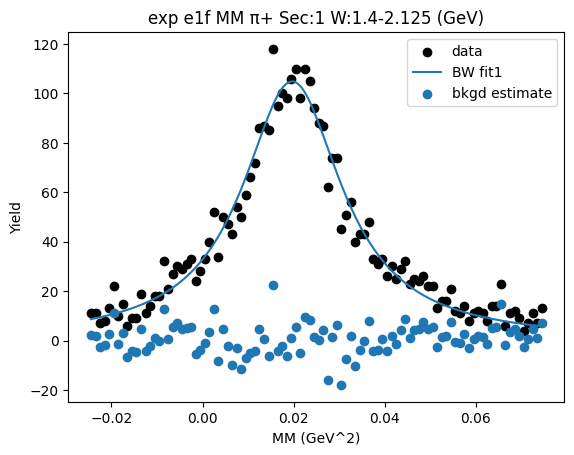

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


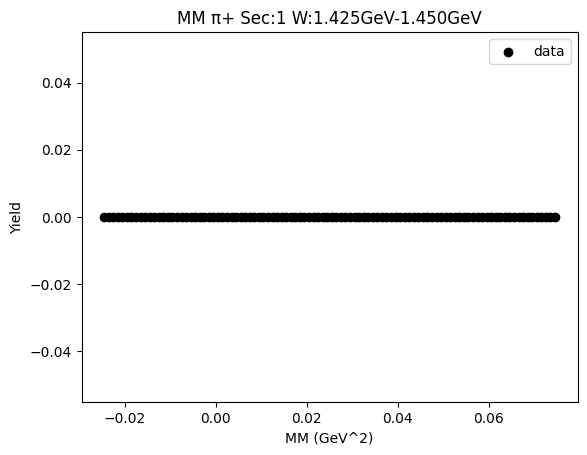

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


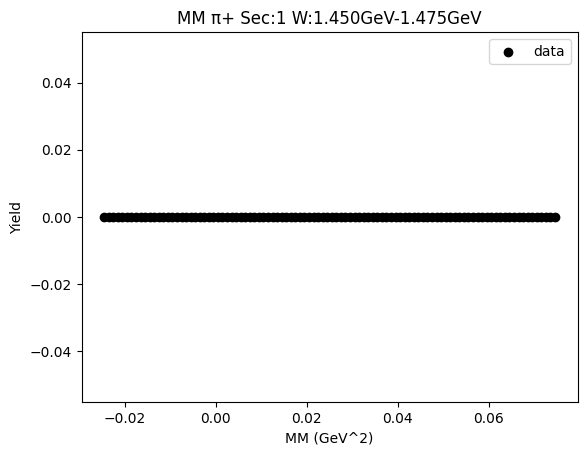

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


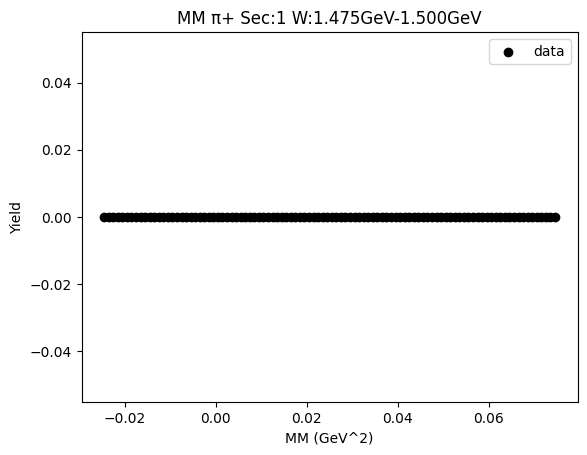

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


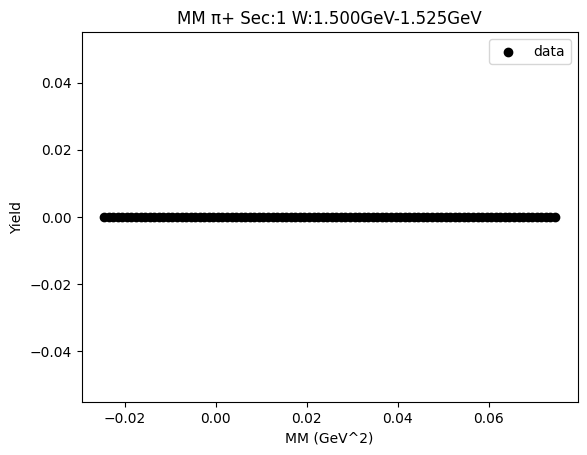

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


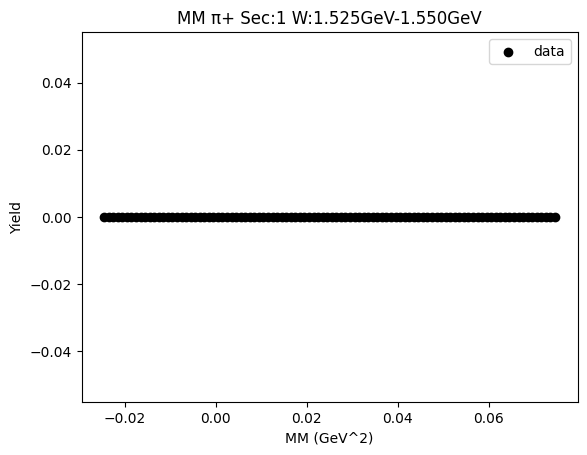

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


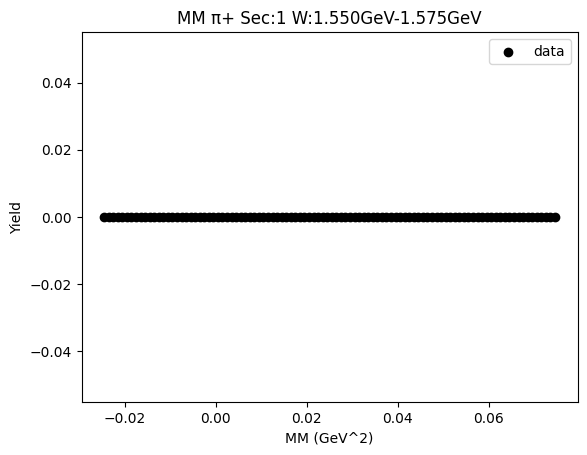

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


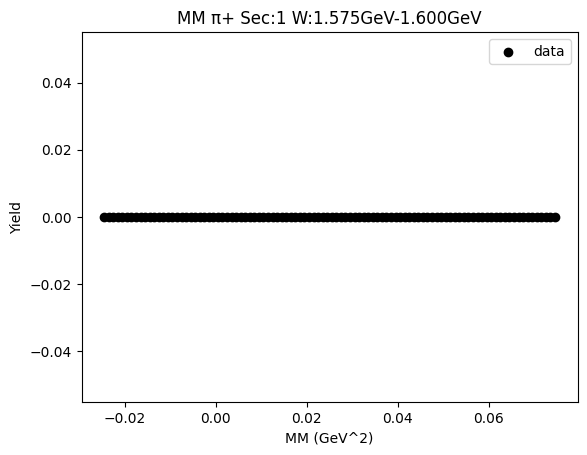

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


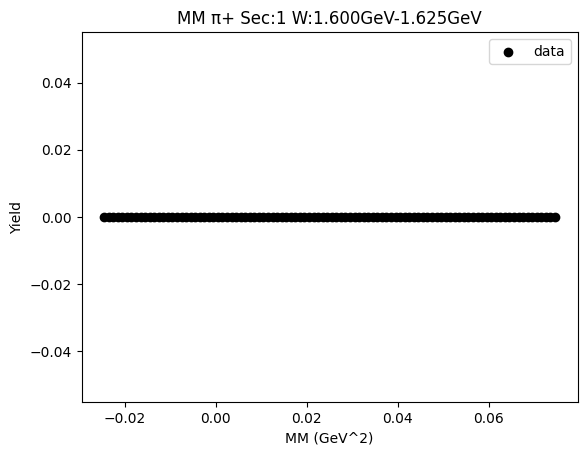

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


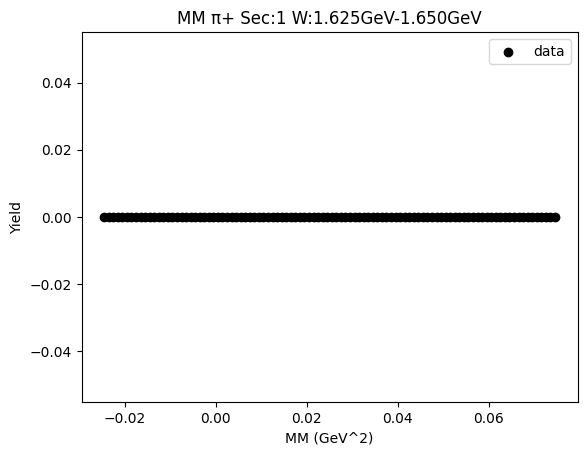

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


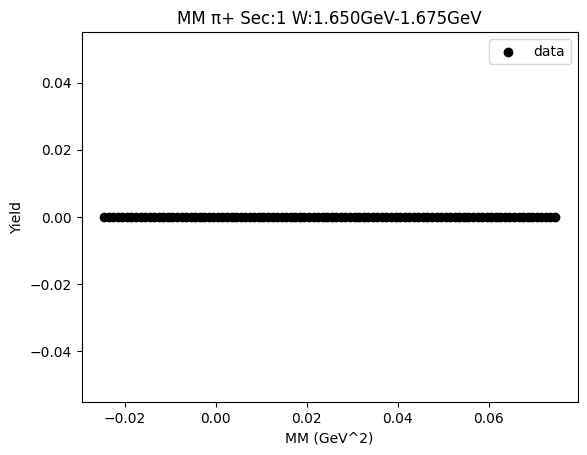

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


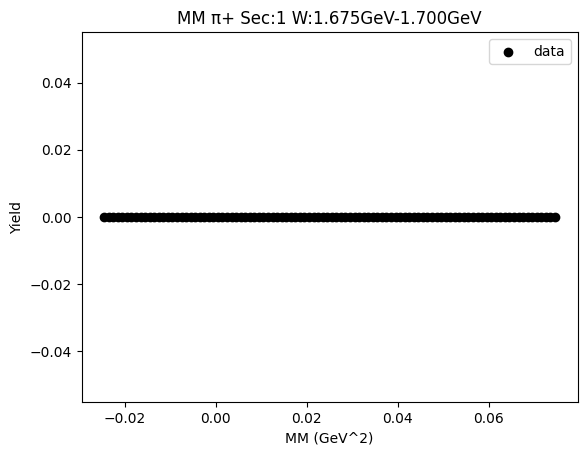

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


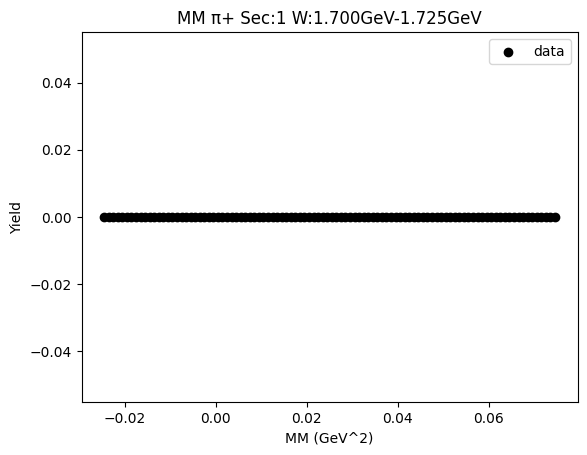

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


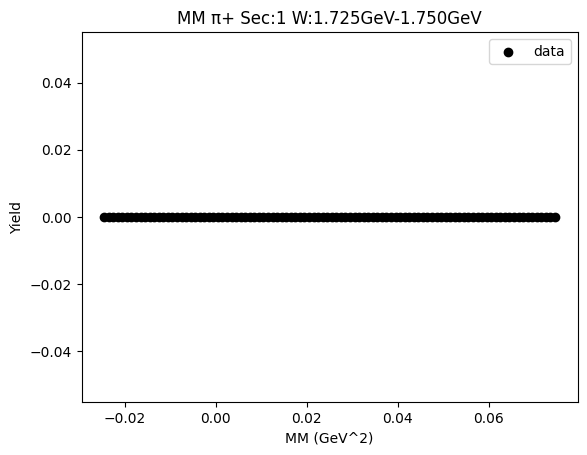

W bin: 14 1.750GeV-1.775GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


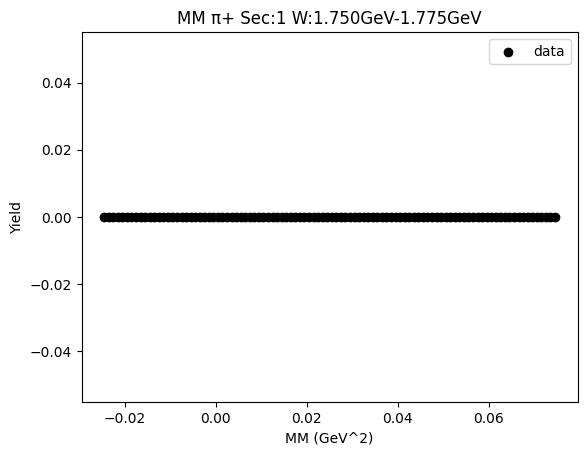

W bin: 15 1.775GeV-1.800GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


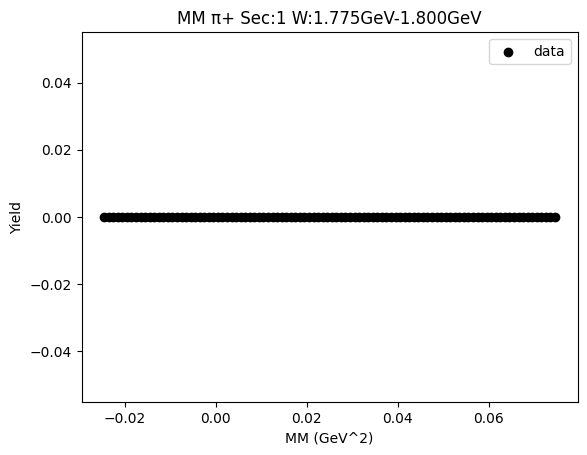

W bin: 16 1.800GeV-1.825GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


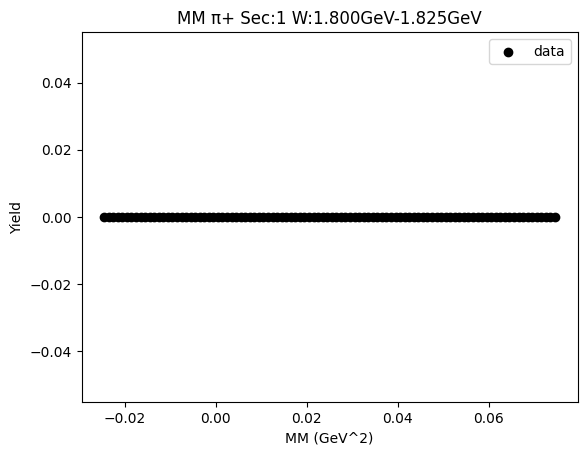

W bin: 17 1.825GeV-1.850GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


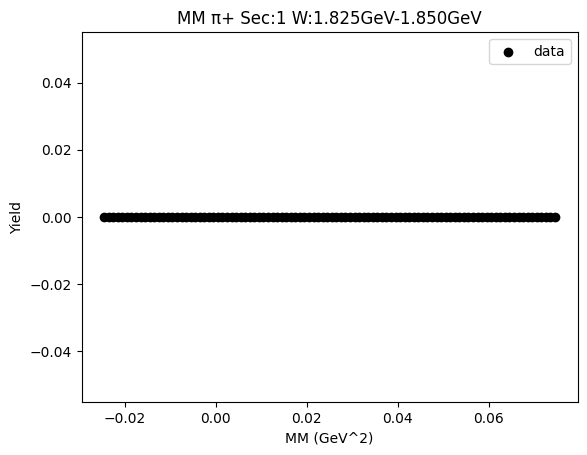

W bin: 18 1.850GeV-1.875GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


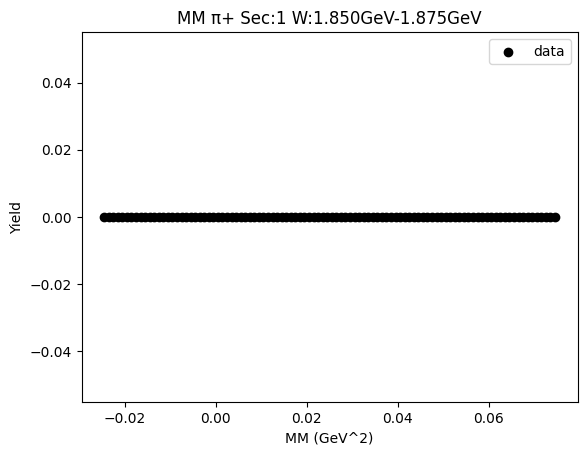

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[2.72321393e-06 4.69388618e-06 7.19773423e-06]
 [1.23411600e-05 1.62354215e-05 2.06628588e-05]]
Cut Bounds Err [[3.66403478e+07 5.77253044e+07 8.33958899e+07]
 [7.80003768e+07 1.07357339e+08 1.41299930e+08]]


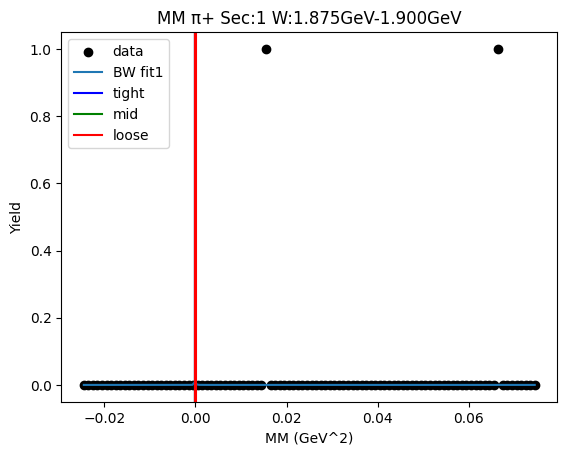

W bin: 20 1.900GeV-1.925GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


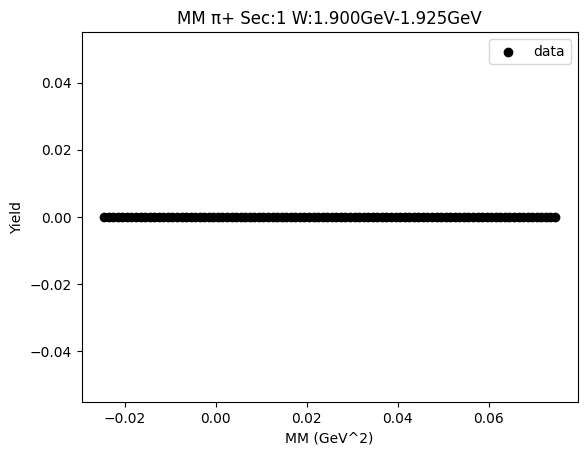

W bin: 21 1.925GeV-1.950GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[2.68993399e-05 4.09165748e-05 5.78627317e-05]
 [4.78176977e-05 6.60186041e-05 8.71484325e-05]]
Cut Bounds Err [[212630.65114047 314692.1716741  436598.82230959]
 [283497.60140573 399732.51199241 535812.55268095]]


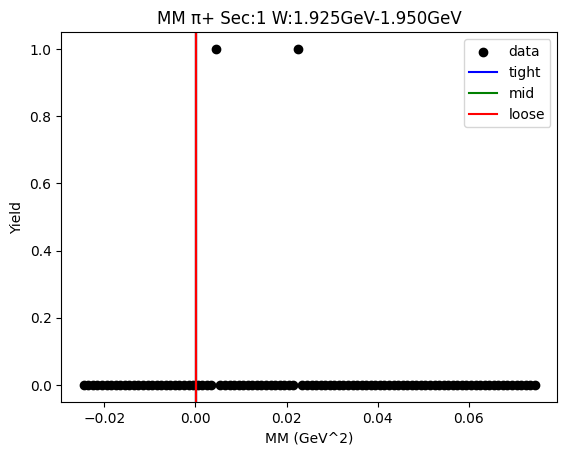

W bin: 22 1.950GeV-1.975GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


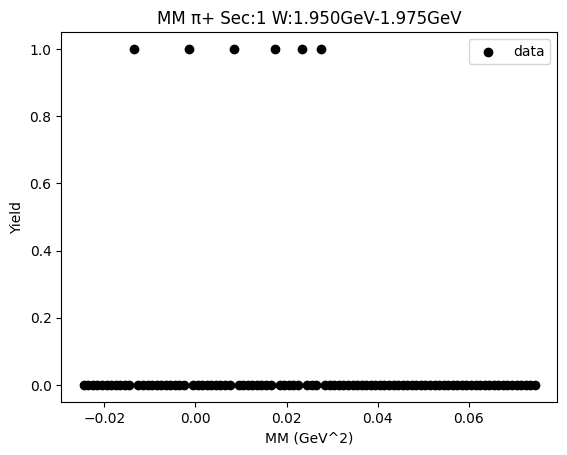

W bin: 23 1.975GeV-2.000GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


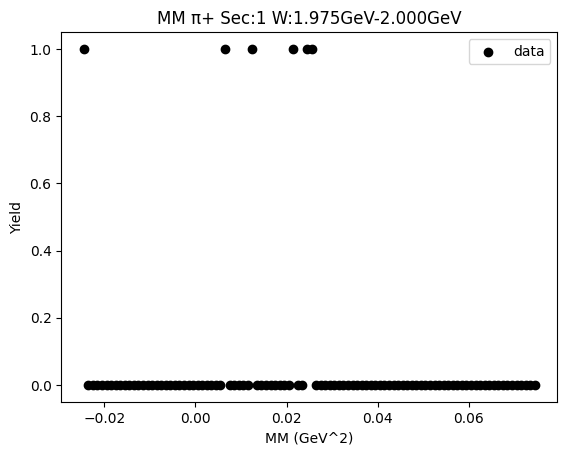

W bin: 24 2.000GeV-2.025GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00031363 0.00031242 0.00031122]
 [0.00032582 0.00032705 0.00032829]]
Cut Bounds Err [[5.10170527 6.11025938 7.1148845 ]
 [5.19992988 6.2517028  7.3074047 ]]


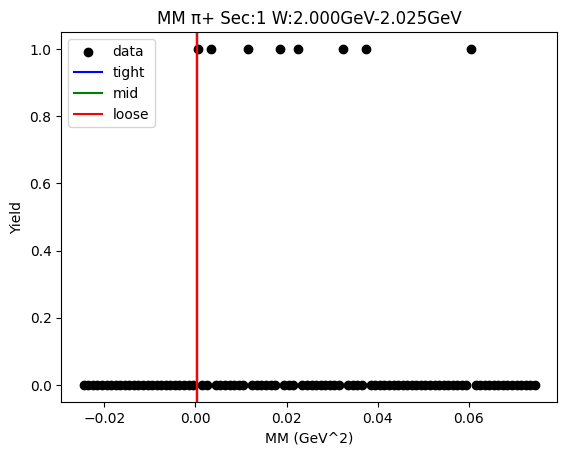

W bin: 25 2.025GeV-2.050GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00100356 0.00100334 0.00100313]
 [0.00100574 0.00100595 0.00100617]]
Cut Bounds Err [[302000.98507128 362361.91202046 422709.74894795]
 [302328.23561353 362833.15280131 423351.16001078]]


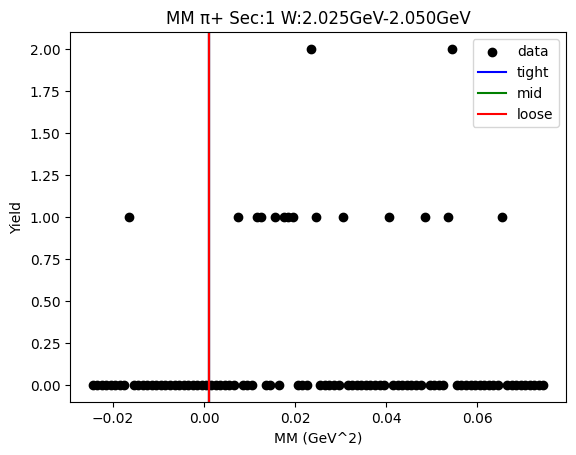

W bin: 26 2.050GeV-2.075GeV
background fit [1.95148931 2.48046599 0.97447992 0.37306826 0.0585014  0.00376339]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
9.679340943079988e-10 9.69935345162087e-10
Breit-Wigner Peak [2.79766040e-02 3.11277163e-05 5.77530786e-07]
Gaus2 [1.91070526 2.45642827 1.25868683]
Gaus3 [4.10318790e-01 5.55002048e-02 2.14597981e-04]
Cut Bounds [[9.31062808e-10 9.23579021e-10 9.16125432e-10]
 [1.00756159e-09 1.01537756e-09 1.02322373e-09]]
Cut Bounds Err [[8.39403527e+10 8.36023594e+10 8.32643728e+10]
 [8.73206787e+10 8.76587524e+10 8.79968340e+10]]


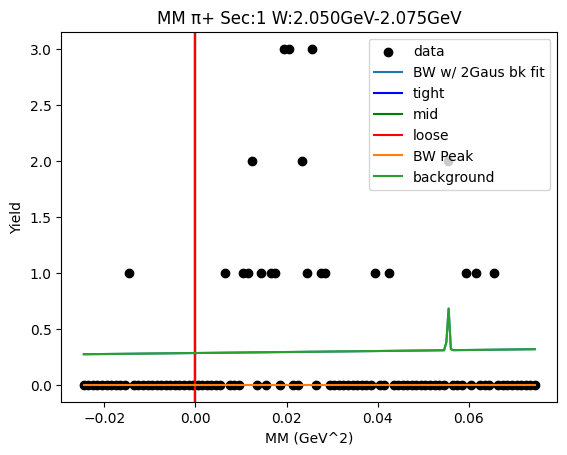

W bin: 27 2.075GeV-2.100GeV
background fit [4.14232052e-01 4.00000228e-02 2.12116234e-03 4.05957186e-01
 2.96007144e-01 1.78789146e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
2.5505933978715735e-05 2.7877151456275385e-05
Breit-Wigner Peak [1.99966818e+00 5.16638585e-03 6.28651663e-04]
Gaus2 [0.41423205 0.04000002 0.00212141]
Gaus3 [4.05957186e-01 2.96007144e-01 1.78789146e-04]
Cut Bounds [[2.02284731e-05 1.90432026e-05 1.78937133e-05]
 [3.40491414e-05 3.56280046e-05 3.72426490e-05]]
Cut Bounds Err [[ 543.64464203  632.97244079  715.83319632]
 [ 705.32072248  865.78599663 1032.718314  ]]


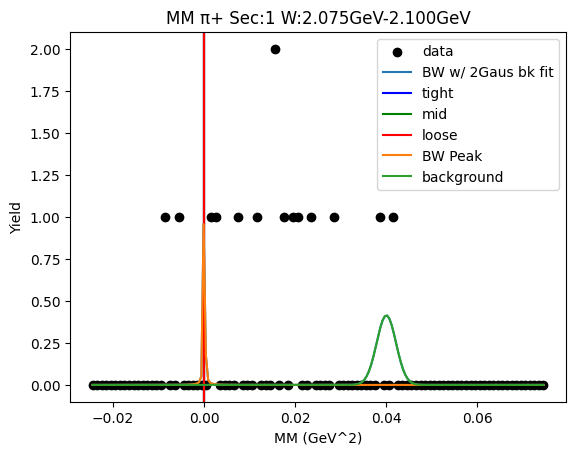

W bin: 28 2.100GeV-2.125GeV
background fit [2.11764664e-03 5.86525809e-02 3.02407714e-07 4.05957186e-01
 2.96007144e-01 1.78789146e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.05191180776439032 0.08499201167692853
Breit-Wigner Peak [0.07477722 0.12860833 0.15105397]
Gaus2 [2.11764664e-03 5.86525809e-02 3.02407714e-07]
Gaus3 [4.05957186e-01 2.96007144e-01 1.78789146e-04]
Cut Bounds [[0.0010296  0.00412505 0.00928634]
 [0.08369683 0.10332572 0.12502047]]
Cut Bounds Err [[0.00026332 0.00063178 0.00110518]
 [0.00237411 0.00316195 0.00405508]]


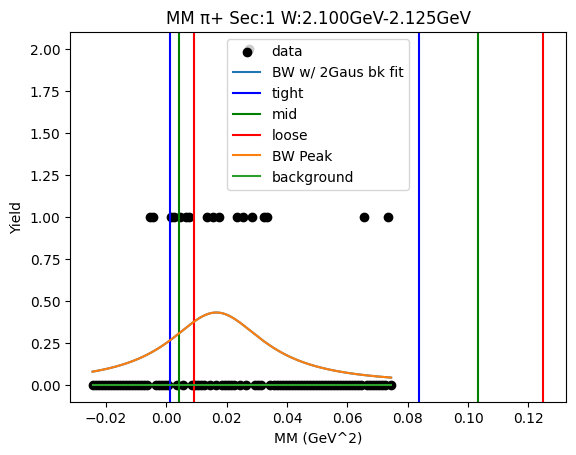

Value Error1.1
	Just skip it for now


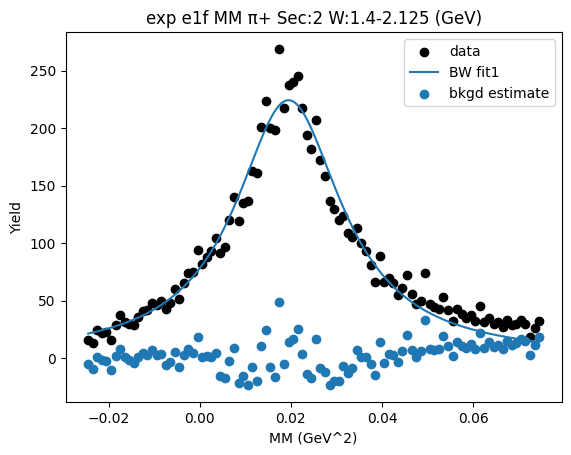

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


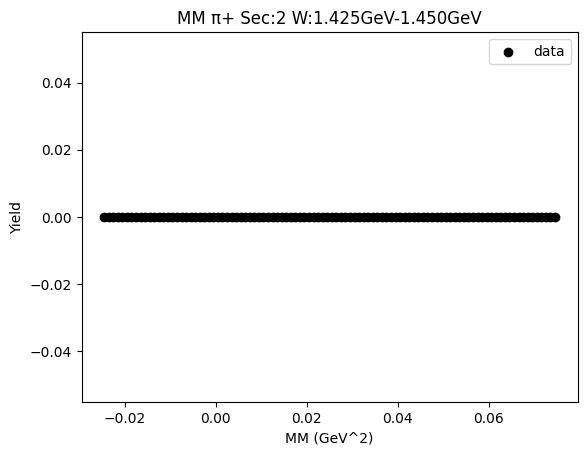

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


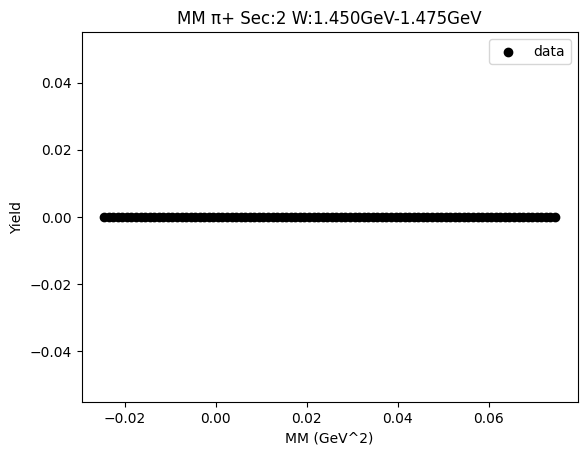

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


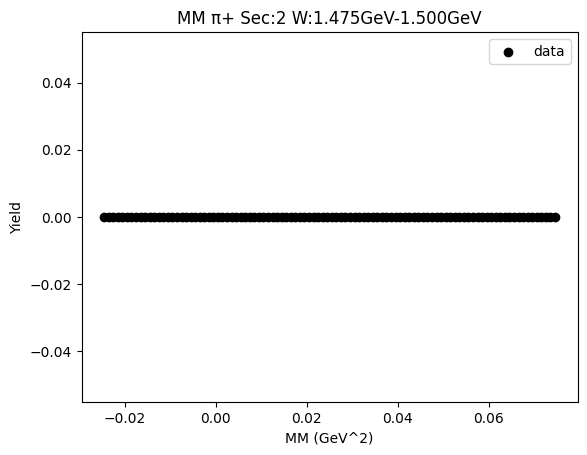

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


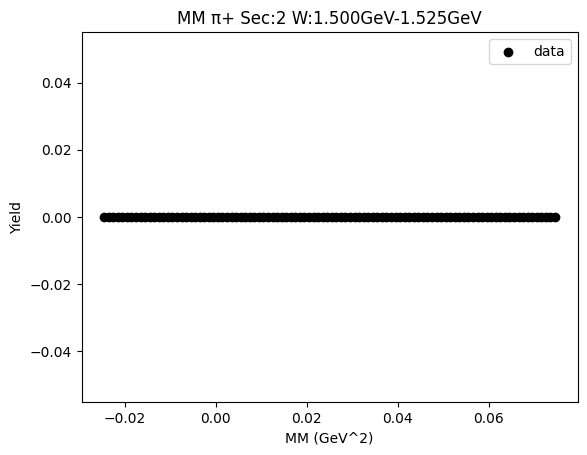

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


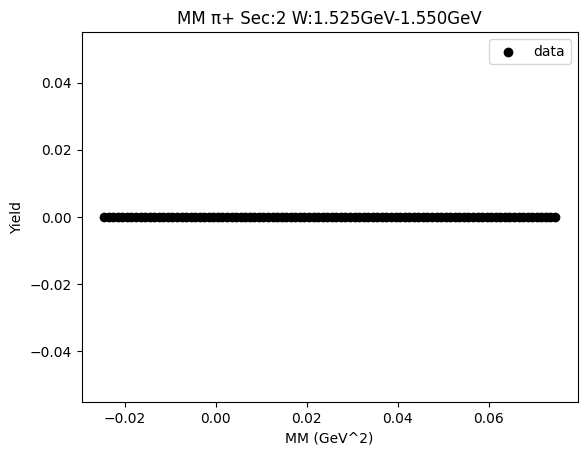

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


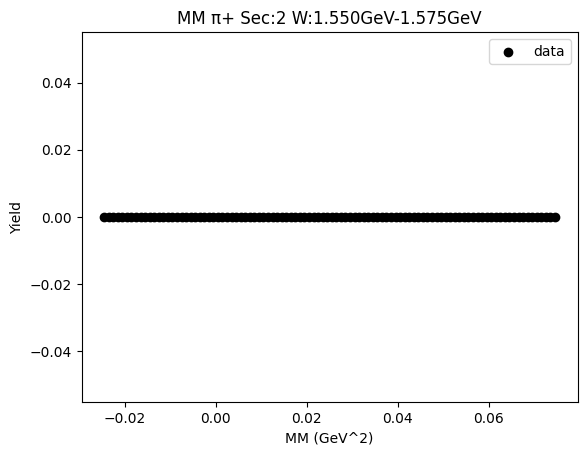

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


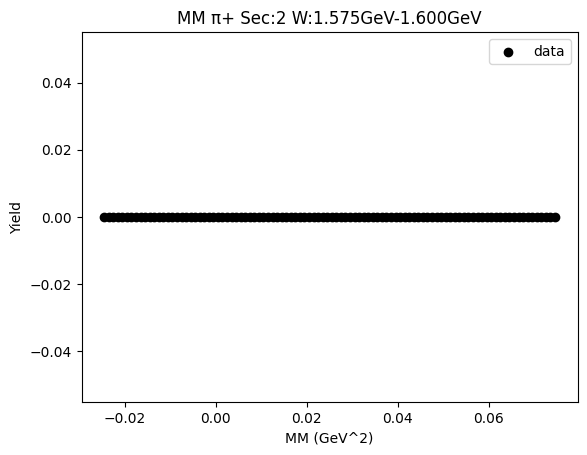

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


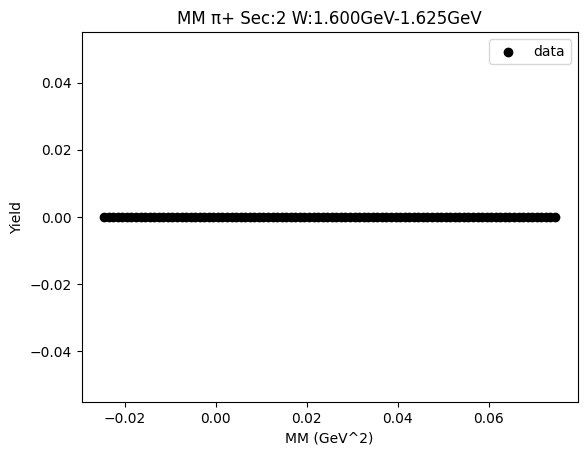

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


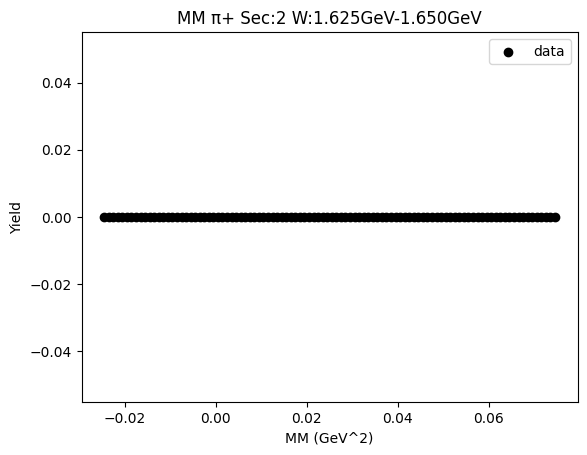

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


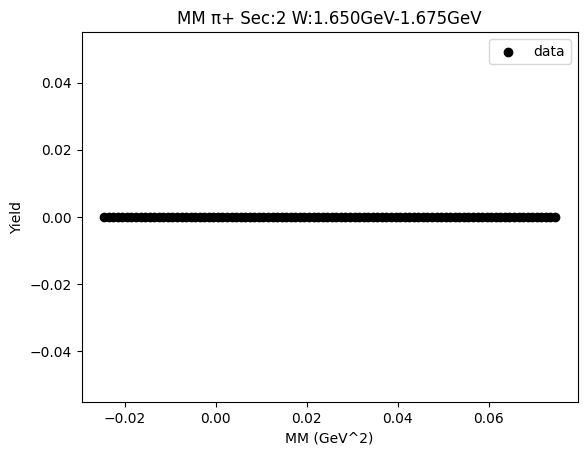

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


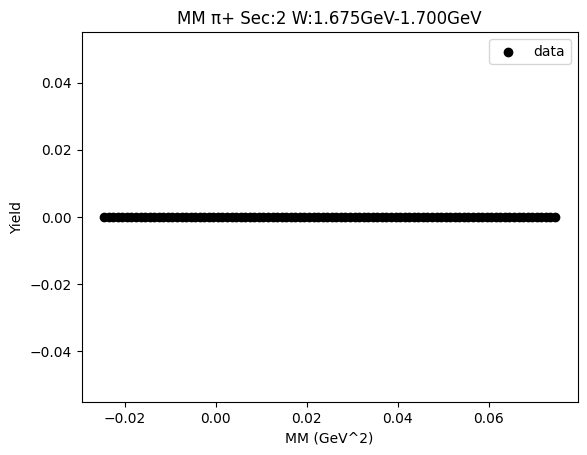

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


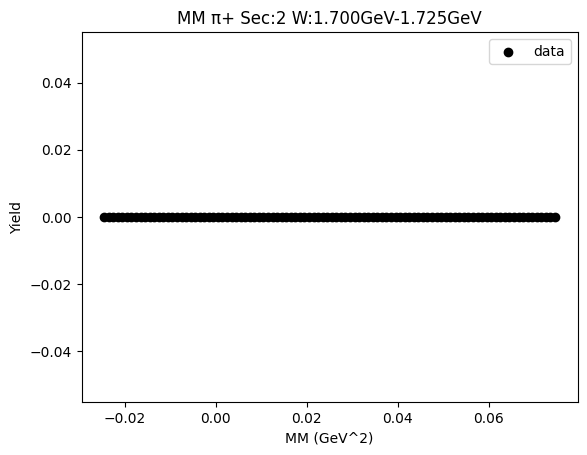

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


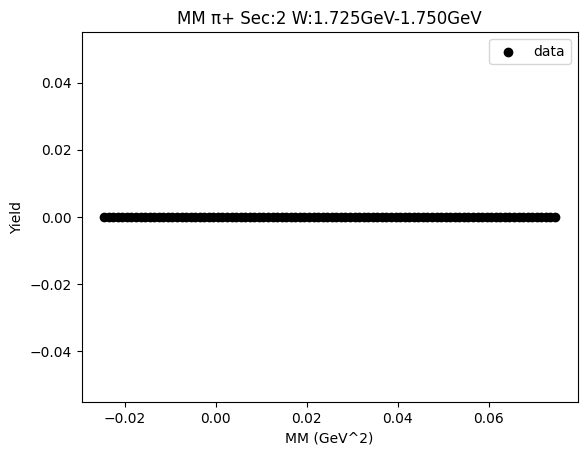

W bin: 14 1.750GeV-1.775GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


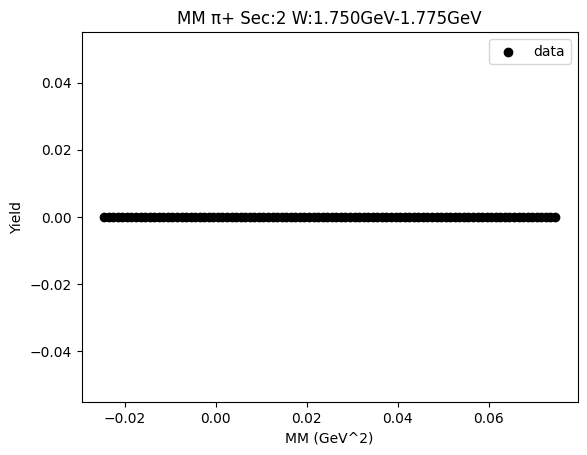

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[9.59377294e-06 7.93478977e-06 6.43317353e-06]
 [3.48387863e-05 3.82288059e-05 4.17761923e-05]]
Cut Bounds Err [[ 471.92915581  515.02824771  541.03175985]
 [ 899.31864969 1130.4691189  1378.71516786]]


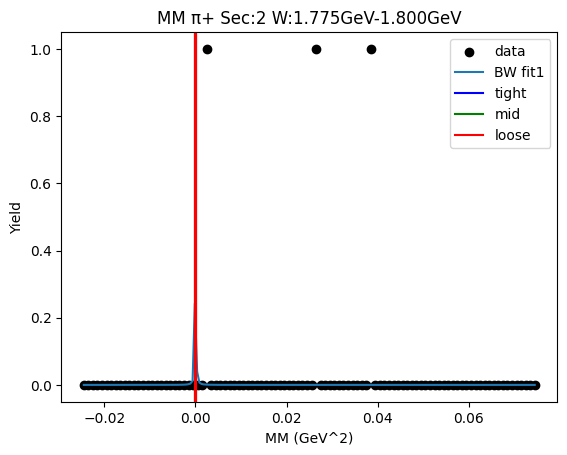

W bin: 16 1.800GeV-1.825GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


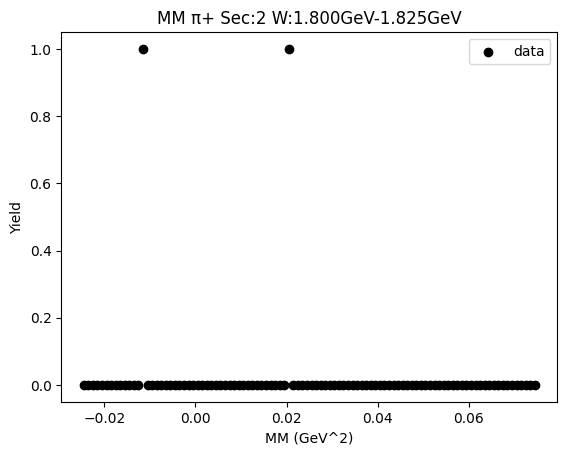

W bin: 17 1.825GeV-1.850GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


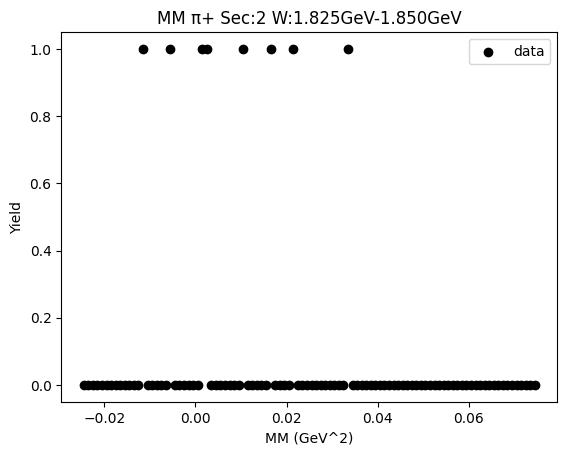

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[1.18872362e-06 5.05932623e-06 1.16165306e-05]
 [1.10245796e-04 1.35927813e-04 1.64296432e-04]]
Cut Bounds Err [[ 4.18913329 10.3707776  18.33369447]
 [40.34268054 53.75503431 68.94866063]]


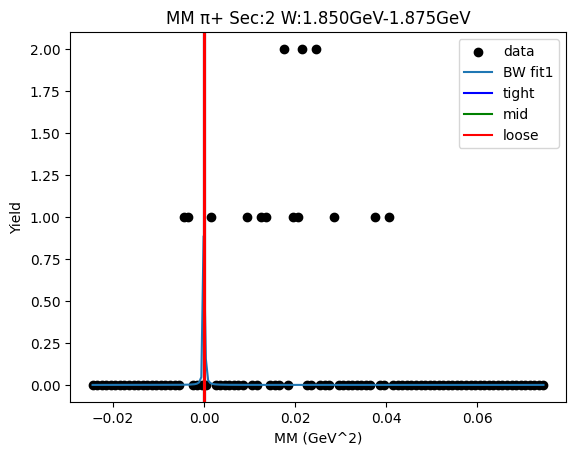

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[3.02159189e-06 2.10035222e-06 1.34617013e-06]
 [2.14221555e-05 2.41810285e-05 2.71069591e-05]]
Cut Bounds Err [[ 6848.40347156  6851.7064302   6399.55014362]
 [18234.88460213 23248.23925823 28717.05315954]]


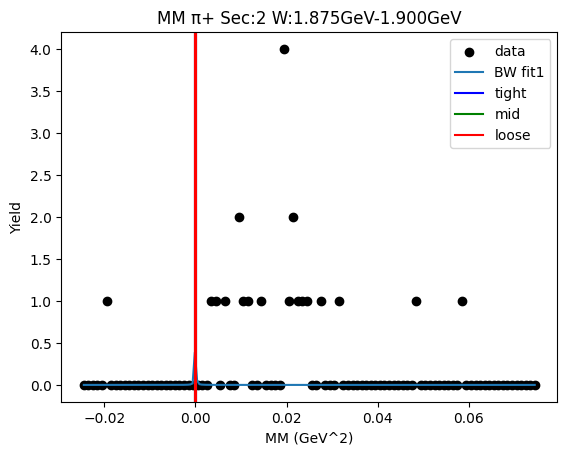

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[8.64986693e-07 5.23958072e-04 2.18185283e-03]
 [5.71840260e-02 6.91437513e-02 8.22382783e-02]]
Cut Bounds Err [[0.23818177 0.28582213 0.3334625 ]
 [0.23822211 0.28586262 0.33350317]]


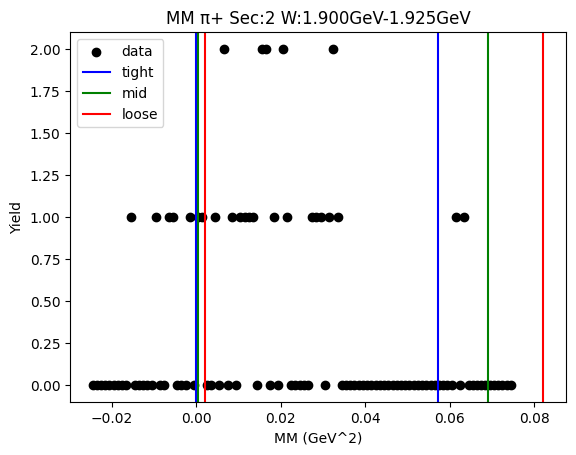

W bin: 21 1.925GeV-1.950GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00246153 0.001207   0.00039482]
 [0.03933568 0.04545599 0.05201864]]
Cut Bounds Err [[0.14871513 0.17845883 0.20820252]
 [0.14872179 0.17846549 0.20820918]]


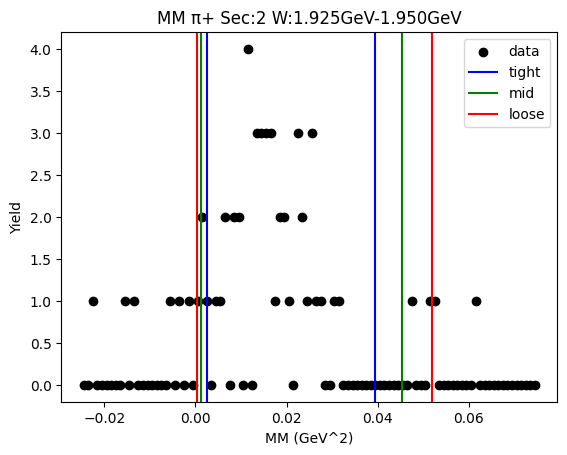

W bin: 22 1.950GeV-1.975GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[0.00586143 0.00433647 0.00304085]
 [0.03372378 0.03777129 0.04204814]]
Cut Bounds Err [[7.36459611e-06 7.58647543e-06 7.40282388e-06]
 [1.76650709e-05 2.23899230e-05 2.75279285e-05]]


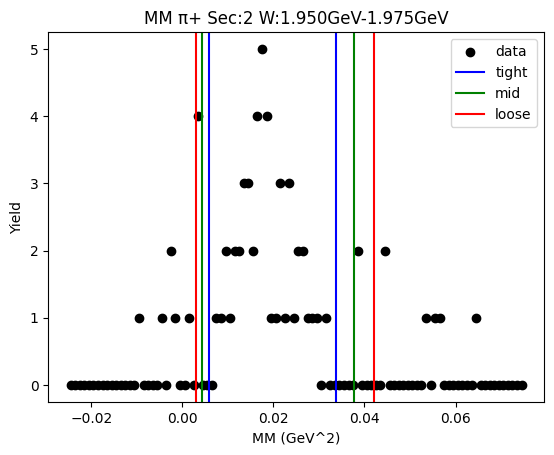

W bin: 23 1.975GeV-2.000GeV
background fit [0.93533129 0.52689667 0.06751321 0.18435933 0.0470021  0.02198389]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.013482727589442738 0.0216614835480574
Breit-Wigner Peak [0.22518436 0.13255982 0.03692054]
Gaus2 [3.10629938e+00 9.65441665e-01 5.51144267e-04]
Gaus3 [0.27603647 0.03       0.04441295]
Cut Bounds [[0.00870165 0.00729781 0.00601738]
 [0.02952795 0.03228937 0.0351742 ]]
Cut Bounds Err [[1.28644636e-05 1.41302308e-05 1.49648159e-05]
 [2.36977678e-05 2.97223223e-05 3.61809261e-05]]


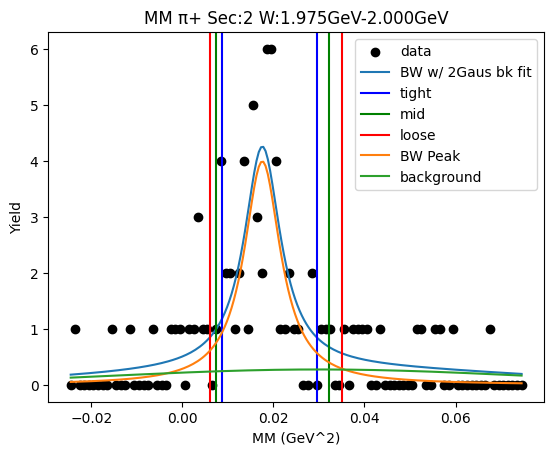

W bin: 24 2.000GeV-2.025GeV
background fit [1.33570593e+00 1.04925994e+04 8.57669564e+02 3.08741783e-02
 3.07758754e-02 1.72055525e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0011755298905111594 0.03906649307872985
Breit-Wigner Peak [0.49601361 0.13764259 0.0818963 ]
Gaus2 [ 1227.30240891 10245.73829135   667.58602193]
Gaus3 [0.58792021 0.03044184 0.00152491]
Cut Bounds [[0.00255216 0.00109522 0.00024553]
 [0.05051989 0.05865651 0.06740036]]
Cut Bounds Err [[1.43968973e-05 1.12847561e-05 6.22270801e-06]
 [6.40540430e-05 8.25846716e-05 1.03100049e-04]]


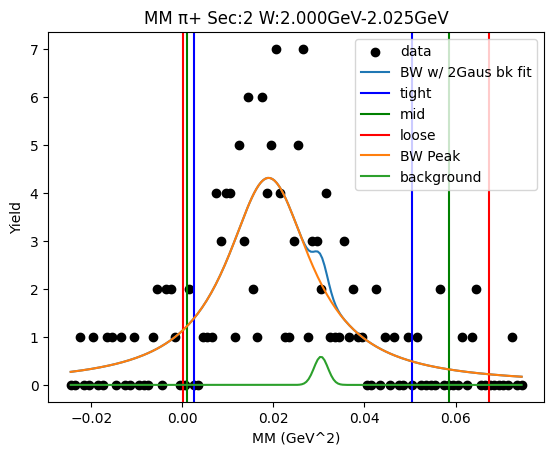

W bin: 25 2.025GeV-2.050GeV
background fit [1.22730241e+03 1.02457383e+04 6.67586022e+02 5.87931201e-01
 3.07629264e-02 1.69949354e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.007550555918075286 0.030814892804356685
Breit-Wigner Peak [0.54164946 0.13850171 0.06226869]
Gaus2 [ 1227.30240891 10245.73829135   667.58602193]
Gaus3 [0.60855217 0.03102318 0.00086223]
Cut Bounds [[0.00522128 0.00348215 0.00209408]
 [0.04192051 0.04752123 0.05347301]]
Cut Bounds Err [[1.02130642e-05 9.98947196e-06 9.02734127e-06]
 [2.89388224e-05 3.69030667e-05 4.56174051e-05]]


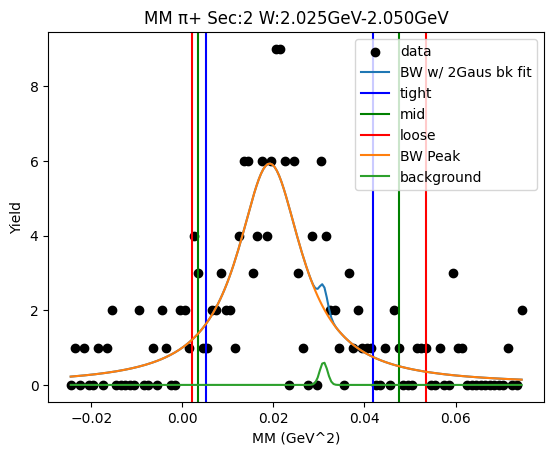

W bin: 26 2.050GeV-2.075GeV
background fit [1.22730241e+03 1.02457383e+04 6.67586022e+02 6.08555679e-01
 3.15390400e-02 8.57547222e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.006902489423963954 0.029752654627934104
Breit-Wigner Peak [0.67194366 0.13537936 0.06171192]
Gaus2 [1.03144633e+03 5.11067089e+03 1.52840143e+00]
Gaus3 [1.05515919e+00 3.15426469e-02 4.93352580e-04]
Cut Bounds [[0.00486205 0.00320336 0.00188947]
 [0.0404132  0.04586474 0.05166108]]
Cut Bounds Err [[5.79398740e-06 5.63319630e-06 5.04181436e-06]
 [1.67043484e-05 2.13153162e-05 2.63632509e-05]]


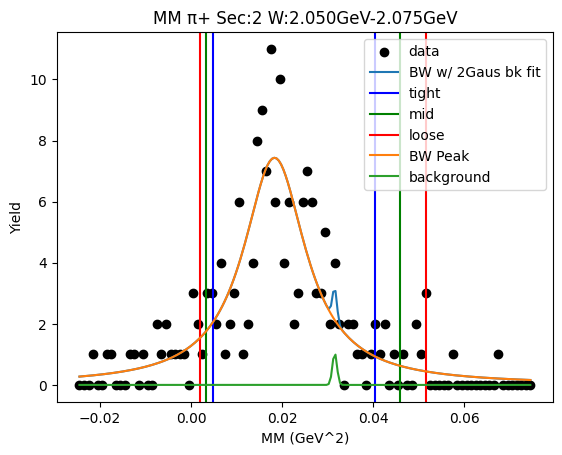

W bin: 27 2.075GeV-2.100GeV
background fit [1.03144633e+03 1.02297068e+04 9.90625715e+02 6.25120085e-01
 3.45780080e-02 1.53900858e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.00018860937599680938 0.0369399638655763
Breit-Wigner Peak [0.80692904 0.13625082 0.07826382]
Gaus2 [  487.65805807 11355.59719031   510.31549911]
Gaus3 [3.84999381e+00 3.47323839e-02 1.13079597e-03]
Cut Bounds [[0.00280809 0.00132056 0.0003876 ]
 [0.04818473 0.05577253 0.0639149 ]]
Cut Bounds Err [[6.53993435e-06 5.37252721e-06 3.39224256e-06]
 [2.70908358e-05 3.49147647e-05 4.35605463e-05]]


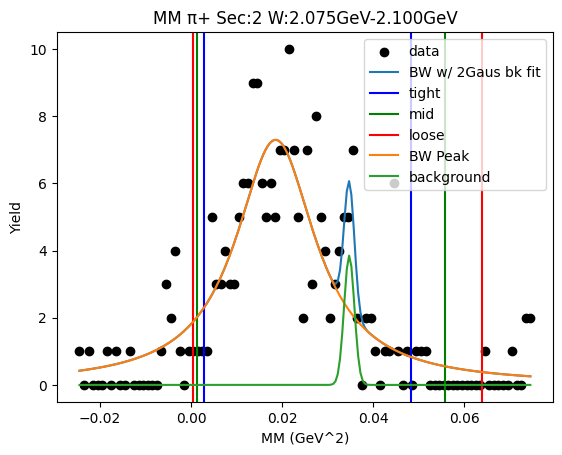

W bin: 28 2.100GeV-2.125GeV
background fit [4.90308657e+02 2.73038264e+03 6.69331703e+02 7.01556097e+00
 3.60097302e-02 2.58434903e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.006937430834648603 0.03042900430275073
Breit-Wigner Peak [0.65985152 0.13668657 0.06257206]
Gaus2 [ 490.76673058 2580.64807325  669.26971524]
Gaus3 [7.36103959e+00 3.60072969e-02 2.68105670e-04]
Cut Bounds [[0.00491689 0.00322707 0.00189174]
 [0.04131161 0.04690074 0.05284435]]
Cut Bounds Err [[1.16456333e-05 1.13146505e-05 1.01031275e-05]
 [3.37562253e-05 4.31346714e-05 5.33979204e-05]]


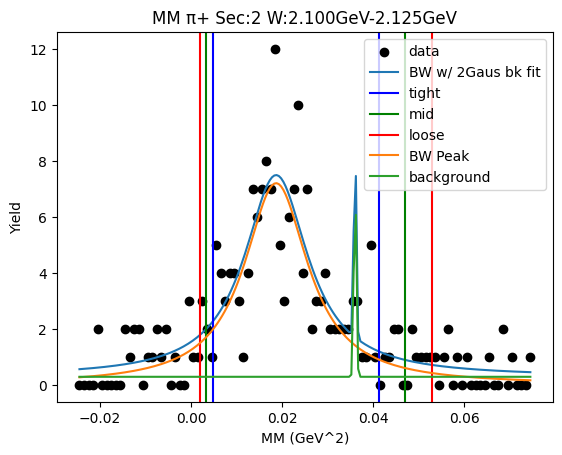

Value Error1.1
	Just skip it for now


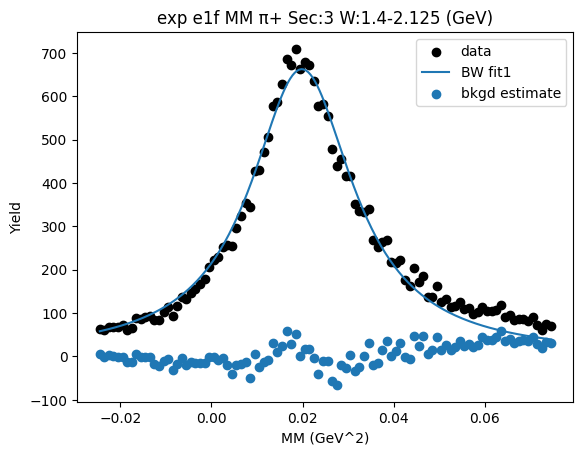

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


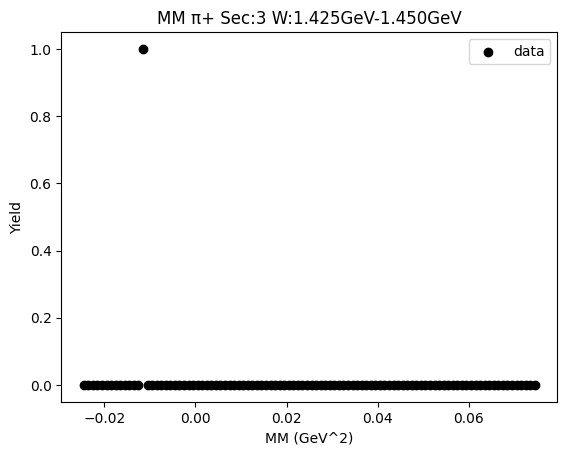

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


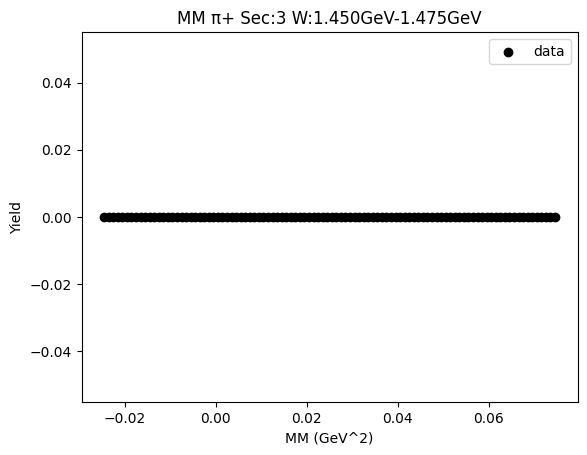

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


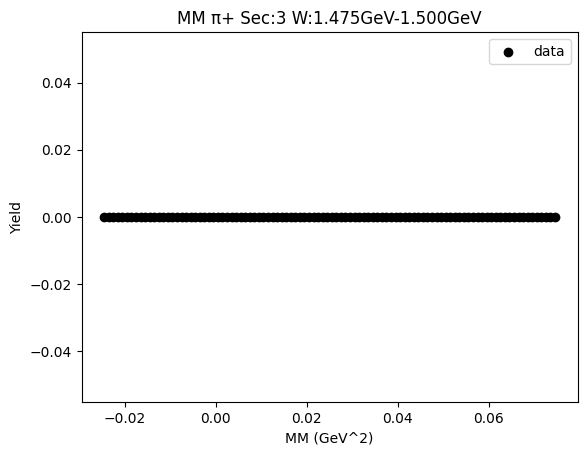

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


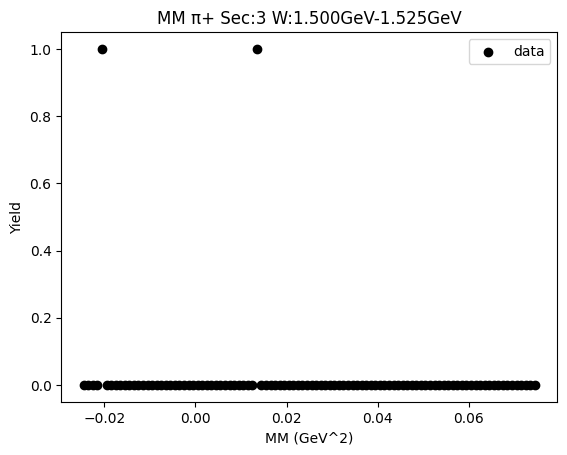

W bin: 5 1.525GeV-1.550GeV
Cut Bounds [[8.09392871e-05 1.20414048e-04 1.67703550e-04]
 [1.16002465e-04 1.62489861e-04 2.16791999e-04]]
Cut Bounds Err [[29329.48029306 42928.38038926 59104.94849798]
 [35112.22002016 49867.66806177 67200.78411591]]


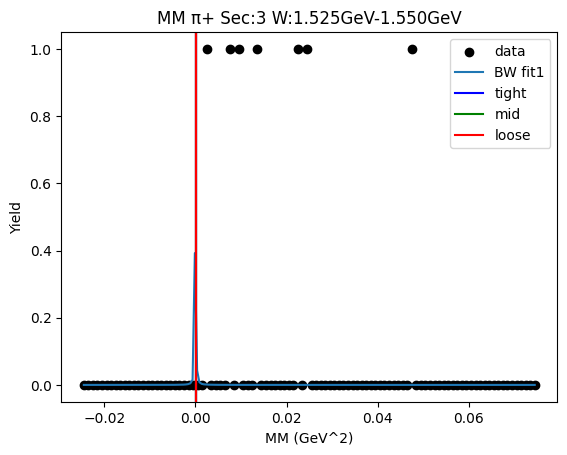

W bin: 6 1.550GeV-1.575GeV
Cut Bounds [[9.68665667e-08 6.86468108e-07 1.81126775e-06]
 [2.36367466e-05 2.89343241e-05 3.47670998e-05]]
Cut Bounds Err [[ 2820.59231379  9010.41498272 17075.47238702]
 [44060.27607089 58498.03549123 74811.02964696]]


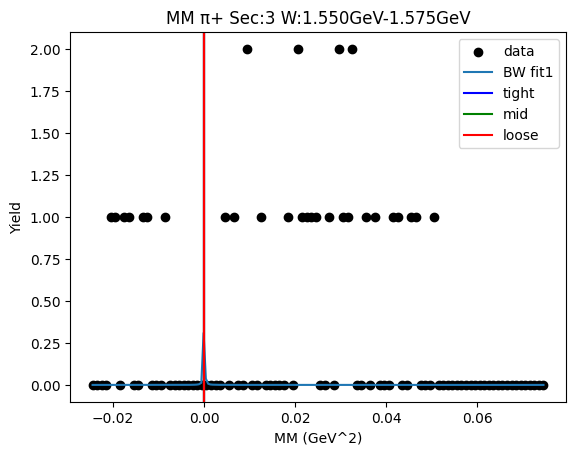

W bin: 7 1.575GeV-1.600GeV
Cut Bounds [[0.00069156 0.00100008 0.00136534]
 [0.00072724 0.00104289 0.00141529]]
Cut Bounds Err [[264621.98839264 381864.45064537 520546.26775617]
 [271361.88305929 389952.32424535 529982.12028948]]


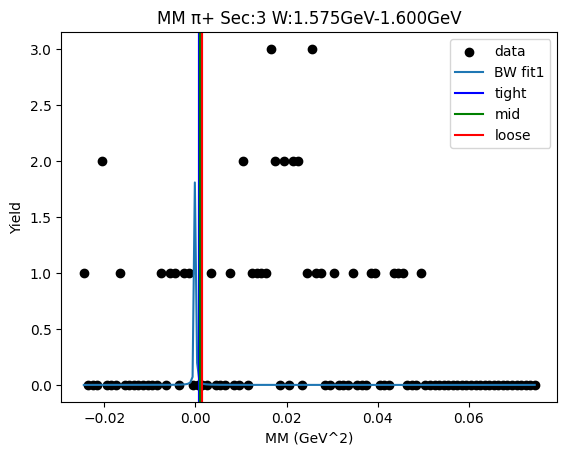

W bin: 8 1.600GeV-1.625GeV
Cut Bounds [[0.00080276 0.00116776 0.00160095]
 [0.0009037  0.00128889 0.00174227]]
Cut Bounds Err [[ 5383.91456431  7792.25494522 10644.4478155 ]
 [ 5712.39766985  8186.43467188 11104.32416325]]


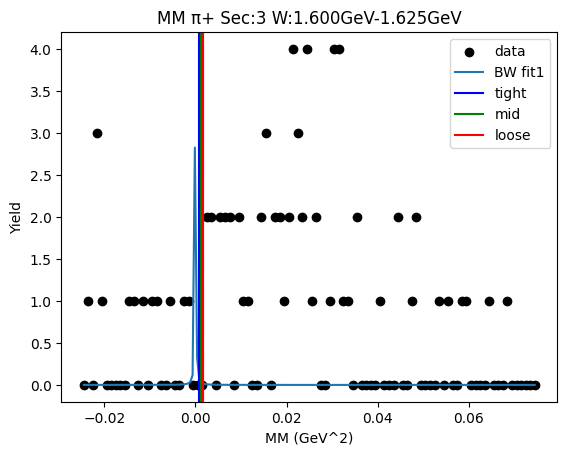

W bin: 9 1.625GeV-1.650GeV
Cut Bounds [[8.12085310e-07 5.88927561e-04 2.44399890e-03]
 [6.38022300e-02 7.71506290e-02 9.17659839e-02]]
Cut Bounds Err [[7.70015650e-07 2.48481805e-05 5.90049546e-05]
 [2.15832407e-04 2.84402487e-04 3.61558720e-04]]


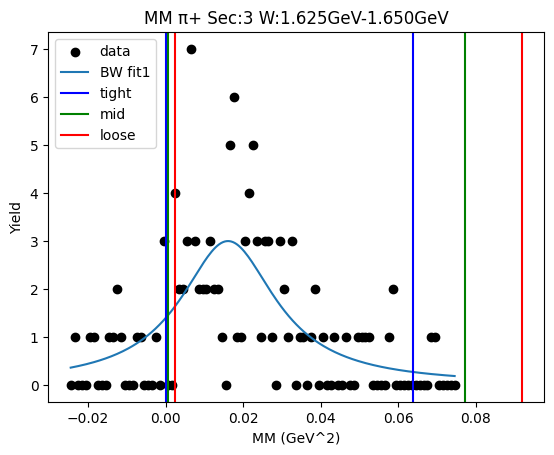

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[0.00312251 0.00153566 0.00050605]
 [0.04963903 0.05735549 0.06562919]]
Cut Bounds Err [[6.02775368e-06 5.06352350e-06 3.38749332e-06]
 [2.40334176e-05 3.09451595e-05 3.85770413e-05]]


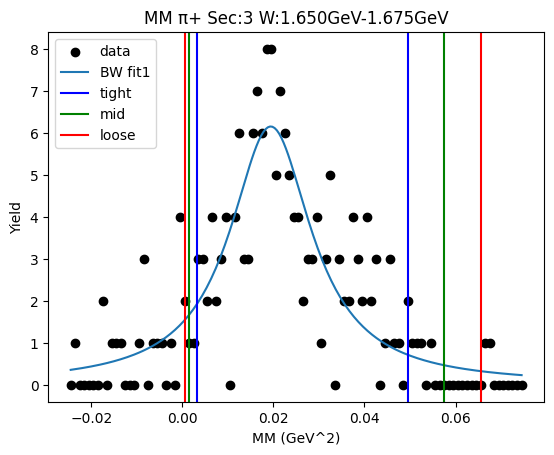

W bin: 11 1.675GeV-1.700GeV
Cut Bounds [[0.00419182 0.00239979 0.0011043 ]
 [0.049422   0.05667601 0.06442655]]
Cut Bounds Err [[3.43383282e-06 3.11207907e-06 2.46021843e-06]
 [1.17906560e-05 1.51238981e-05 1.87915513e-05]]


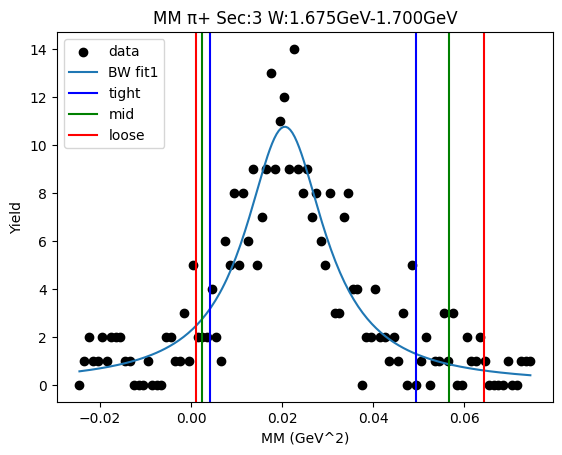

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[0.00391731 0.00214276 0.00089949]
 [0.05088317 0.0585018  0.0666517 ]]
Cut Bounds Err [[4.66968136e-06 4.13689895e-06 3.12361534e-06]
 [1.68298557e-05 2.16158709e-05 2.68884013e-05]]


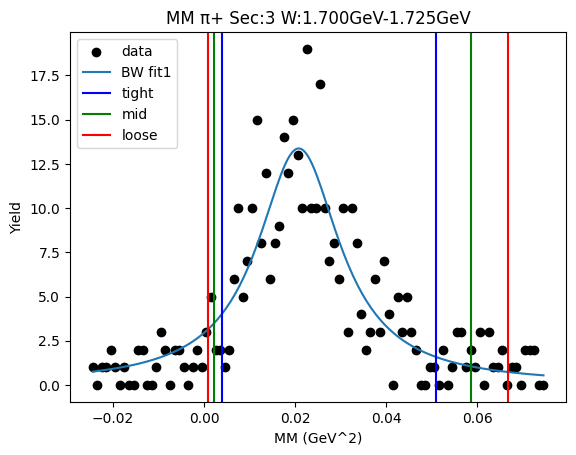

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[0.00360928 0.001866   0.00069259]
 [0.05238519 0.0603971  0.06897887]]
Cut Bounds Err [[3.24007089e-06 2.79064125e-06 1.98136008e-06]
 [1.23437959e-05 1.58765740e-05 1.97735108e-05]]


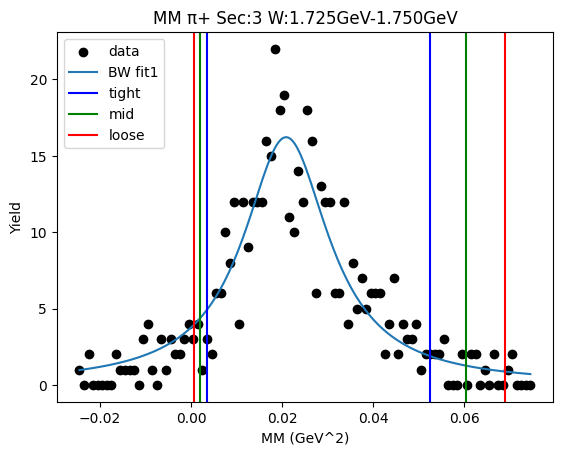

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[0.00255398 0.00099152 0.00015475]
 [0.05809139 0.06763641 0.07790712]]
Cut Bounds Err [[5.02185952e-06 3.74843226e-06 1.72591439e-06]
 [2.39503252e-05 3.09590853e-05 3.87245551e-05]]


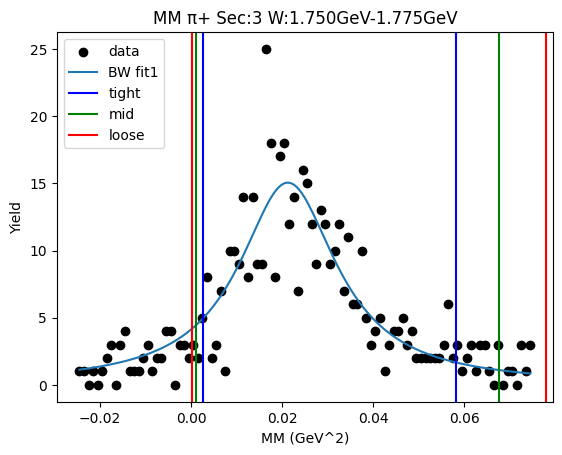

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[0.00328445 0.001605   0.00052051]
 [0.05280208 0.06102615 0.0698452 ]]
Cut Bounds Err [[2.67776603e-06 2.24227481e-06 1.48815231e-06]
 [1.07366067e-05 1.38264253e-05 1.72385541e-05]]


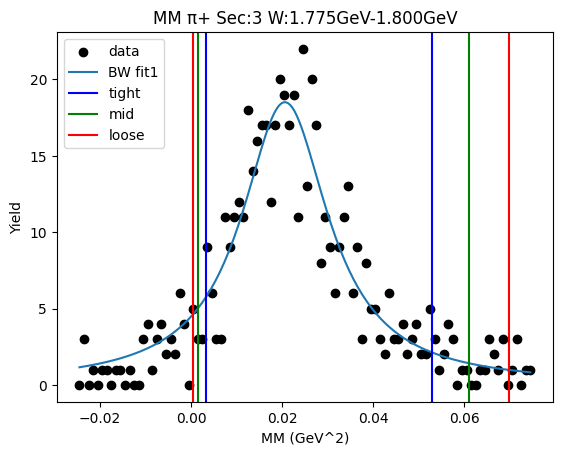

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[0.0040516  0.00225902 0.00098634]
 [0.05057213 0.05808366 0.06611509]]
Cut Bounds Err [[3.30061528e-06 2.95211789e-06 2.27330345e-06]
 [1.16610409e-05 1.49692736e-05 1.86120232e-05]]


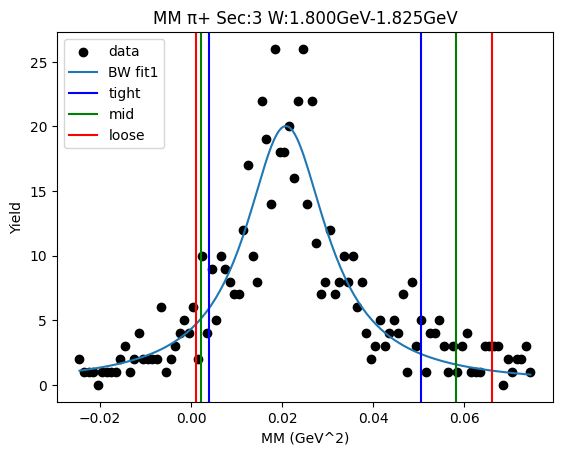

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[0.00411111 0.00227072 0.00097258]
 [0.05233874 0.06014387 0.06849126]]
Cut Bounds Err [[3.52415594e-06 3.13729204e-06 2.39281106e-06]
 [1.25744050e-05 1.61461598e-05 2.00800184e-05]]


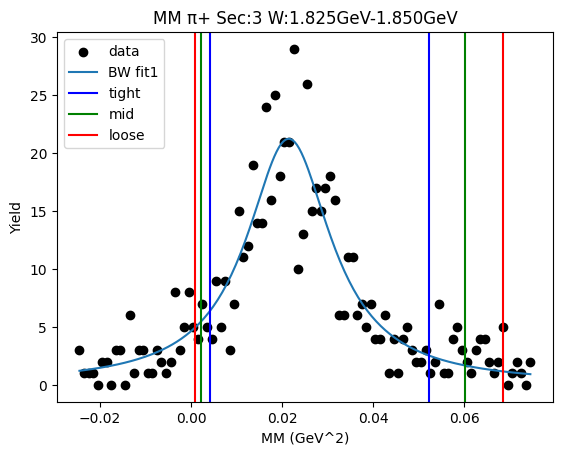

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[0.00287311 0.00128264 0.00032495]
 [0.05358104 0.06213216 0.07131606]]
Cut Bounds Err [[2.85943249e-06 2.28862929e-06 1.34252016e-06]
 [1.23483665e-05 1.59287495e-05 1.98885599e-05]]


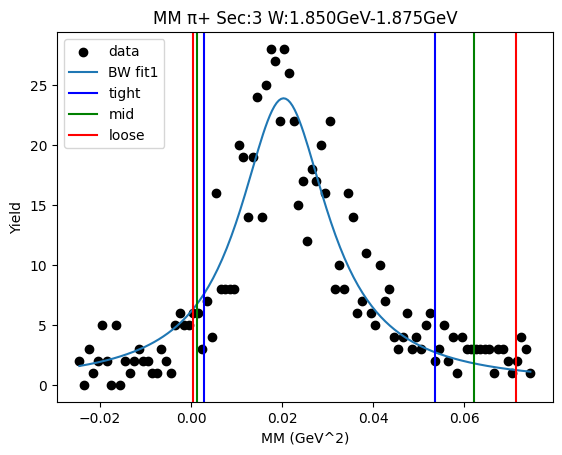

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[0.00359666 0.0019393  0.00078976]
 [0.04810097 0.05534447 0.0630958 ]]
Cut Bounds Err [[2.43235277e-06 2.13938172e-06 1.59104534e-06]
 [8.89515924e-06 1.14288678e-05 1.42211323e-05]]


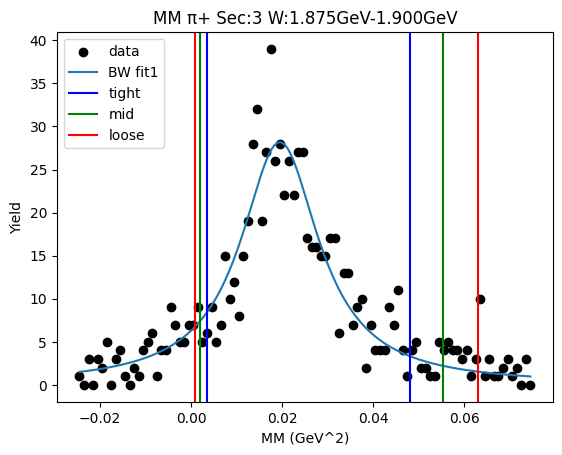

W bin: 20 1.900GeV-1.925GeV
background fit [6.17910287e+00 2.60645530e+01 2.79065916e+00 2.13677920e+00
 5.57332096e-02 1.79140709e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.008819858640551815 0.02839171817434602
Breit-Wigner Peak [2.48306823 0.13640304 0.05711372]
Gaus2 [15.26945099 23.67339599  0.95736127]
Gaus3 [3.82436665 0.03764338 0.0277734 ]
Cut Bounds [[0.00572198 0.00403122 0.0026358 ]
 [0.03887298 0.04381242 0.0490472 ]]
Cut Bounds Err [[6.99209746e-06 7.04120659e-06 6.64170235e-06]
 [1.82246098e-05 2.32127886e-05 2.86503662e-05]]


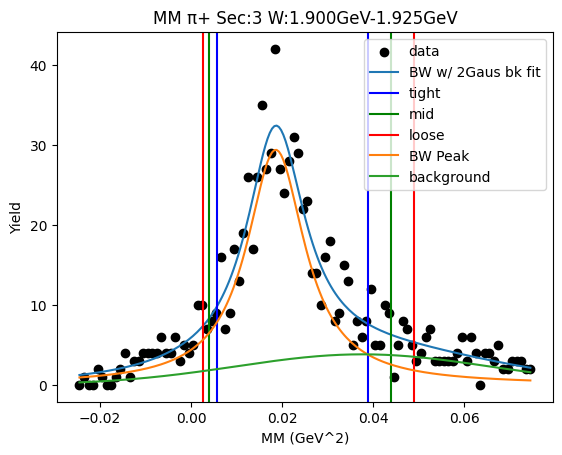

W bin: 21 1.925GeV-1.950GeV
background fit [1.52148362e+01 5.00335492e+01 8.17492643e+00 1.31608470e+00
 5.24683459e-02 1.38255631e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.003359298266719329 0.0332193755624948
Breit-Wigner Peak [2.87916648 0.13523807 0.07054558]
Gaus2 [15.21501552 50.02499845  8.17635117]
Gaus3 [2.7936844  0.03936764 0.02211887]
Cut Bounds [[0.00362279 0.00204122 0.00091024]
 [0.04422044 0.05075841 0.05774696]]
Cut Bounds Err [[3.02670711e-05 2.72623059e-05 2.12390209e-05]
 [1.05745189e-04 1.35947585e-04 1.69169127e-04]]


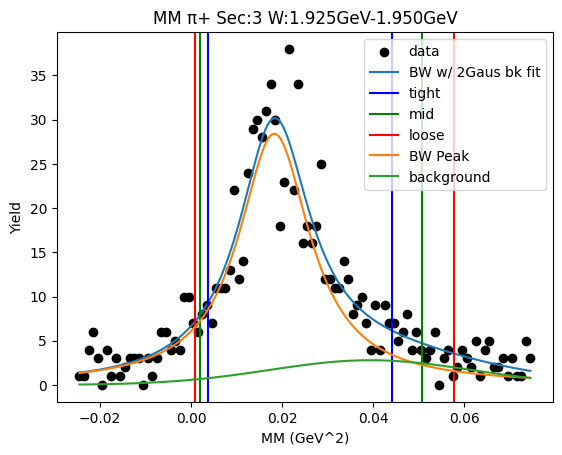

W bin: 22 1.950GeV-1.975GeV
background fit [9.31402609e-01 3.00699168e-02 1.20660172e+02 2.73160228e+00
 6.23243346e-02 2.00485542e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.001298264821161764 0.038561092810116396
Breit-Wigner Peak [3.10718882 0.13649694 0.08150599]
Gaus2 [1.01520273e+05 1.23673893e+00 2.50888357e-01]
Gaus3 [4.30489585e+00 6.28620948e-02 6.21026095e-04]
Cut Bounds [[0.00247889 0.00105279 0.00022816]
 [0.04982067 0.05786292 0.06650665]]
Cut Bounds Err [[4.50913783e-06 3.52527999e-06 1.91432905e-06]
 [2.02148151e-05 2.61350152e-05 3.26834042e-05]]


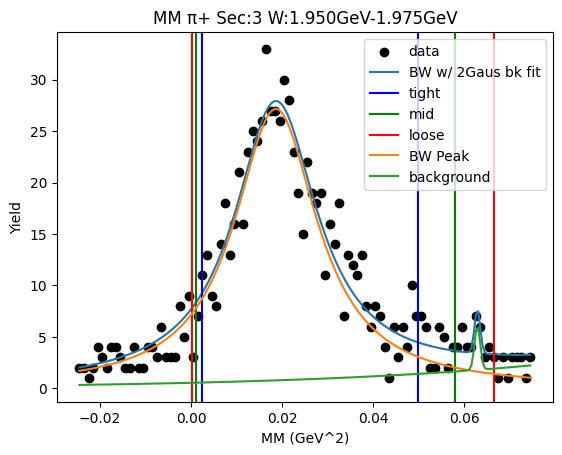

W bin: 23 1.975GeV-2.000GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[0.00310241 0.00148783 0.00045992]
 [0.05151417 0.05958195 0.06823638]]
Cut Bounds Err [[2.15042640e-06 1.78385981e-06 1.15585118e-06]
 [8.76271261e-06 1.12886214e-05 1.40789730e-05]]


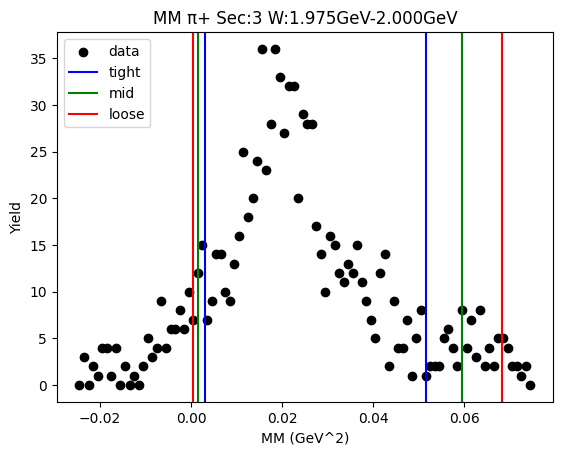

W bin: 24 2.000GeV-2.025GeV
background fit [6.25239258 4.58272277 0.16535436 2.2036284  0.05217176 0.00941821]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.005731684347175173 0.0309656481399517
Breit-Wigner Peak [2.44917271 0.13545725 0.06485107]
Gaus2 [36.51720096 30.16647554  2.94252461]
Gaus3 [3.78008087 0.03567427 0.02614215]
Cut Bounds [[0.00441783 0.00277399 0.00151092]
 [0.04179888 0.04763125 0.05384439]]
Cut Bounds Err [[1.26752773e-05 1.20511431e-05 1.03754858e-05]
 [3.89883918e-05 4.99369478e-05 6.19381058e-05]]


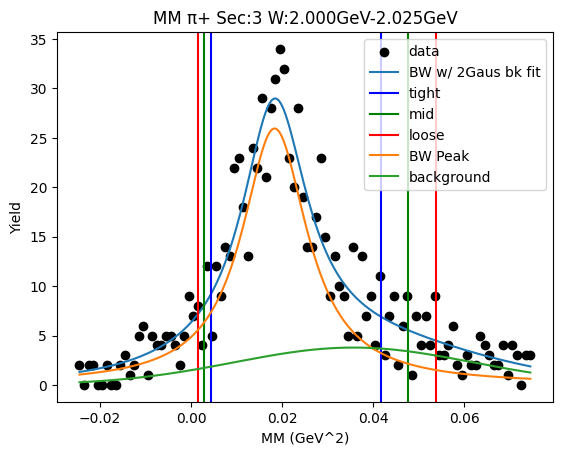

W bin: 25 2.025GeV-2.050GeV
background fit [5.70988092e-01 3.00095841e-02 1.13898332e+02 2.27981901e+00
 3.61704537e-02 3.45054631e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.002988664244825596 0.034504309695607305
Breit-Wigner Peak [2.95851415 0.13691781 0.07247488]
Gaus2 [6.88461499e+03 7.61052123e-01 1.67515056e-01]
Gaus3 [5.30764374e+00 3.56873456e-02 4.60995515e-03]
Cut Bounds [[0.00357806 0.00197107 0.00083964]
 [0.04580402 0.05264222 0.05995599]]
Cut Bounds Err [[6.13624899e-06 5.46240474e-06 4.15804280e-06]
 [2.19548780e-05 2.82293161e-05 3.51365565e-05]]


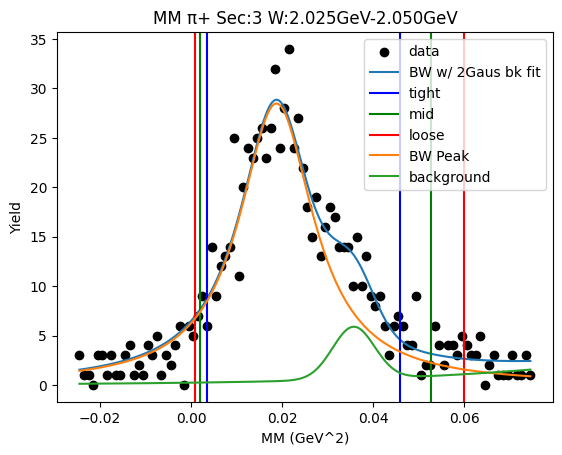

W bin: 26 2.050GeV-2.075GeV
background fit [7.38950810e+03 2.79084701e-01 4.98424344e-02 1.53171936e+00
 4.76041671e-02 5.19309786e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.002335289209156703 0.04008363413996794
Breit-Wigner Peak [3.09686035 0.1373833  0.08408222]
Gaus2 [6.19340380e+03 7.44474146e-01 1.57744363e-01]
Gaus3 [1.79114645 0.0467238  0.0084874 ]
Cut Bounds [[0.00229768 0.00090266 0.00014773]
 [0.05145297 0.05988901 0.06896514]]
Cut Bounds Err [[7.47210698e-06 5.61870164e-06 2.65150679e-06]
 [3.53592854e-05 4.57664827e-05 5.72890895e-05]]


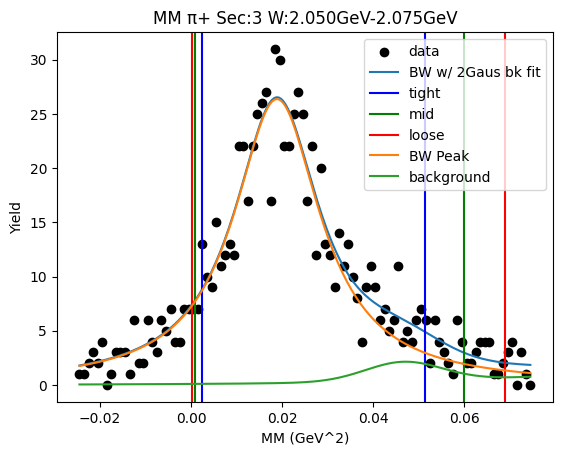

W bin: 27 2.075GeV-2.100GeV
background fit [6.19341357e+03 7.18216927e-01 1.60429421e-01 1.26270533e+00
 4.84668398e-02 4.62800504e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.003328645291426787 0.029867691176030813
Breit-Wigner Peak [2.13591812 0.12883388 0.06650695]
Gaus2 [7.93225728e+04 1.40303545e+00 2.90435252e-01]
Gaus3 [4.10608167 0.03       0.01639238]
Cut Bounds [[0.0033735  0.00192997 0.00088691]
 [0.03983455 0.04568323 0.05193239]]
Cut Bounds Err [[4.20028777e-05 3.81222655e-05 3.01494610e-05]
 [1.44334089e-04 1.85473634e-04 2.30706470e-04]]


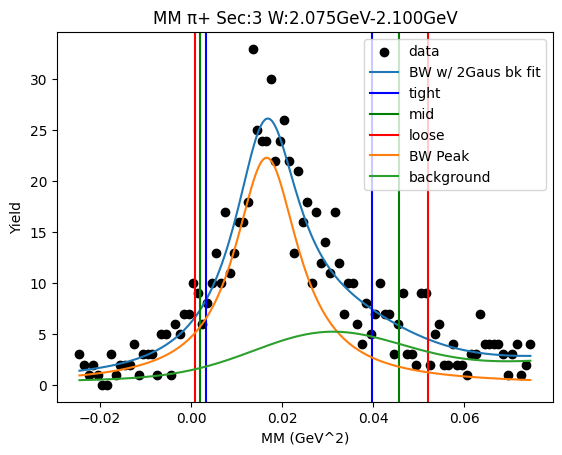

W bin: 28 2.100GeV-2.125GeV
background fit [8.19722339e+04 1.61639664e+01 4.56671656e-01 2.54368454e+00
 6.70913779e-02 1.25289881e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0014856651849694674 0.03774548319203574
Breit-Wigner Peak [2.5645294  0.13464735 0.08086114]
Gaus2 [1.92716878e+05 1.08124151e+04 8.80800453e+01]
Gaus3 [2.41247204 0.06196459 0.01603211]
Cut Bounds [[0.00236438 0.00098724 0.00020209]
 [0.04869518 0.0565842  0.06506522]]
Cut Bounds Err [[3.77302252e-06 2.91891677e-06 1.53859467e-06]
 [1.71227714e-05 2.20982659e-05 2.76074041e-05]]


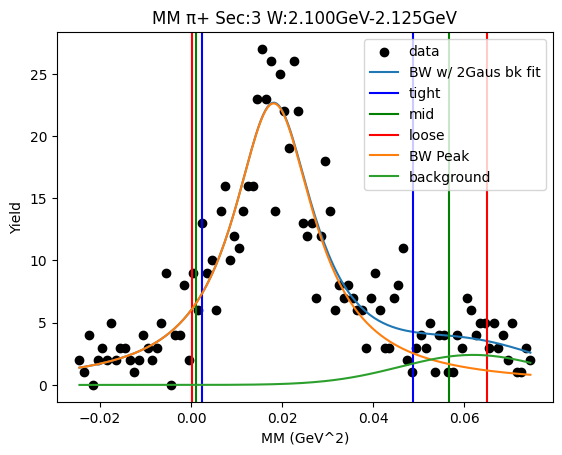

Value Error1.1
	Just skip it for now


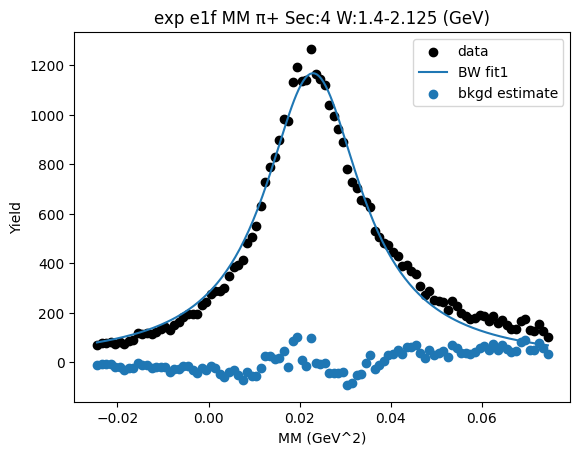

W bin: 1 1.425GeV-1.450GeV
Cut Bounds [[0.00408621 0.00240855 0.00117173]
 [0.04510892 0.0516358  0.05860352]]
Cut Bounds Err [[4.32720801e-06 3.97922347e-06 3.23438330e-06]
 [1.43773369e-05 1.84245070e-05 2.28739075e-05]]


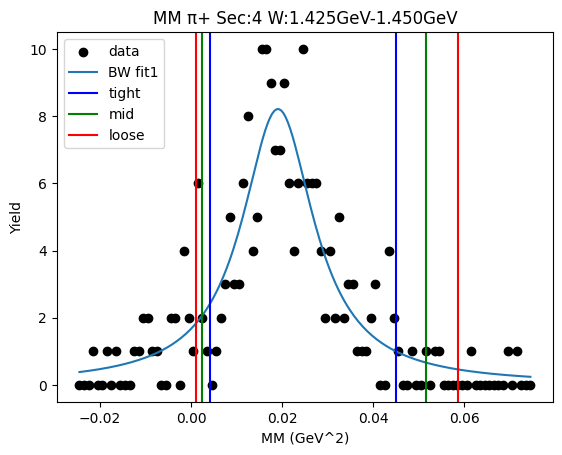

W bin: 2 1.450GeV-1.475GeV
Cut Bounds [[0.00725049 0.00521601 0.00351578]
 [0.04597957 0.0516909  0.0577365 ]]
Cut Bounds Err [[5.48321284e-06 5.57015625e-06 5.32907189e-06]
 [1.38081016e-05 1.75349853e-05 2.15956194e-05]]


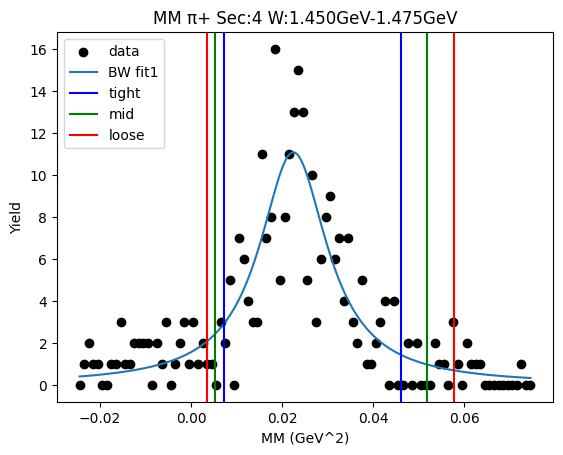

W bin: 3 1.475GeV-1.500GeV
Cut Bounds [[0.00567822 0.00377375 0.00225698]
 [0.04604679 0.05221603 0.05877299]]
Cut Bounds Err [[4.57485008e-06 4.46700980e-06 4.02572887e-06]
 [1.30277828e-05 1.66162280e-05 2.05432559e-05]]


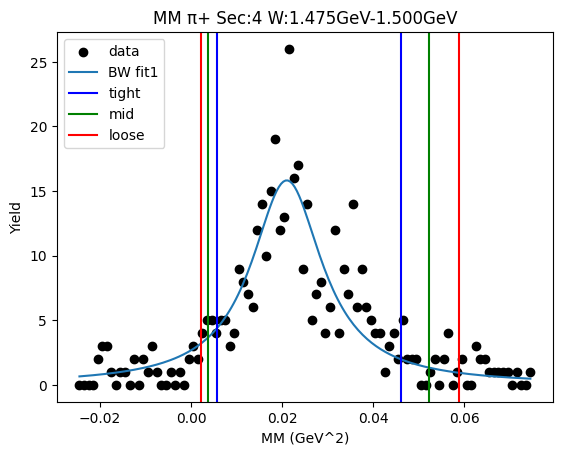

W bin: 4 1.500GeV-1.525GeV
Cut Bounds [[0.00687749 0.00494846 0.00333621]
 [0.04359075 0.04900437 0.05473477]]
Cut Bounds Err [[2.65619479e-06 2.69850046e-06 2.58198556e-06]
 [6.68716563e-06 8.49189857e-06 1.04582380e-05]]


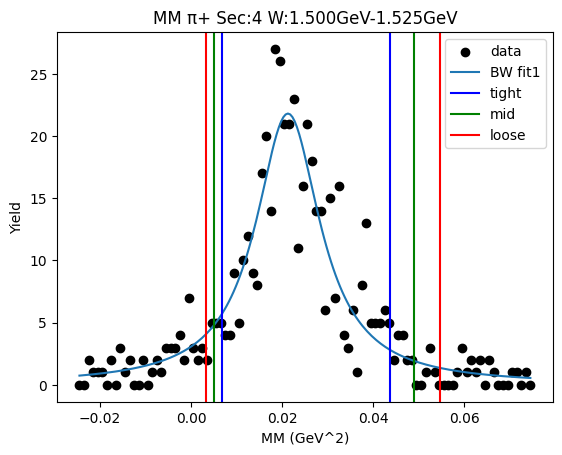

W bin: 5 1.525GeV-1.550GeV
Cut Bounds [[0.00810189 0.00611878 0.00441358]
 [0.04321796 0.04825806 0.05357607]]
Cut Bounds Err [[1.61925018e-06 1.68533531e-06 1.66795007e-06]
 [3.73983838e-06 4.73302499e-06 5.81129747e-06]]


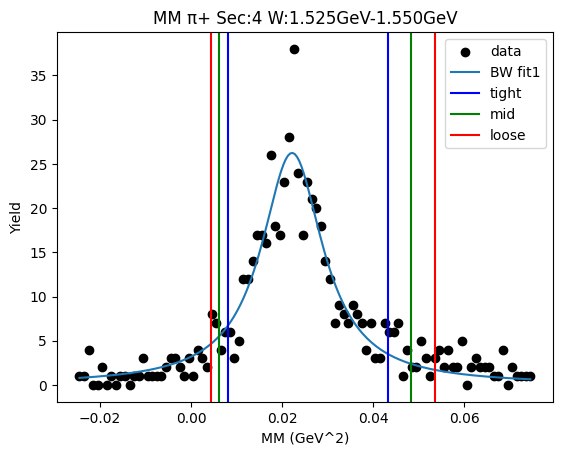

W bin: 6 1.550GeV-1.575GeV
Cut Bounds [[0.0076203  0.00548283 0.00369639]
 [0.04830154 0.05430033 0.06065014]]
Cut Bounds Err [[1.51890368e-06 1.54311441e-06 1.47648705e-06]
 [3.82405988e-06 4.85620295e-06 5.98076037e-06]]


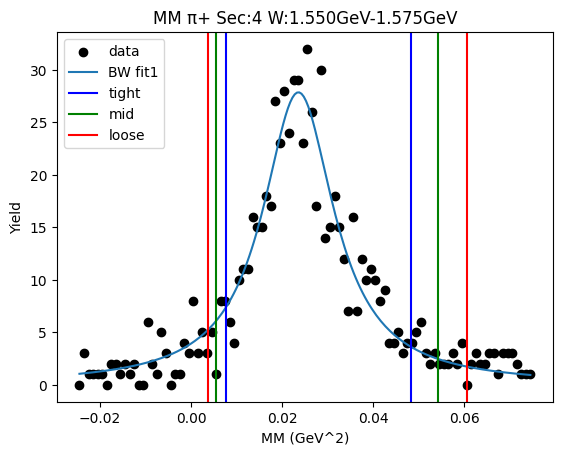

W bin: 7 1.575GeV-1.600GeV
Cut Bounds [[0.00742763 0.00532465 0.00357086]
 [0.04766319 0.05360732 0.05990064]]
Cut Bounds Err [[2.04951691e-06 2.07836824e-06 1.98338858e-06]
 [5.19179929e-06 6.59461038e-06 8.12339047e-06]]


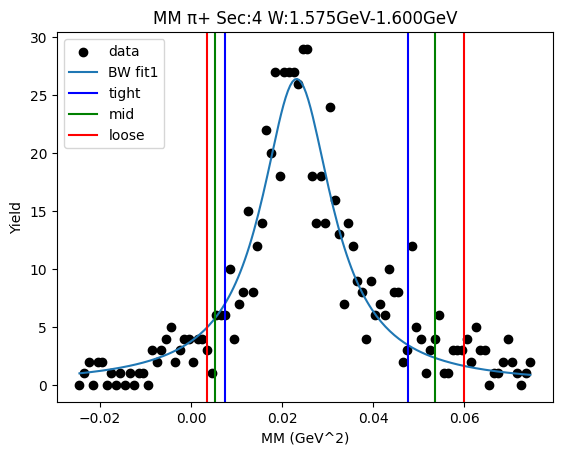

W bin: 8 1.600GeV-1.625GeV
Cut Bounds [[0.00710631 0.00500619 0.00327298]
 [0.04828739 0.05442349 0.06092649]]
Cut Bounds Err [[2.16823765e-06 2.17968413e-06 2.05380150e-06]
 [5.65199445e-06 7.18676017e-06 8.86115196e-06]]


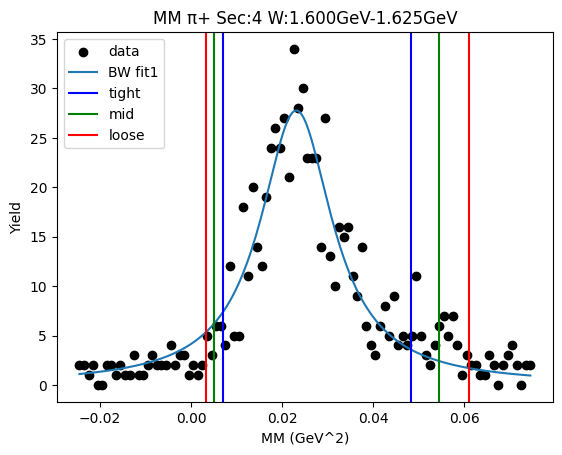

W bin: 9 1.625GeV-1.650GeV
Cut Bounds [[0.00764907 0.00568132 0.00400563]
 [0.04339042 0.04857093 0.05404351]]
Cut Bounds Err [[2.64729959e-06 2.73249720e-06 2.67366179e-06]
 [6.30515233e-06 7.98957002e-06 9.82070884e-06]]


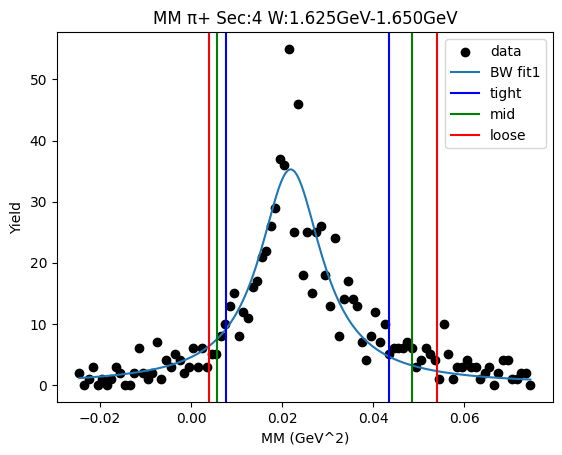

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[0.00612109 0.00413672 0.00253989]
 [0.0472793  0.05352657 0.06016138]]
Cut Bounds Err [[1.27634353e-06 1.25672699e-06 1.14754534e-06]
 [3.54722465e-06 4.52061586e-06 5.58498113e-06]]


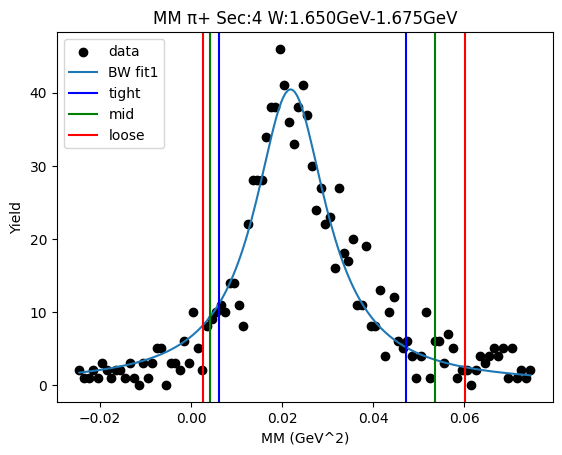

W bin: 11 1.675GeV-1.700GeV
Cut Bounds [[0.00577092 0.00377345 0.0021987 ]
 [0.04899483 0.05564214 0.06271217]]
Cut Bounds Err [[1.04822361e-06 1.01524161e-06 9.03105181e-07]
 [3.05426445e-06 3.89853925e-06 4.82315419e-06]]


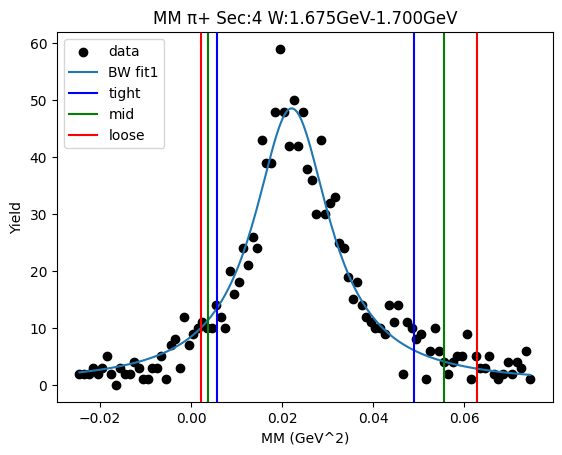

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[0.00710409 0.0050503  0.00334606]
 [0.04686761 0.05276651 0.05901497]]
Cut Bounds Err [[7.62377185e-07 7.69882776e-07 7.30259266e-07]
 [1.95817683e-06 2.48854400e-06 3.06684367e-06]]


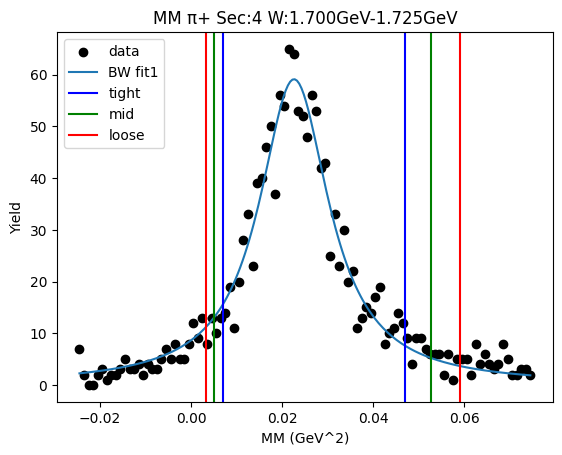

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[0.00693342 0.00482666 0.00310039]
 [0.04892819 0.05522038 0.06189307]]
Cut Bounds Err [[1.06284823e-06 1.06213395e-06 9.92003964e-07]
 [2.82343090e-06 3.59257480e-06 4.43227123e-06]]


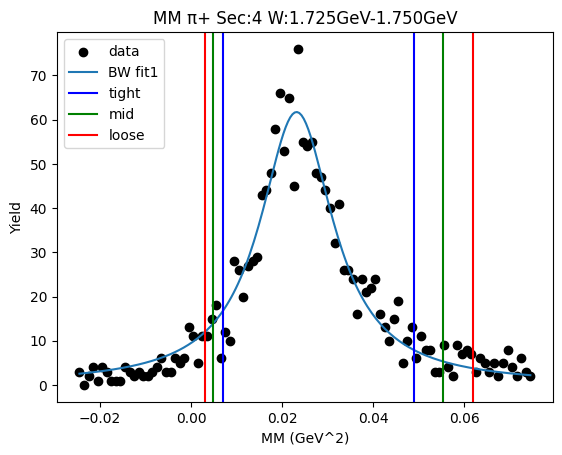

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[0.0067024  0.00455999 0.00282888]
 [0.05074795 0.05741465 0.06449265]]
Cut Bounds Err [[1.14601454e-06 1.13220067e-06 1.03920855e-06]
 [3.15343767e-06 4.01747216e-06 4.96193048e-06]]


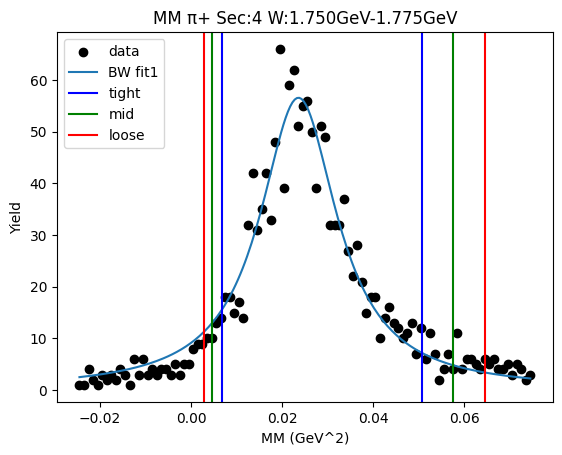

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[0.00557609 0.00352793 0.00194652]
 [0.05173001 0.05891263 0.06656201]]
Cut Bounds Err [[1.33183312e-06 1.26889088e-06 1.09839017e-06]
 [4.05654255e-06 5.18523864e-06 6.42302900e-06]]


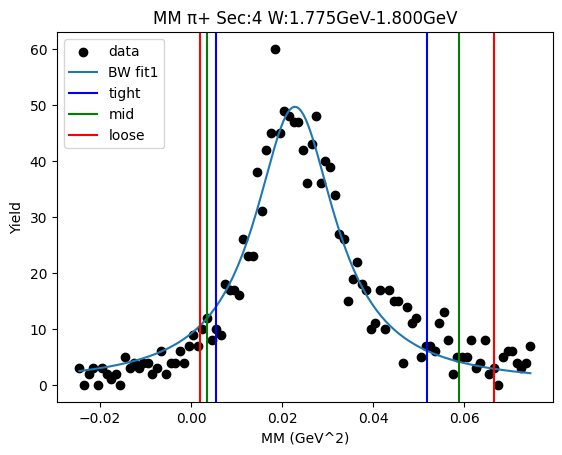

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[0.00525188 0.00315233 0.00158574]
 [0.05556027 0.0635224  0.07201749]]
Cut Bounds Err [[1.94284905e-06 1.80299672e-06 1.49028111e-06]
 [6.31922369e-06 8.09361199e-06 1.00431672e-05]]


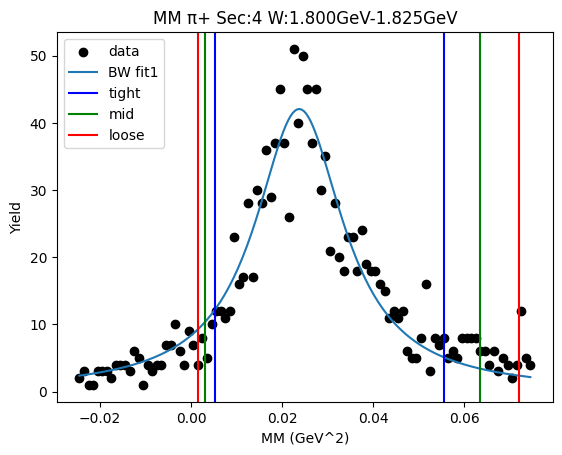

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[0.00494256 0.00288121 0.00137273]
 [0.05596457 0.06410761 0.07280354]]
Cut Bounds Err [[2.40765745e-06 2.20195249e-06 1.77128761e-06]
 [8.10168029e-06 1.03866493e-05 1.28994909e-05]]


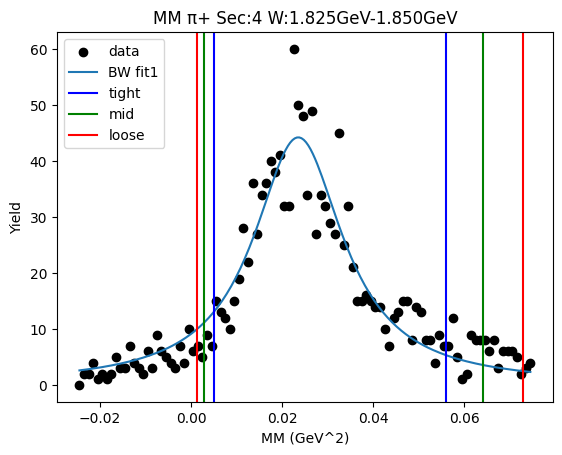

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[0.00372027 0.00181109 0.00058177]
 [0.06020404 0.06959162 0.07965905]]
Cut Bounds Err [[1.99449902e-06 1.66705715e-06 1.10115669e-06]
 [8.02341525e-06 1.03337670e-05 1.28852420e-05]]


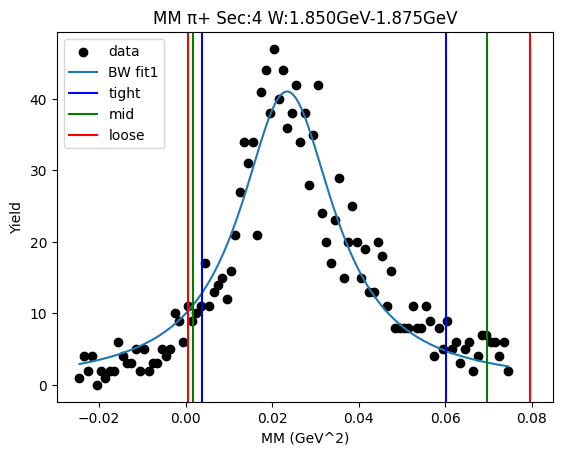

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[0.00468065 0.0026724  0.00122327]
 [0.05551458 0.06367311 0.07239077]]
Cut Bounds Err [[1.67395580e-06 1.51511281e-06 1.19462499e-06]
 [5.76493355e-06 7.39557622e-06 9.18992265e-06]]


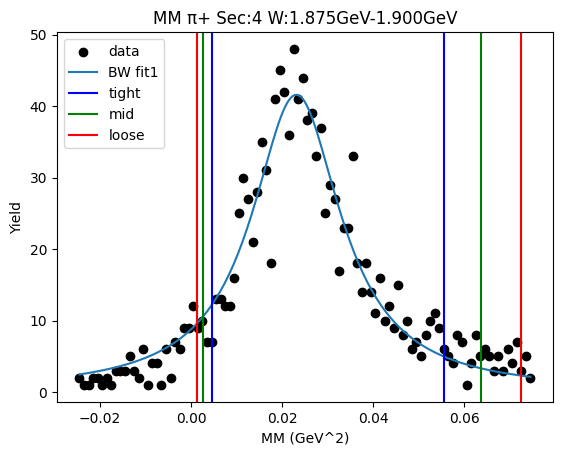

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00531367 0.00325765 0.00170212]
 [0.05340068 0.06096207 0.06902394]]
Cut Bounds Err [[0.15819063 0.18982883 0.22146702]
 [0.15819133 0.18982953 0.22146772]]


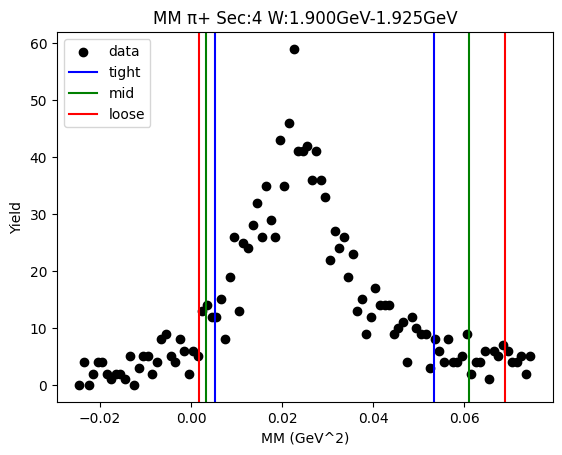

W bin: 21 1.925GeV-1.950GeV
background fit [5.30624696 4.14021316 0.39658874 2.12177534 0.05683653 0.01572612]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.004736519276577211 0.03671903977621442
Breit-Wigner Peak [3.52726836 0.14397145 0.07300973]
Gaus2 [1.63699887 3.46222431 0.74875384]
Gaus3 [6.83781993 0.03759575 0.01959033]
Cut Bounds [[0.00439589 0.00257734 0.0012414 ]
 [0.0491249  0.05625215 0.06386201]]
Cut Bounds Err [[4.08003304e-05 3.74883481e-05 3.03533548e-05]
 [1.36392644e-04 1.75137715e-04 2.17706512e-04]]


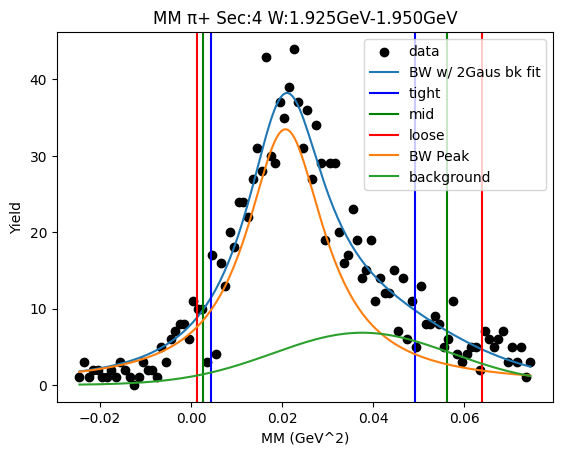

W bin: 22 1.950GeV-1.975GeV
background fit [2.34719605e-11 3.04682738e+00 2.75023103e+03 1.04488092e+07
 2.73155329e-01 3.75388181e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.0019180764620546804 0.043618703936441586
Breit-Wigner Peak [3.97676534 0.15089198 0.08336729]
Gaus2 [8.09838439e-28 9.34182104e+01 4.68864365e+03]
Gaus3 [3.74268452e+06 8.09229242e-01 1.38984924e-01]
Cut Bounds [[0.00386926 0.00197719 0.00071438]
 [0.05739886 0.06621271 0.07565582]]
Cut Bounds Err [[1.96263177e-05 1.68349441e-05 1.18055886e-05]
 [7.55921108e-05 9.74221345e-05 1.21490794e-04]]


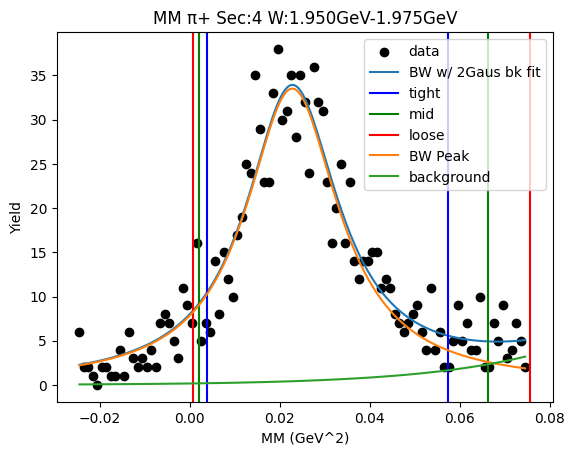

W bin: 23 1.975GeV-2.000GeV
background fit [2.59640914e-08 9.34182104e+01 4.68864365e+03 3.74268452e+06
 8.09045759e-01 1.40232168e-01]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.01224595040573451 0.03212405601943069
Breit-Wigner Peak [2.88925817 0.14894631 0.05755882]
Gaus2 [8125.22367138 1275.55802231   23.01216786]
Gaus3 [6.80698386 0.03766512 0.02939413]
Cut Bounds [[0.00769366 0.00569526 0.00399682]
 [0.04417525 0.04947317 0.05507105]]
Cut Bounds Err [[8.48682969e-06 8.76086344e-06 8.56153817e-06]
 [2.03361364e-05 2.58211089e-05 3.17801655e-05]]


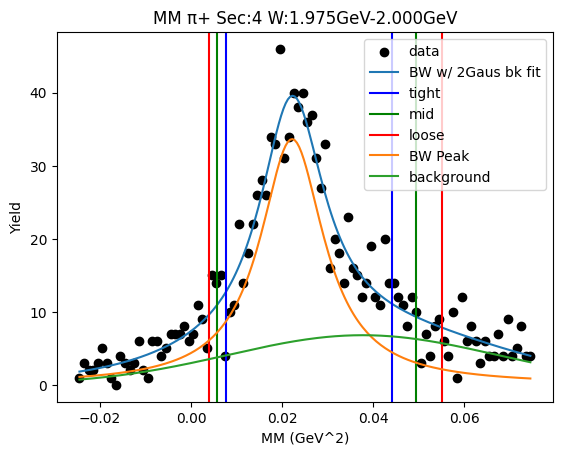

W bin: 24 2.000GeV-2.025GeV
background fit [5.23769363e+03 1.44283760e+03 1.38875686e+02 2.25122658e+00
 6.29259346e-02 7.13930337e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.005153545593864637 0.046926819184664834
Breit-Wigner Peak [3.40039056 0.1445221  0.09316684]
Gaus2 [20336.36380892  7462.36157961   979.78077281]
Gaus3 [3.45223863 0.05572048 0.02628186]
Cut Bounds [[2.06192590e-03 6.54628122e-04 3.32118092e-05]
 [5.93583843e-02 6.94103783e-02 8.02482536e-02]]
Cut Bounds Err [[5.14710687e-05 3.48011641e-05 9.14497636e-06]
 [2.76164401e-04 3.58351022e-04 4.49525275e-04]]


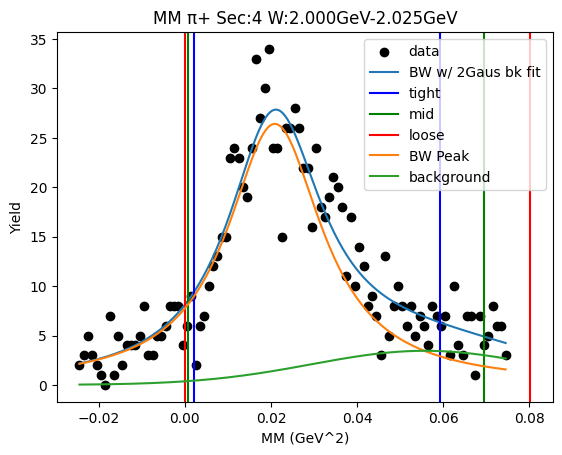

W bin: 25 2.025GeV-2.050GeV
background fit [1.17334069e+04 1.98876784e+04 2.54668238e+03 1.72325827e+00
 5.62767524e-02 1.01116485e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.005268324317962453 0.03855077157702153
Breit-Wigner Peak [2.58842005 0.14801874 0.07447869]
Gaus2 [58066.50939664  4192.37414285   473.89669011]
Gaus3 [5.14633038 0.03816543 0.02413589]
Cut Bounds [[0.00473153 0.0028026  0.00137589]
 [0.05164319 0.0590966  0.06705222]]
Cut Bounds Err [[4.77983962e-05 4.41420642e-05 3.60826475e-05]
 [1.57913475e-04 2.02699868e-04 2.51890945e-04]]


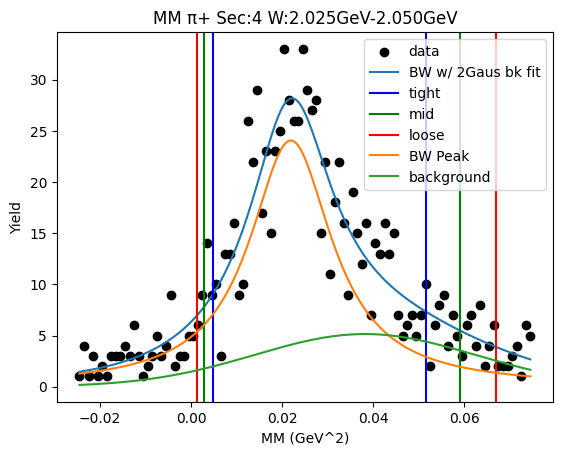

W bin: 26 2.050GeV-2.075GeV
background fit [1.03522463e+04 7.55620248e+03 8.34192715e+02 1.56640268e+00
 5.44968324e-02 9.29286728e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.0021081496248333484 0.0411380022520166
Breit-Wigner Peak [2.73868444 0.14704787 0.08065343]
Gaus2 [6304.92964078 6303.03698134  661.64462104]
Gaus3 [5.18205589 0.04038305 0.0191742 ]
Cut Bounds [[0.00375112 0.00194358 0.000725  ]
 [0.05421884 0.06250485 0.07137981]]
Cut Bounds Err [[3.48212872e-05 3.00727855e-05 2.14260810e-05]
 [1.32385283e-04 1.70541212e-04 2.12599742e-04]]


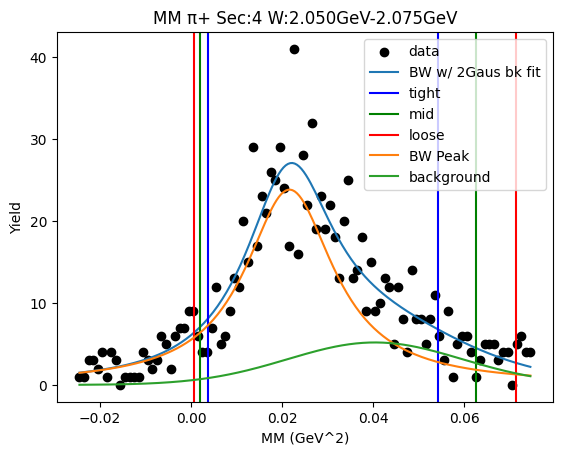

W bin: 27 2.075GeV-2.100GeV
background fit [6.30492964e+03 7.88916635e+03 1.80772178e+02 3.11299158e+00
 5.76888261e-02 1.12684772e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.010691851224941774 0.030521420731772185
Breit-Wigner Peak [2.20699982 0.14355012 0.05748851]
Gaus2 [8738.30762363 1693.50392694  405.51586602]
Gaus3 [4.06420311 0.04527565 0.01395606]
Cut Bounds [[0.00678846 0.0049225  0.00335576]
 [0.04190541 0.04706283 0.05251948]]
Cut Bounds Err [[4.93439480e-06 5.03315280e-06 4.84302363e-06]
 [1.22597943e-05 1.55627468e-05 1.91593705e-05]]


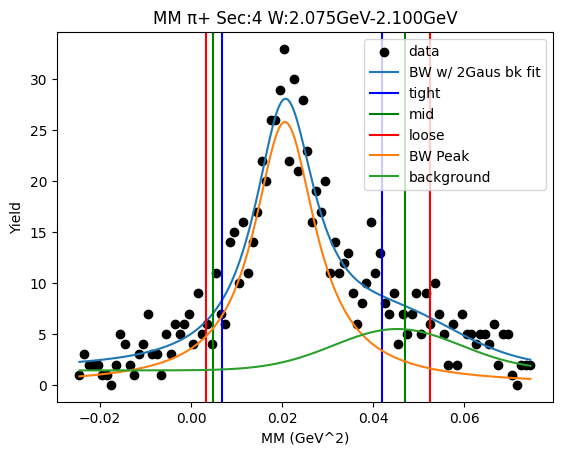

W bin: 28 2.100GeV-2.125GeV
background fit [5.96909435e+03 4.62310050e+03 1.07018044e+03 5.16211964e+01
 6.99001912e-02 1.59166609e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.005438051088138232 0.05156810671847072
Breit-Wigner Peak [3.0603715  0.15187175 0.09747321]
Gaus2 [6195.24926114 4618.54135777 1050.4105989 ]
Gaus3 [3.29313125e+01 6.97566778e-02 1.13158299e-04]
Cut Bounds [[2.32100846e-03 7.52836447e-04 4.48750570e-05]
 [6.53143127e-02 7.63448015e-02 8.82355010e-02]]
Cut Bounds Err [[1.21123948e-05 8.27542561e-06 2.35672633e-06]
 [6.42533593e-05 8.33354445e-05 1.04502896e-04]]


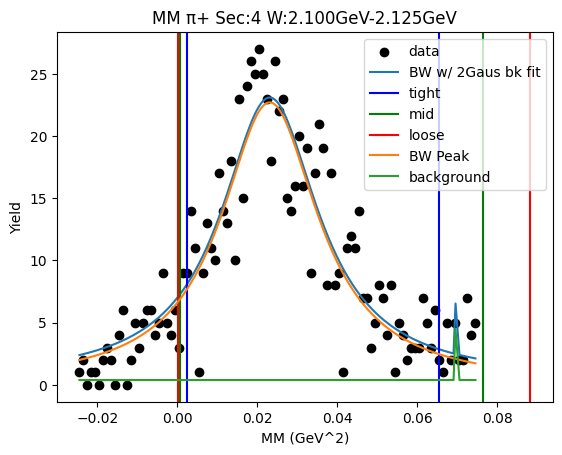

Value Error1.1
	Just skip it for now


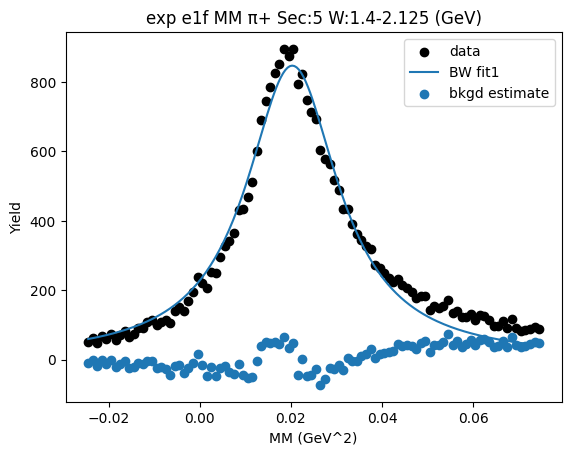

W bin: 1 1.425GeV-1.450GeV
Cut Bounds [[0.00049745 0.00049745 0.00049745]
 [0.00049745 0.00049745 0.00049745]]
Cut Bounds Err [[3.75484661e-13 3.75484587e-13 3.75484513e-13]
 [3.75485397e-13 3.75485470e-13 3.75485544e-13]]


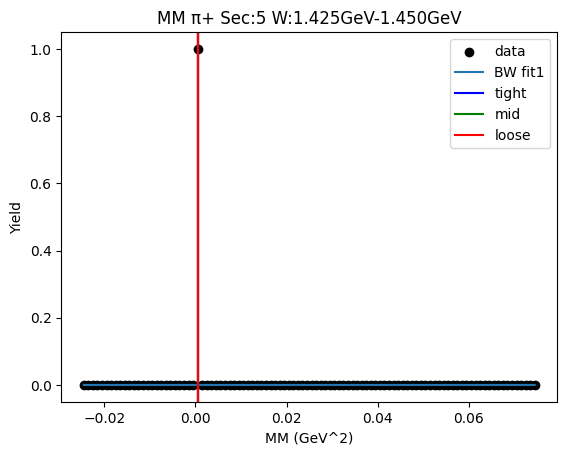

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


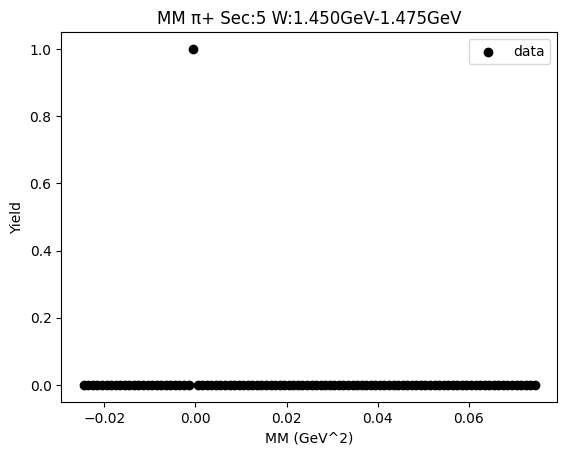

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


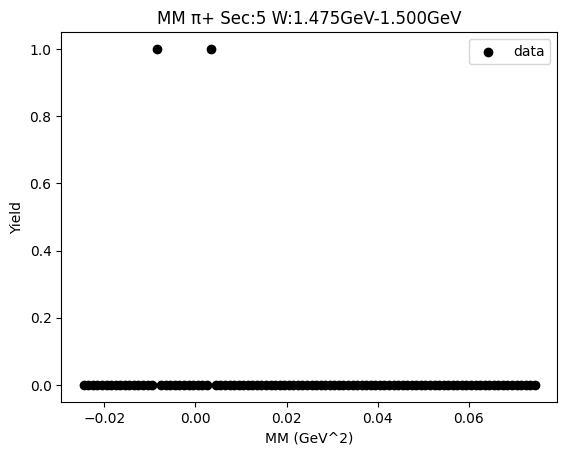

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


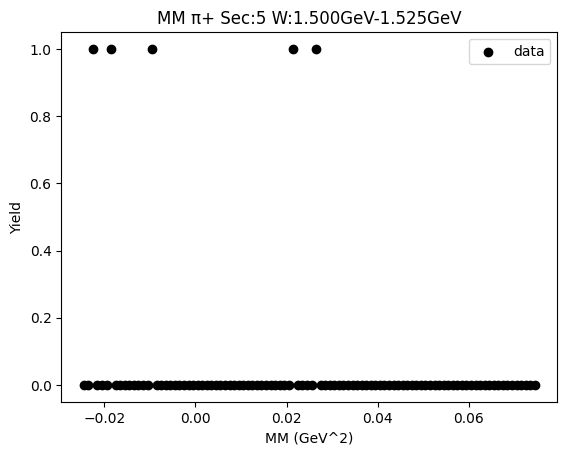

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


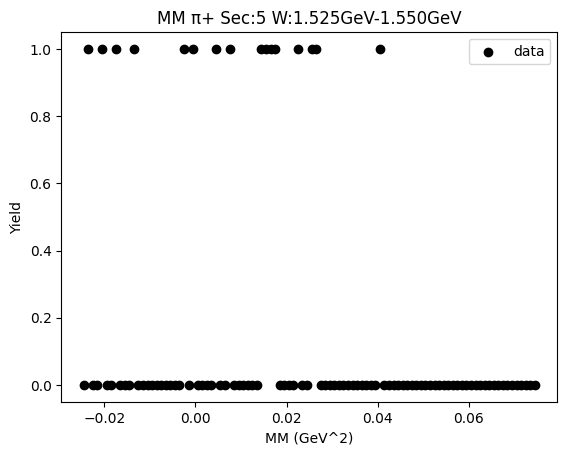

W bin: 6 1.550GeV-1.575GeV
Cut Bounds [[ 71.66399901 103.19666584 140.46262168]
 [ 71.66822628 103.20173856 140.46853985]]
Cut Bounds Err [[1.53664136e+11 2.21276900e+11 3.01182976e+11]
 [1.53668668e+11 2.21282338e+11 3.01189320e+11]]


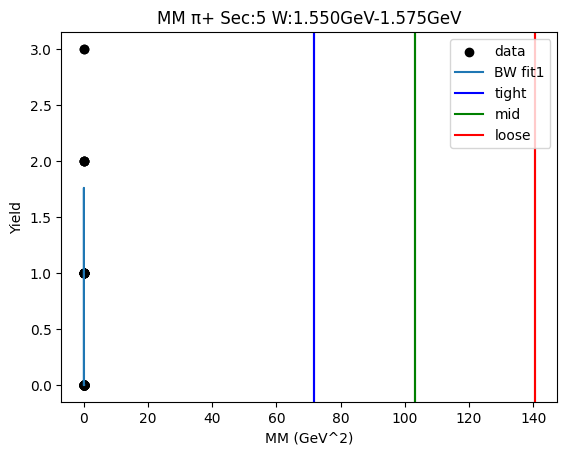

W bin: 7 1.575GeV-1.600GeV
Cut Bounds [[305050.42751927 439272.63508953 597898.88334858]
 [305050.58970075 439272.8297073  597899.11040265]]
Cut Bounds Err [[4.93814284e+15 7.11092585e+15 9.67876034e+15]
 [4.93814415e+15 7.11092743e+15 9.67876218e+15]]


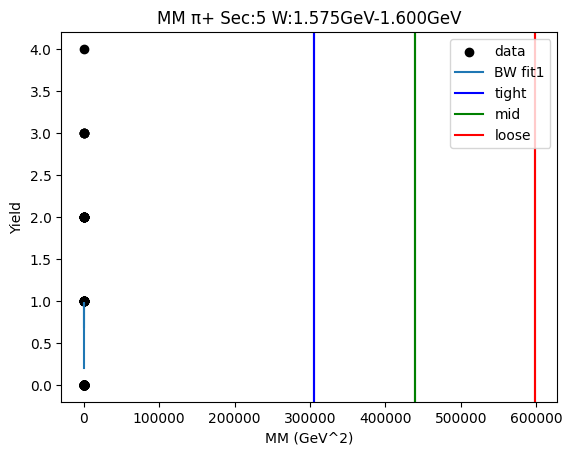

W bin: 8 1.600GeV-1.625GeV
Cut Bounds [[12305178.81756214 17719457.52369501 24118150.54403468]
 [12305179.03760816 17719457.78775023 24118150.85209911]]
Cut Bounds Err [[1.05867391e+17 1.52449044e+17 2.07500087e+17]
 [1.05867392e+17 1.52449045e+17 2.07500089e+17]]


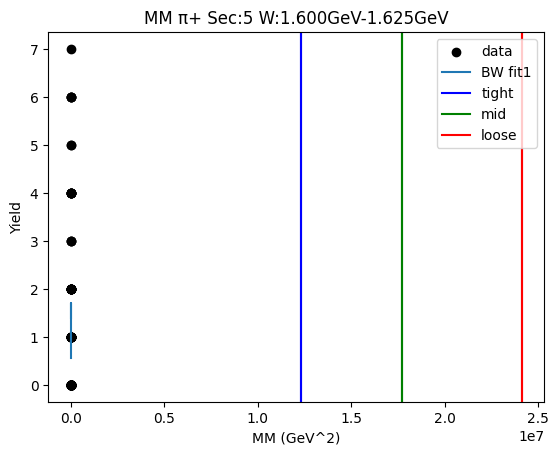

W bin: 9 1.625GeV-1.650GeV
Cut Bounds [[12171136.60069688 17526436.72930406 23855427.79406717]
 [12171136.80320152 17526436.97230963 23855428.07757367]]
Cut Bounds Err [[5.08818128e+16 7.32698104e+16 9.97283531e+16]
 [5.08818132e+16 7.32698109e+16 9.97283537e+16]]


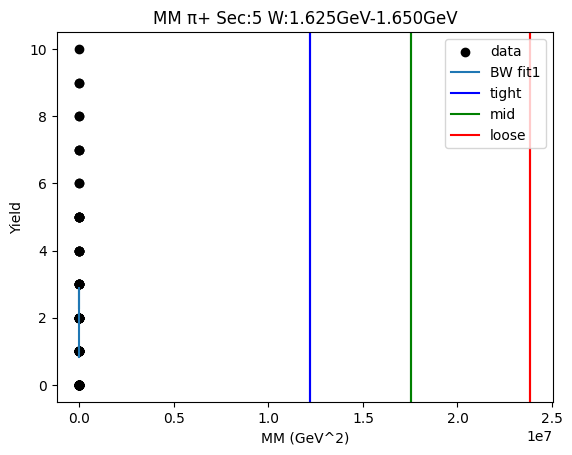

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[12170963.22939694 17526217.61812345 23855159.25448788]
 [12171217.96221748 17526523.29750809 23855515.88043662]]
Cut Bounds Err [[2.08512958e+25 3.00258922e+25 4.08686009e+25]
 [2.08515140e+25 3.00261540e+25 4.08689064e+25]]


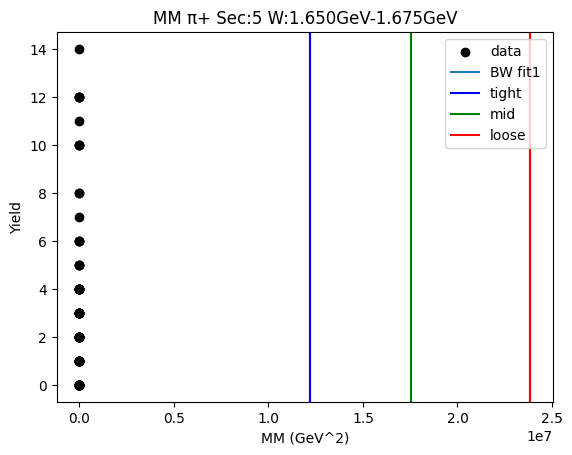

W bin: 11 1.675GeV-1.700GeV
Cut Bounds [[12170921.6824111  17526147.94235755 23855054.84346896]
 [12171094.34701884 17526355.13988685 23855296.57391981]]
Cut Bounds Err [[1.84003663e+25 2.64965431e+25 3.60647545e+25]
 [1.84004968e+25 2.64966998e+25 3.60649372e+25]]


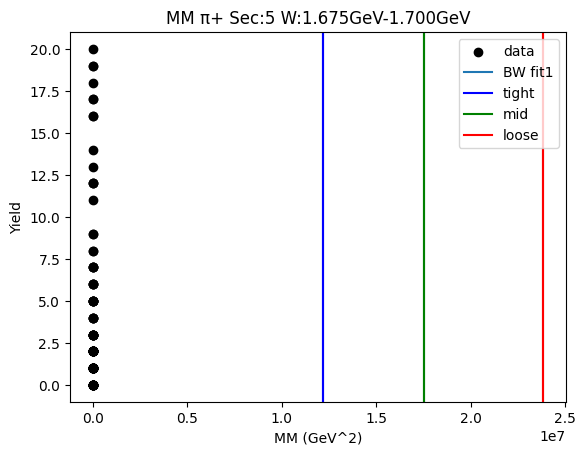

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[12170825.64049627 17526021.27590999 23854893.7471201 ]
 [12171095.25515982 17526344.81350626 23855271.20764909]]
Cut Bounds Err [[1.44139708e+25 2.07561371e+25 2.82514275e+25]
 [1.44141304e+25 2.07563287e+25 2.82516510e+25]]


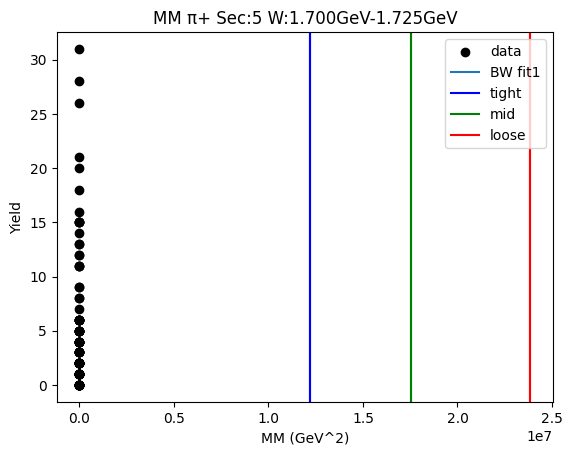

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[12170780.7547386  17525957.98934159 23854808.91852334]
 [12171061.61054055 17526295.01630393 23855202.11664607]]
Cut Bounds Err [[1.77546491e+25 2.55667193e+25 3.47991697e+25]
 [1.77548540e+25 2.55669652e+25 3.47994565e+25]]


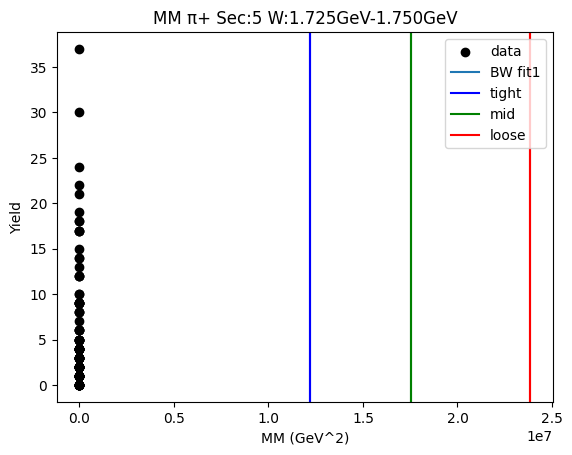

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[12170773.35700988 17525940.33713574 23854778.08685315]
 [12170995.88328811 17526207.3686696  23855089.62364266]]
Cut Bounds Err [[1.56251124e+25 2.25001789e+25 3.06252602e+25]
 [1.56252552e+25 2.25003504e+25 3.06254602e+25]]


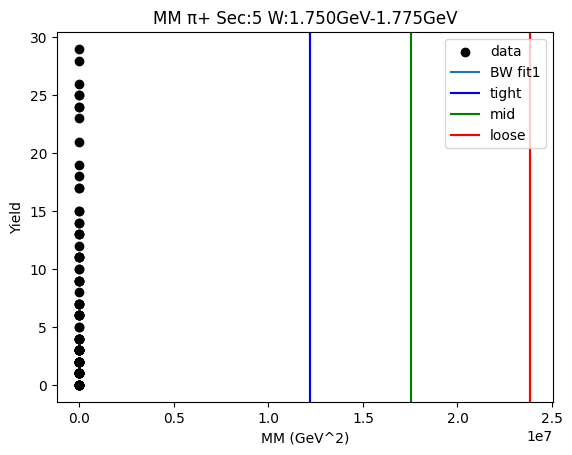

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[12170717.26066178 17525866.904255   23854685.27836273]
 [12171001.00302802 17526207.3950945  23855082.51767548]]
Cut Bounds Err [[1.42671708e+25 2.05447459e+25 2.79637014e+25]
 [1.42673371e+25 2.05449455e+25 2.79639342e+25]]


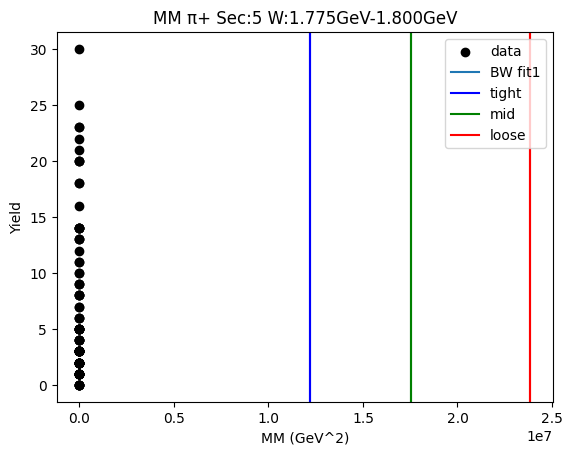

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[12170704.06477645 17525844.34759793 23854651.12039691]
 [12170958.18532437 17526149.29225544 23855006.889164  ]]
Cut Bounds Err [[1.28660307e+25 1.85271003e+25 2.52174577e+25]
 [1.28661650e+25 1.85272614e+25 2.52176457e+25]]


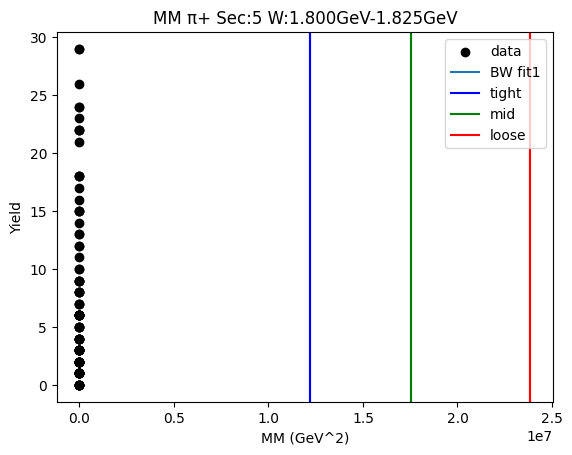

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[12170637.6195624  17525749.86518747 23854523.68474061]
 [12170901.72935588 17526066.79693964 23854893.43845148]]
Cut Bounds Err [[1.23857305e+25 1.78354681e+25 2.42760695e+25]
 [1.23858649e+25 1.78356294e+25 2.42762576e+25]]


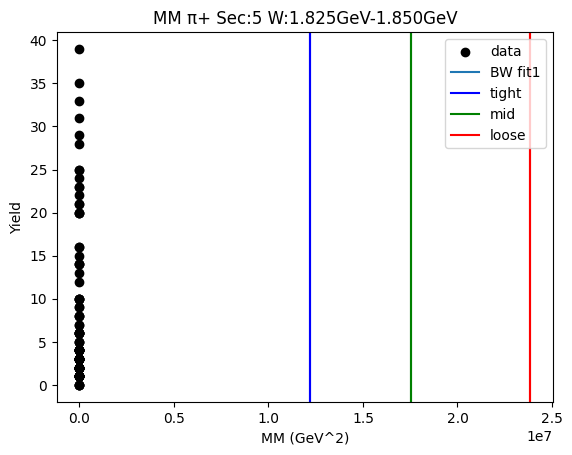

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[12170613.6964809  17525711.6456126  23854467.99804136]
 [12170846.38650135 17525990.87363715 23854793.76406999]]
Cut Bounds Err [[1.24735442e+25 1.79619180e+25 2.44481801e+25]
 [1.24736635e+25 1.79620611e+25 2.44483470e+25]]


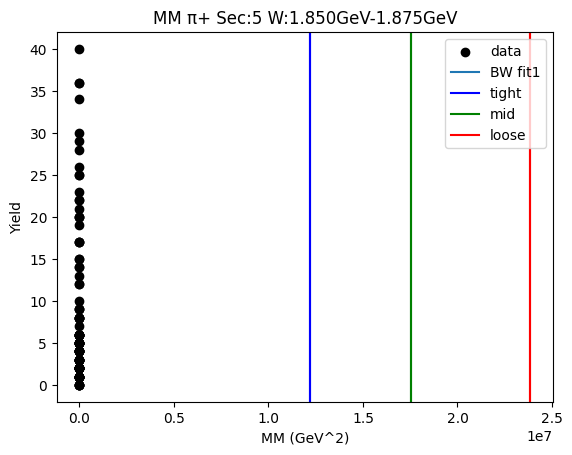

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[12170566.18272486 17525647.44905308 23854384.7253336 ]
 [12170834.06682007 17525968.90996732 23854759.76306688]]
Cut Bounds Err [[1.38741788e+25 1.99788357e+25 2.71934331e+25]
 [1.38743315e+25 1.99790190e+25 2.71936469e+25]]


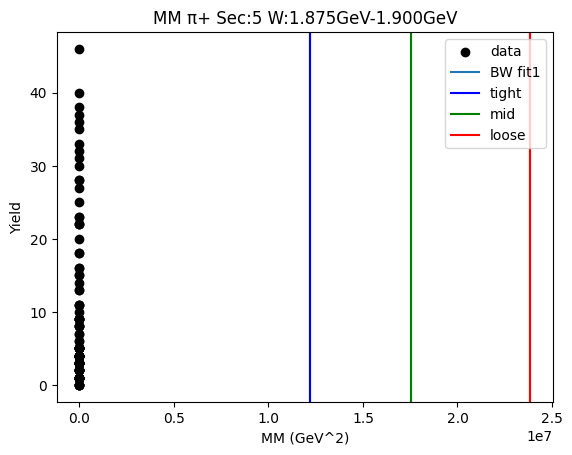

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12170537.37571304 17525605.96691882 23854328.26350357]
 [12170805.25949799 17525927.42746076 23854703.3008025 ]]
Cut Bounds Err [[1.48989523e+25 2.14545109e+25 2.92019923e+25]
 [1.48991162e+25 2.14547077e+25 2.92022219e+25]]


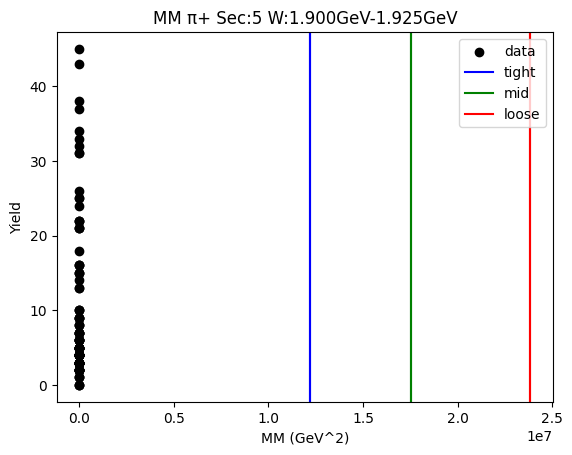

W bin: 21 1.925GeV-1.950GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12175041.84775855 17532085.72429096 23863141.43649901]
 [12175254.04459473 17532340.36049438 23863438.51206966]]
Cut Bounds Err [[1.14103509e+25 1.64309173e+25 2.23643157e+25]
 [1.14104504e+25 1.64310366e+25 2.23644549e+25]]


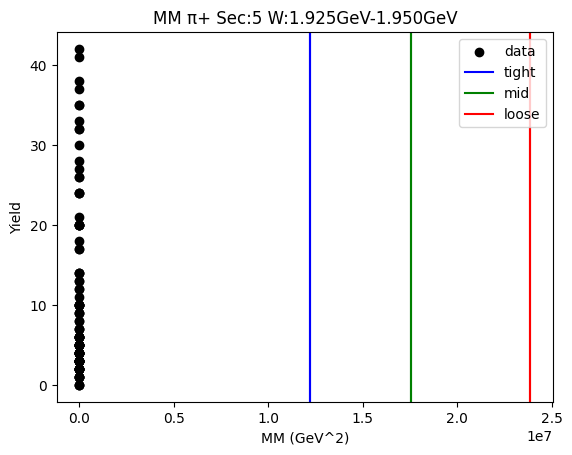

W bin: 22 1.950GeV-1.975GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12174978.37025127 17532005.59972816 23863043.34771267]
 [12175284.59340236 17532373.06750947 23863472.0601242 ]]
Cut Bounds Err [[1.36460501e+25 1.96503328e+25 2.67463063e+25]
 [1.36462218e+25 1.96505387e+25 2.67465466e+25]]


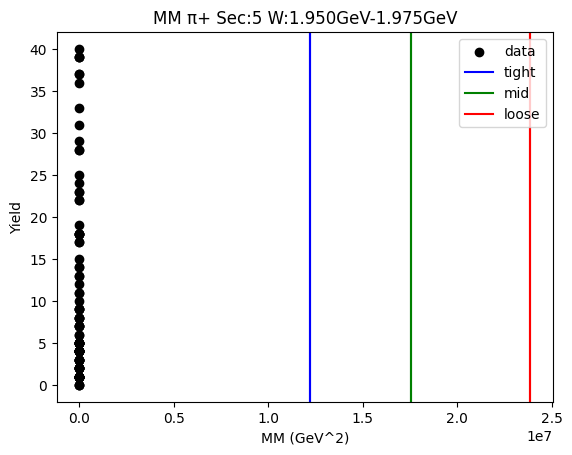

W bin: 23 1.975GeV-2.000GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12440000.17466129 17913600.28280157 24382400.41534453]
 [12440000.43540554 17913600.59569468 24382400.78038649]]
Cut Bounds Err [[1.06288221e+17 1.53055039e+17 2.08324914e+17]
 [1.06288222e+17 1.53055040e+17 2.08324915e+17]]


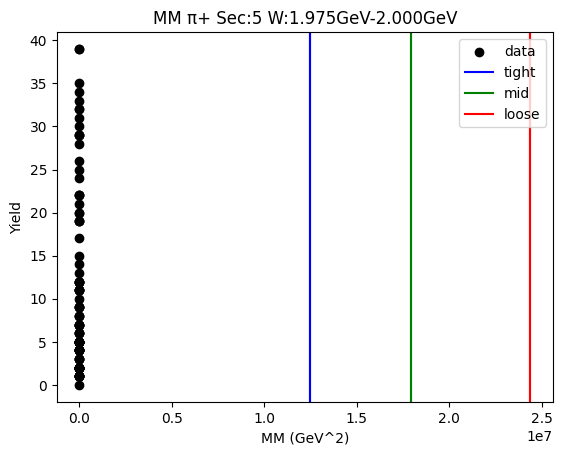

W bin: 24 2.000GeV-2.025GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12439838.15075408 17913397.44416868 24382153.95869285]
 [12440092.37763474 17913702.51642546 24382509.87632576]]
Cut Bounds Err [[1.69267217e+25 2.43745000e+25 3.31764230e+25]
 [1.69268947e+25 2.43747076e+25 3.31766651e+25]]


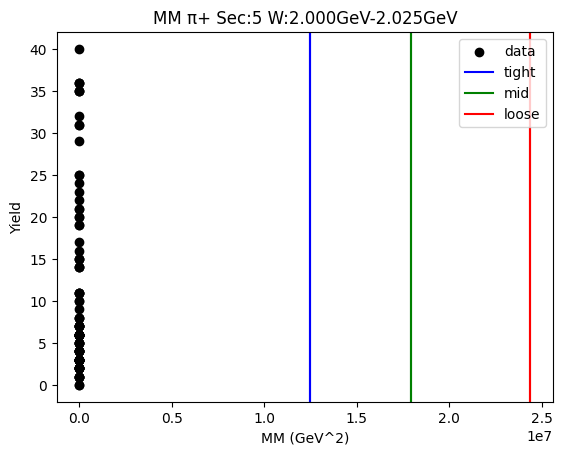

W bin: 25 2.025GeV-2.050GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12439805.425722   17913352.31259954 24382094.46674603]
 [12440076.25673871 17913677.3098196  24382473.63016943]]
Cut Bounds Err [[1.22485939e+25 1.76379912e+25 2.40072813e+25]
 [1.22487272e+25 1.76381512e+25 2.40074680e+25]]


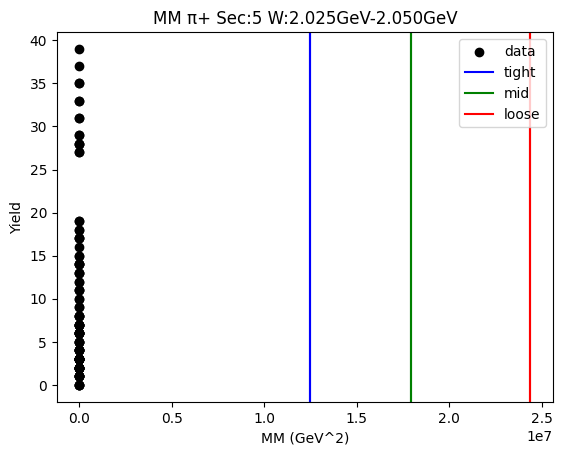

W bin: 26 2.050GeV-2.075GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12439771.27219117 17913306.46456097 24382035.30293782]
 [12440069.87888114 17913664.79258893 24382453.35230378]]
Cut Bounds Err [[1.06518787e+25 1.53387207e+25 2.08777181e+25]
 [1.06520066e+25 1.53388741e+25 2.08778971e+25]]


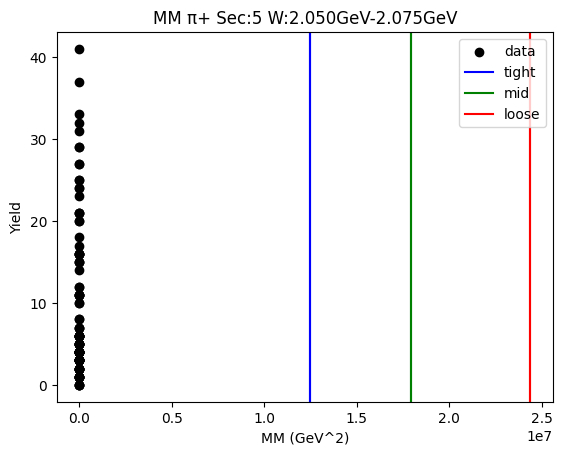

W bin: 27 2.075GeV-2.100GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12439710.24770834 17913223.99962351 24381928.31903608]
 [12440053.94091364 17913636.43146988 24382409.48952352]]
Cut Bounds Err [[1.62129825e+25 2.33467216e+25 3.17775083e+25]
 [1.62132064e+25 2.33469904e+25 3.17778219e+25]]


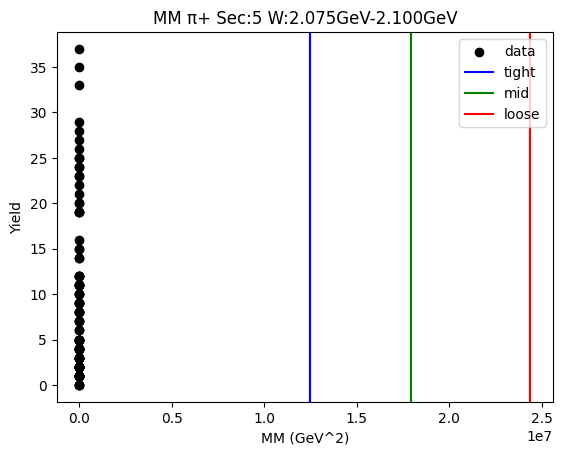

W bin: 28 2.100GeV-2.125GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[12439725.91260934 17913236.14697091 24381934.73196782]
 [12439982.85393771 17913544.47656496 24382294.44982755]]
Cut Bounds Err [[1.09484106e+25 1.57657248e+25 2.14589164e+25]
 [1.09485236e+25 1.57658605e+25 2.14590747e+25]]


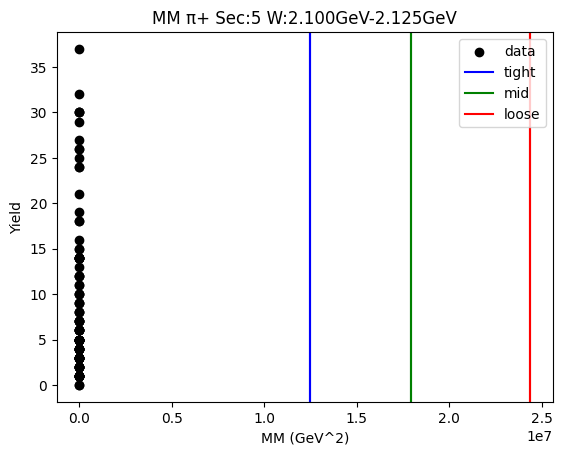

Value Error1.1
	Just skip it for now


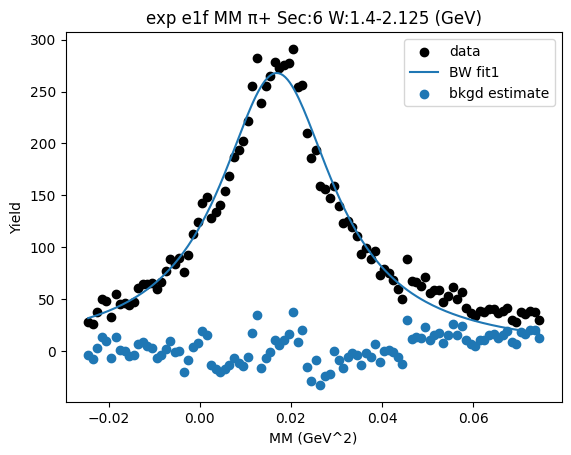

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


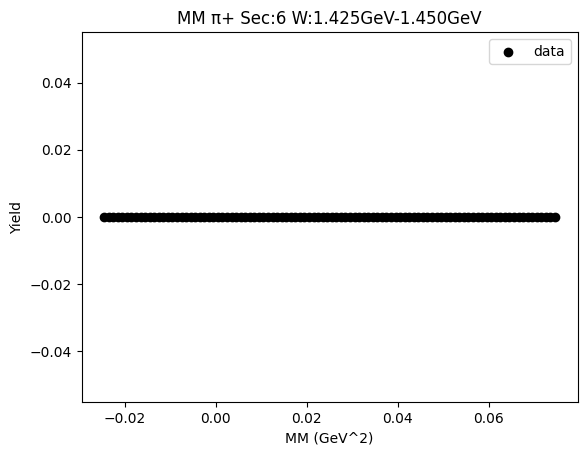

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


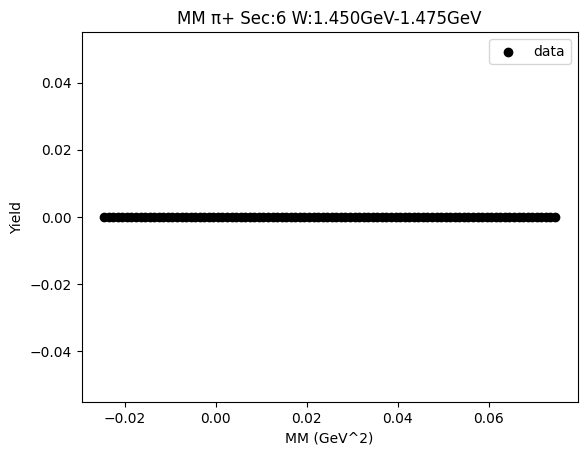

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


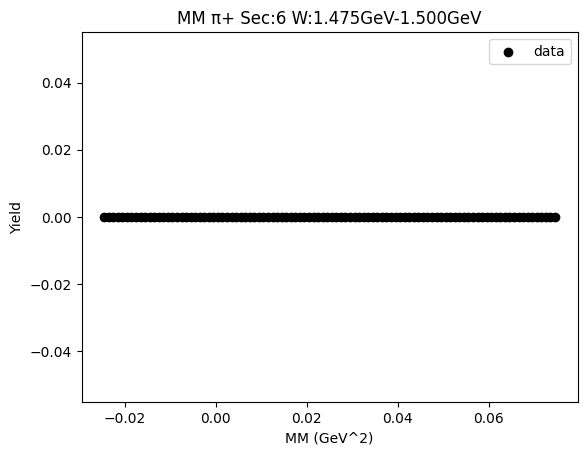

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


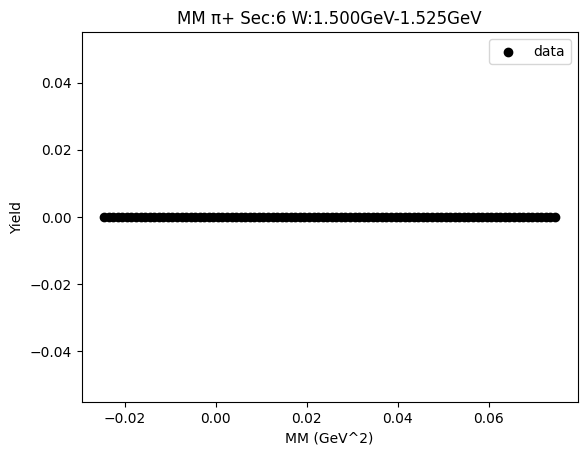

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


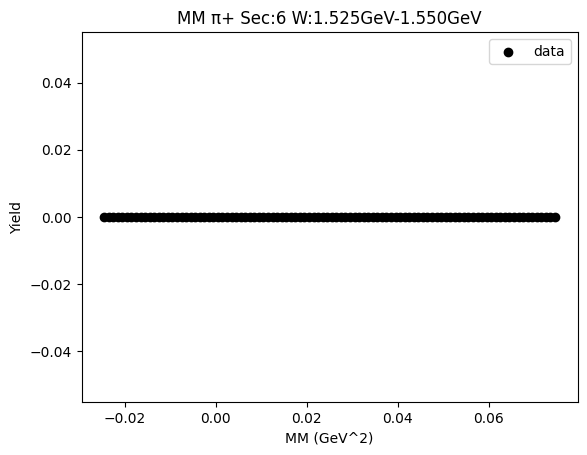

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


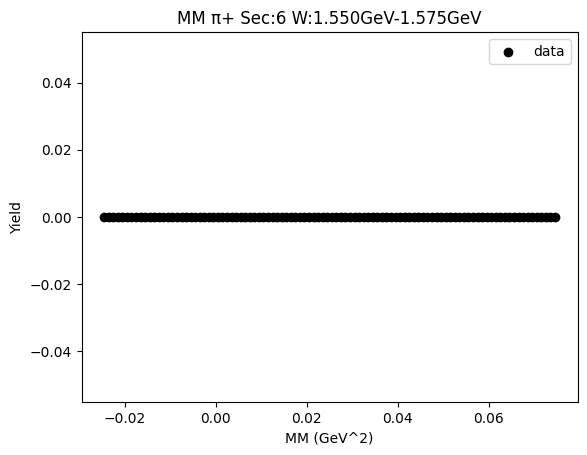

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


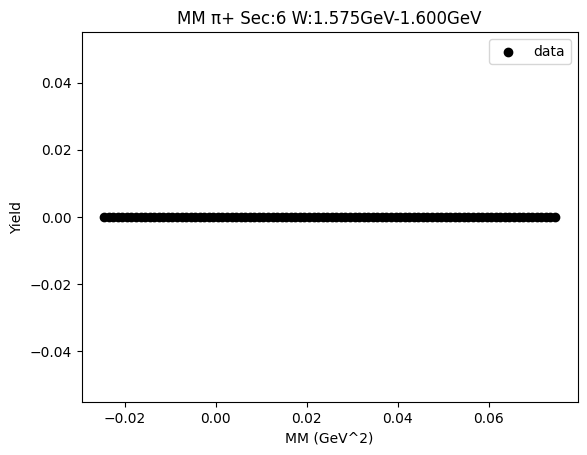

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


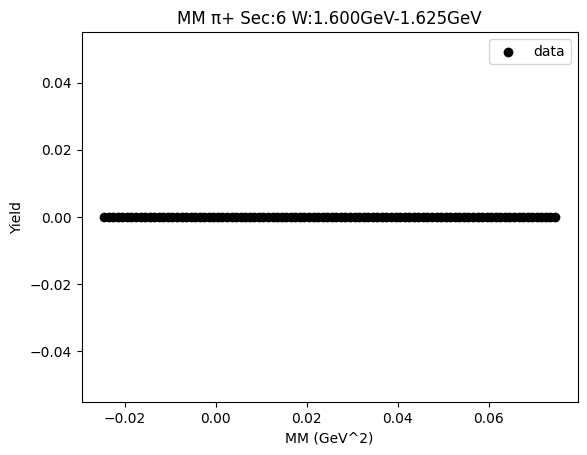

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


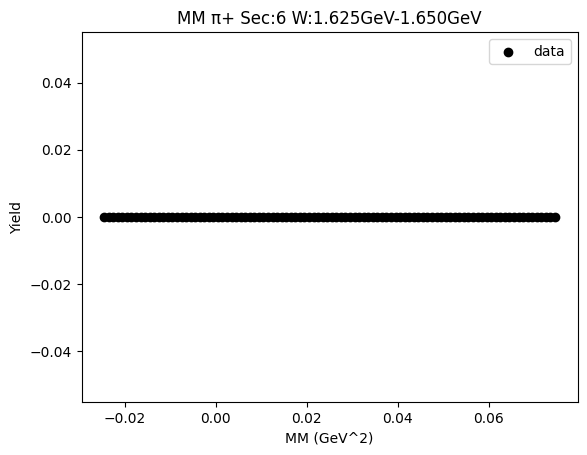

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


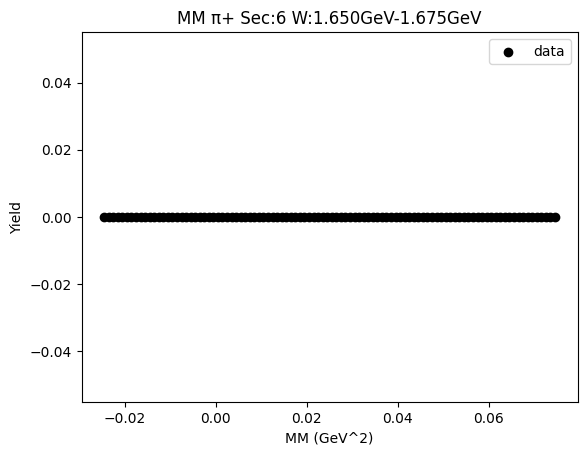

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


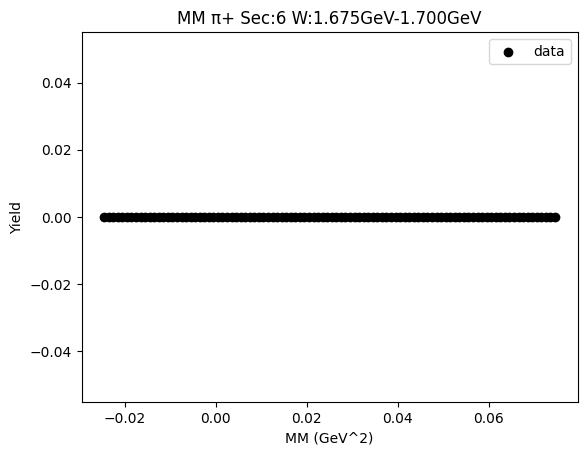

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


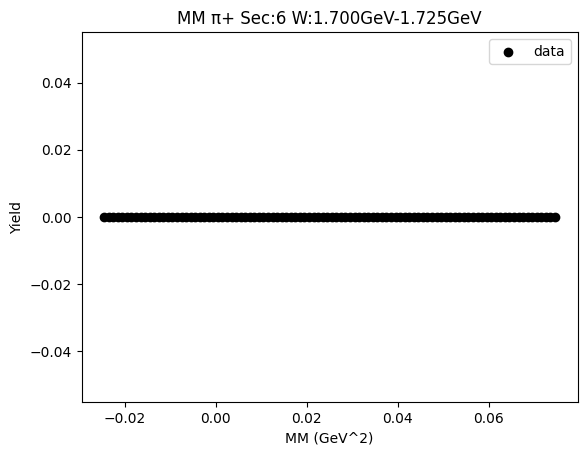

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


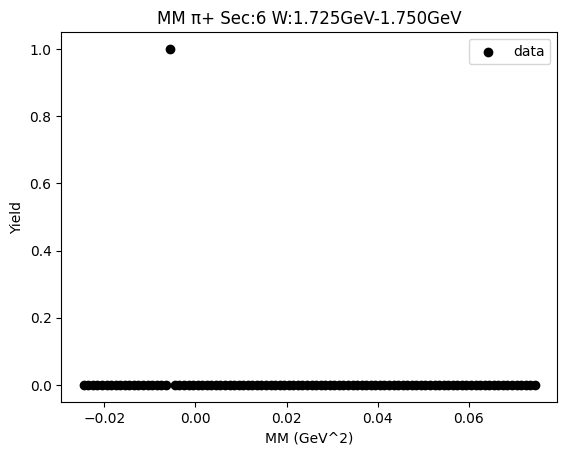

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[6.02341714e-06 4.74158762e-06 3.61293524e-06]
 [2.72664555e-05 3.02332337e-05 3.33531890e-05]]
Cut Bounds Err [[ 958.12651669 1020.10417627 1038.86595459]
 [2038.52354803 2575.8759014  3156.44413602]]


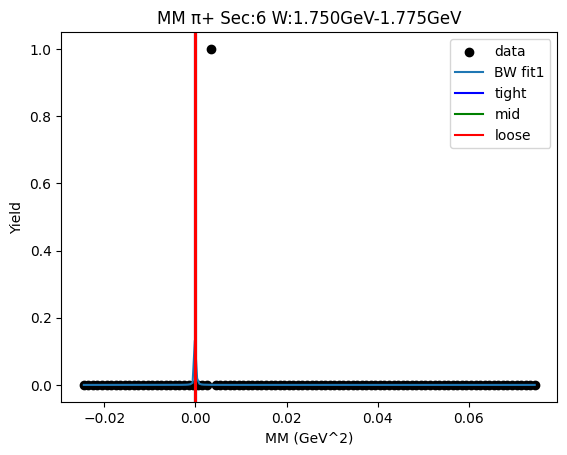

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[0.0003647  0.00052826 0.00072204]
 [0.00039089 0.00055969 0.00075871]]
Cut Bounds Err [[180841.13318832 261176.97971218 356235.3661981 ]
 [187222.36586335 268834.45892221 365169.09194314]]


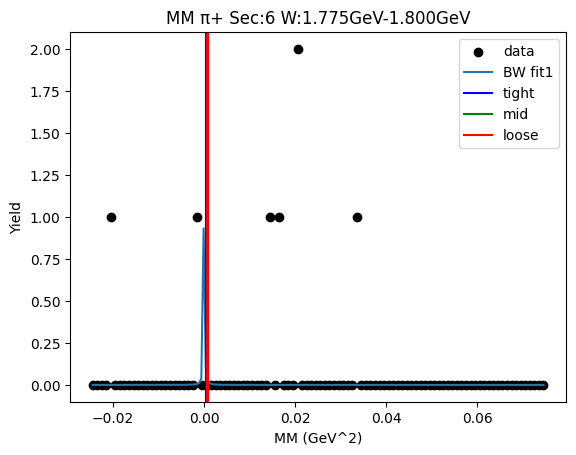

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[4.07515340e-06 7.05829215e-06 1.08556305e-05]
 [1.90247446e-05 2.49978016e-05 3.17850582e-05]]
Cut Bounds Err [[ 446763.58456471  705564.7045062  1020848.62545719]
 [ 965306.44067314 1327816.13183631 1746808.62400899]]


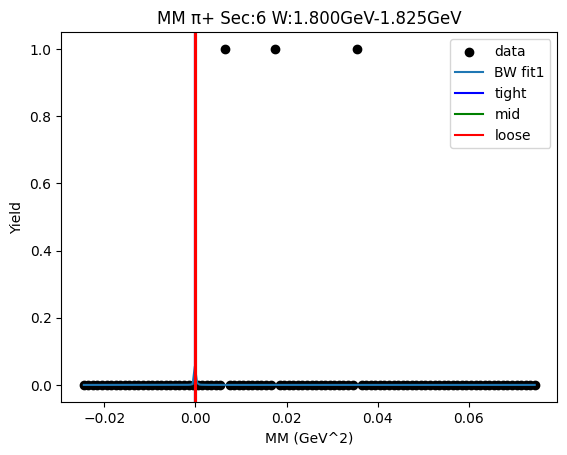

W bin: 17 1.825GeV-1.850GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


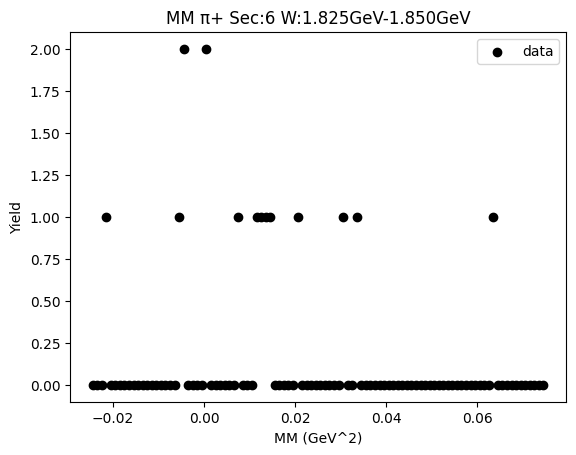

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[0.00147653 0.00415373 0.00818541]
 [0.04920091 0.06142299 0.07499954]]
Cut Bounds Err [[0.00014816 0.00029783 0.0004874 ]
 [0.00085525 0.00114528 0.00147536]]


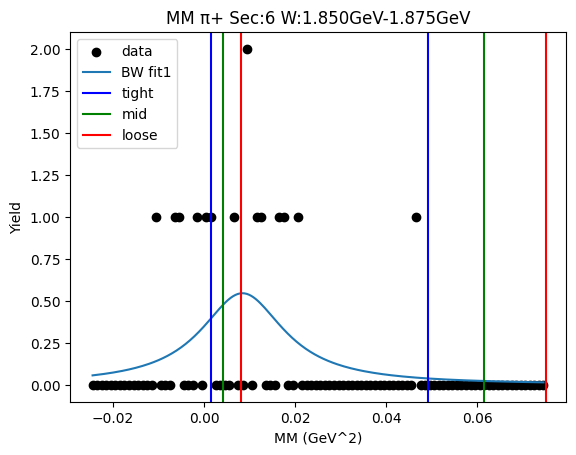

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[7.06991043e-06 3.81130041e-04 1.73922650e-03]
 [5.03884666e-02 6.08388060e-02 7.22731818e-02]]
Cut Bounds Err [[2.17360374e-06 1.91217106e-05 4.76116623e-05]
 [1.83501234e-04 2.41590855e-04 3.06919060e-04]]


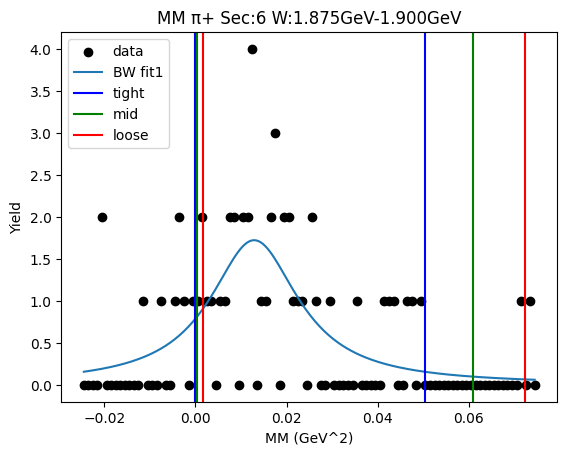

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[1.69279708e-07 4.49285764e-04 1.83219614e-03]
 [4.68676682e-02 5.66902845e-02 6.74466946e-02]]
Cut Bounds Err [[0.21606614 0.25928174 0.30249734]
 [0.21608995 0.25930561 0.30252127]]


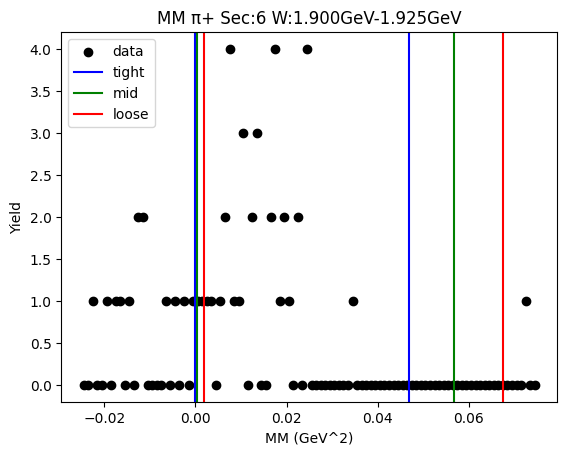

W bin: 21 1.925GeV-1.950GeV
background fit [1.21785778 1.         0.06       1.02325837 0.0706118  0.00224457]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.013076749760381205 0.04467774109334209
Breit-Wigner Peak [0.33011944 0.12570002 0.0981109 ]
Gaus2 [1.18814205 1.48819657 0.10750251]
Gaus3 [3.94918080e+00 6.90004435e-02 2.87348493e-04]
Cut Bounds [[4.54829237e-04 2.04364161e-07 4.17082296e-04]
 [5.29337322e-02 6.29748879e-02 7.38875465e-02]]
Cut Bounds Err [[1.67928163e-05 4.26468422e-07 2.24554302e-05]
 [1.81161375e-04 2.36738130e-04 2.98879498e-04]]


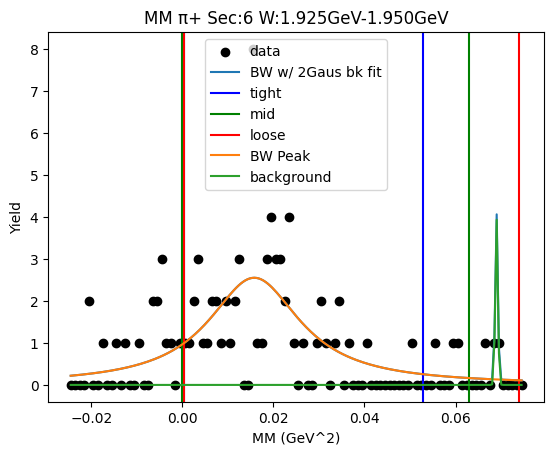

W bin: 22 1.950GeV-1.975GeV
background fit [1.18814205e+00 1.48819657e+00 1.07502514e-01 2.42803744e-01
 6.90012803e-02 1.14189586e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0013521001234914412 0.027462396582883825
Breit-Wigner Peak [0.43847538 0.11425913 0.06929947]
Gaus2 [ 0.25383603  0.03       25.74030316]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[0.00164319 0.00066521 0.00012204]
 [0.03533722 0.04109805 0.04729368]]
Cut Bounds Err [[2.30444804e-05 1.75892771e-05 8.78784785e-06]
 [1.06865889e-04 1.38254166e-04 1.72995024e-04]]


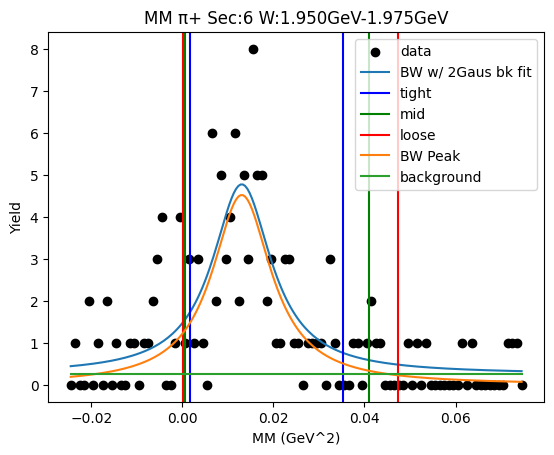

W bin: 23 1.975GeV-2.000GeV
background fit [3.84616004e-07 3.00000001e-02 1.52462329e+04 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.006465284308256485 0.021191331504303496
Breit-Wigner Peak [0.42617081 0.11759383 0.04954131]
Gaus2 [4.07499956e-01 1.41945047e+01 3.18136826e+04]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[0.00421075 0.00295388 0.00191922]
 [0.02900119 0.0327024  0.03662583]]
Cut Bounds Err [[9.81560787e-06 9.85602001e-06 9.26327744e-06]
 [2.57599639e-05 3.27940469e-05 4.04665380e-05]]


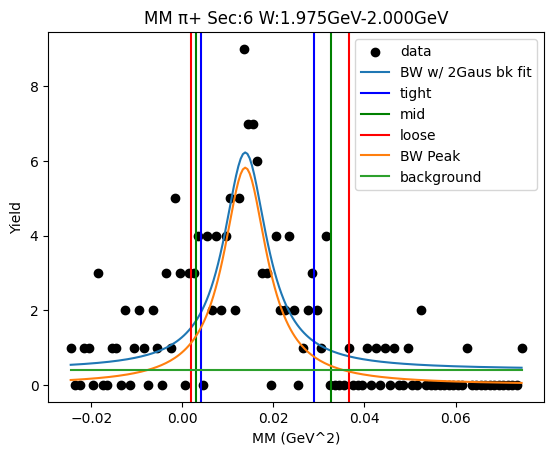

W bin: 24 2.000GeV-2.025GeV
background fit [1.99625890e-03 5.54644669e+03 4.13749576e+02 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.016141770769093074 0.04496283406511657
Breit-Wigner Peak [0.70569178 0.12004387 0.10091631]
Gaus2 [1.99625890e-03 5.54644669e+03 4.13749576e+02]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[1.60937173e-04 7.71841825e-05 9.15486494e-04]
 [5.17115087e-02 6.19378700e-02 7.30862866e-02]]
Cut Bounds Err [[3.48682492e-06 2.89309077e-06 1.16133204e-05]
 [6.25022369e-05 8.19551103e-05 1.03764401e-04]]


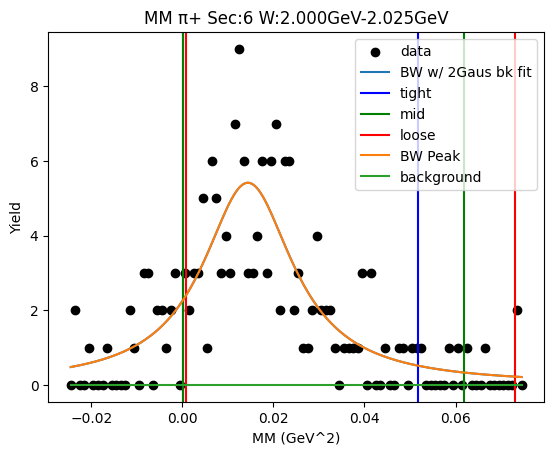

W bin: 25 2.025GeV-2.050GeV
background fit [1.99625890e-03 5.54644669e+03 4.13749576e+02 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.025953505644738716 0.056990388981209485
Breit-Wigner Peak [0.74489331 0.12457304 0.11757543]
Gaus2 [1.99625890e-03 5.54644669e+03 4.13749576e+02]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[2.57262343e-07 6.51436797e-04 2.55422180e-03]
 [6.23267629e-02 7.54432435e-02 8.98113297e-02]]
Cut Bounds Err [[2.45324762e-07 1.47928752e-05 3.41443630e-05]
 [1.20750952e-04 1.59193975e-04 2.02467478e-04]]


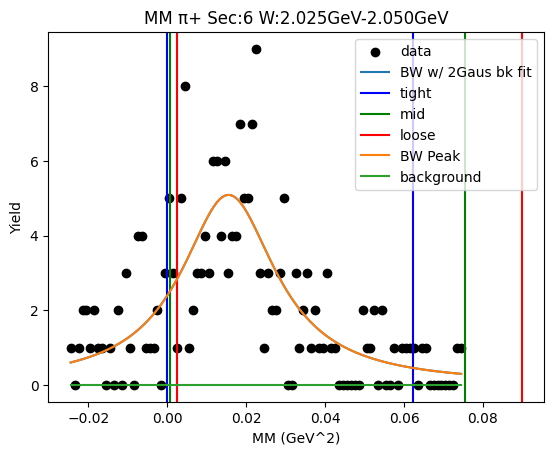

W bin: 26 2.050GeV-2.075GeV
background fit [1.99625890e-03 5.54644669e+03 4.13749576e+02 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.00542913018790599 0.03788261459519068
Breit-Wigner Peak [1.06900552 0.12738423 0.08496249]
Gaus2 [1.99625890e-03 5.54644669e+03 4.13749576e+02]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[1.36889689e-03 3.58022471e-04 7.12938612e-07]
 [4.74237096e-02 5.56237977e-02 6.44774507e-02]]
Cut Bounds Err [[4.71550607e-06 2.88885850e-06 1.50241063e-07]
 [2.77549661e-05 3.60082028e-05 4.51821101e-05]]


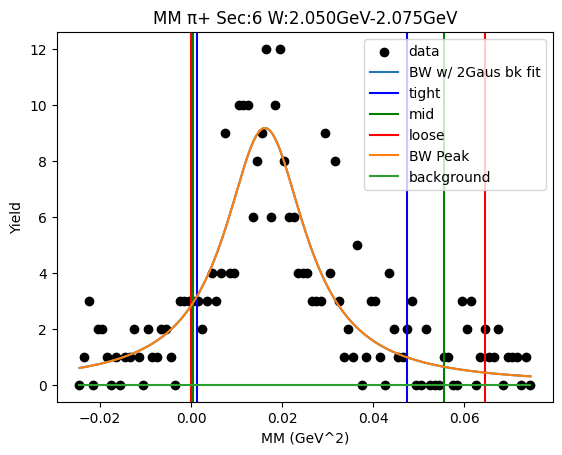

W bin: 27 2.075GeV-2.100GeV
background fit [1.99625890e-03 5.54644669e+03 4.13749576e+02 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.010422730907078714 0.03828840799161403
Breit-Wigner Peak [0.93657389 0.11803745 0.09010285]
Gaus2 [1.99625890e-03 5.54644669e+03 4.13749576e+02]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[4.92101119e-04 9.07535899e-06 2.61090174e-04]
 [4.57495903e-02 5.43180624e-02 6.36215751e-02]]
Cut Bounds Err [[5.37118686e-06 8.73834590e-07 5.46260550e-06]
 [5.17889004e-05 6.76035435e-05 8.52720654e-05]]


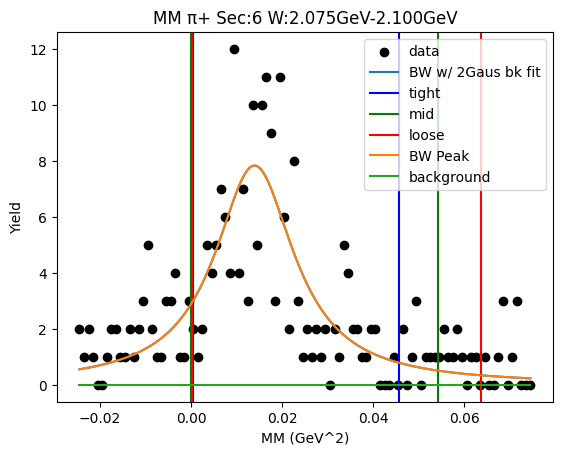

W bin: 28 2.100GeV-2.125GeV
background fit [1.99625890e-03 5.54644669e+03 4.13749576e+02 1.24437076e-03
 6.40432319e-02 5.70322815e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.01965416710978706 0.04790916799251913
Breit-Wigner Peak [1.28782251 0.11885916 0.10611577]
Gaus2 [1.99625890e-03 5.54644669e+03 4.13749576e+02]
Gaus3 [1.24437076e-03 6.40432319e-02 5.70322815e-07]
Cut Bounds [[3.56414870e-05 2.75818139e-04 1.53551094e-03]
 [5.37072631e-02 6.46817641e-02 7.66757812e-02]]
Cut Bounds Err [[1.52728363e-06 5.09063549e-06 1.40001737e-05]
 [5.92868397e-05 7.79563536e-05 9.89318362e-05]]


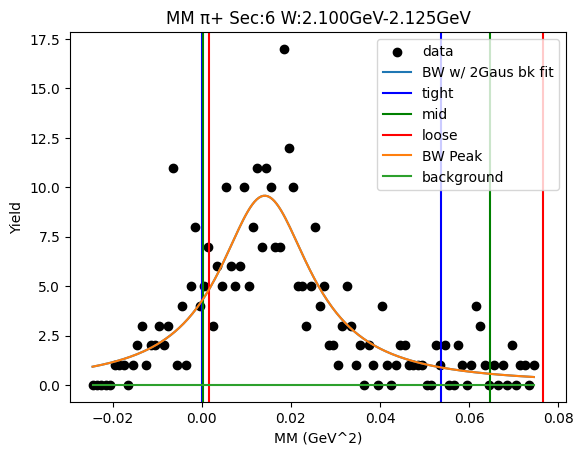

In [8]:
bkgd=True
Wlow_bin = 0
Wbin_bkgd = 20

tight = 2.5
mid = 3
loose = 3.5

a_ini=148
m_ini=0.149
g_ini=0.08
bw_ini = [a_ini,m_ini,g_ini]


gaus2_ini = [500,  0.3, 0.06287]
gaus3_ini = [706, 0.4, 0.2417]
 
bw_ini_w = [0.65, 0.15, 0.035]
gaus2_ini_w = [3.07211428, 0.3, 0.06742853]
gaus3_ini_w = [2.78458923, 0.4, 0.10165907]




# bw_ini_w = [1.01801152, 0.94626145, 0.039624]
# gaus2_ini_w = [3.07211428, 1.01332019, 0.06742853]
# gaus3_ini_w = [2.78458923, 1.26687645, 0.10165907]

bw_bounds = [[0.0,0.0,0.0],[np.inf,np.inf,np.inf]]
full_bounds = [[0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.03,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]]

bkgd_bounds = [[0.0,0.03,0.0,0.0,0.03,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]]

bw_pars = np.zeros((6,_W_bins_+1,3))
gaus2_pars = np.zeros((6,_W_bins_+1,3))
gaus3_pars = np.zeros((6,_W_bins_+1,3))

bkgd_guess_pars = np.zeros((6,_W_bins_+1,6))


ini_pars= np.zeros(9)
for i in range(3):
    ini_pars[i] = bw_ini[i]
    ini_pars[i+3] = gaus2_ini[i]
    ini_pars[i+6] = gaus3_ini[i]

    #sec W low, high, tight, mid, loose
cut_bounds = np.zeros((6,_W_bins_+1,2,3))
cut_bounds_err = np.zeros((6,_W_bins_+1,2,3))

bw_ini_w1 = np.zeros(3)
    
for sec in range(6):
    x_r=Center_Xbins(hist_name[sec][1])
    y_r=Values_1d(hist_name[sec][1])
    plt.scatter(x_r,y_r,color='k',label='data')
    plt.title("{} {} MM {} Sec:{} W:{}-{} (GeV)".format(sim,run,Particle,sec+1,_W_min_,_W_max_))
    plt.xlabel("MM (GeV^2)")
    plt.ylabel("Yield")
   
    try:
        bw_ini[0] = np.max(y_r)
        bw_ini[1] = x_r[np.argmax(y_r)]
        pars_r1, pars_cov_r1 = op.curve_fit(BW_e2,x_r,y_r,p0=bw_ini,maxfev=5000,bounds=bw_bounds)
        tmp_x1 = np.linspace(x_r[0],x_r[len(x_r)-1],200)
        plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_r1),label="BW fit1")
        tmp_y_r = [y_r[i]-BW_e2(x_r[i],*pars_r1) for i in range(len(y_r))]
        plt.scatter(x_r,tmp_y_r,label="bkgd estimate")
        
        try:
            bkgd_guess_pars[sec][_W_bins_][0] = tmp_y_r[50]
            bkgd_guess_pars[sec][_W_bins_][1] = x_r[50]
            bkgd_guess_pars[sec][_W_bins_][2] = 0.05
            bkgd_guess_pars[sec][_W_bins_][3] = tmp_y_r[90]
            bkgd_guess_pars[sec][_W_bins_][4] = x_r[90]
            bkgd_guess_pars[sec][_W_bins_][5] = 0.3
            
            bkgd_full_pars, bkgd_full_pars_cov = op.curve_fit(Gaus2,x_r,tmp_y_r,p0=bkgd_guess_pars[sec][_W_bins_],maxfev=5000,bounds=bkgd_bounds)
            
            plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_full_pars),label="bkgd fit")
            try:
                r1_ini_pars = np.zeros(9)

                for i in range(3):
                    r1_ini_pars[i] = pars_r1[i]
                    r1_ini_pars[i+3] = gaus2_ini[i]
                    r1_ini_pars[i+6] = gaus3_ini[i]
                #r1_ini[0] = np.max(y_r)
                #r1_ini[1] - x_r[np.argmax(y_r)]
                pars_r2, pars_cov_r2 = op.curve_fit(BW_e2_Gaus2,x_r,y_r,p0=r1_ini_pars,maxfev=5000)
                plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*pars_r2),label="BW w/ 2Gaus bk fit")
                r1_bkgd_pars = np.zeros(6)
                for i in range(3):
                    bw_pars[sec][_W_bins_][i] = pars_r2[i]
                    r1_bkgd_pars[i] = pars_r2[i+3]
                    r1_bkgd_pars[i+3] = pars_r2[i+6]
                    gaus2_pars[sec][_W_bins_][i] = pars_r2[i+3]
                    gaus3_pars[sec][_W_bins_][i] = pars_r2[i+6]
                for i in range(3):
                    for j in range(2):
                        cut_bounds[sec][_W_bins_][j][i] = (pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35)*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35)
                        cut_bounds_err[sec][_W_bins_][j][i] = np.sqrt((2*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35))**2 + ((2*sign2[j]*cut_sig[i]/2.35)*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35))**2)
                        if j==0:
                            plt.axvline(x=cut_bounds[sec][_W_bins_][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                        else:
                            plt.axvline(x=cut_bounds[sec][_W_bins_][j][i],color=color_order[i])

    #                 cut_bounds[sec][_W_bins_][0][0] = (pars_r2[1]-tight*pars_r2[2]/2.35)*(pars_r2[1]-tight*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][0][1] = (pars_r2[1]-mid*pars_r2[2]/2.35)*(pars_r2[1]-mid*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][0][2] = (pars_r2[1]-loose*pars_r2[2]/2.35)*(pars_r2[1]-loose*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][0] = (pars_r2[1]+tight*pars_r2[2]/2.35)*(pars_r2[1]+tight*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][1] = (pars_r2[1]+mid*pars_r2[2]/2.35)*(pars_r2[1]+mid*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][2] = (pars_r2[1]+loose*pars_r2[2]/2.35)*(pars_r2[1]+loose*pars_r2[2]/2.35)
                plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][_W_bins_]),label="BW Peak")
                plt.plot(tmp_x1,Gaus2(tmp_x1,*r1_bkgd_pars),label="background")

    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][0],label="tight -{}\u03C3".format(tight))
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][0],label="tight +{}\u03C3".format(tight))
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][1],label="mid -{}\u03C3".format(mid),color='g')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][1],label="mid +{}\u03C3".format(mid),color='g')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][2],label="loose -{}\u03C3".format(loose),color='r')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][2],label="loose +{}\u03C3".format(loose),color='r')
                print(pars_r2[1]*pars_r2[1]-3*pars_r2[2]*pars_r2[2],pars_r2[1]*pars_r2[1]+3*pars_r2[2]*pars_r2[2])
                print("Breit-Wigner Peak",bw_pars[sec][_W_bins_])
                print("Gaus2",gaus2_pars[sec][_W_bins_])
                print("Gaus3",gaus3_pars[sec][_W_bins_])
            except RuntimeError:
                print("Runtime Error1.2\n\tJust skip it for now")
            except ValueError:
                print("Value Error1.2\n\tJust skip it for now")
        except RuntimeError:
            print("Runtime Error1.1\n\tJust skip it for now")
        except ValueError:
            print("Value Error1.1\n\tJust skip it for now")
    except RuntimeError:
        print("Runtime Error1.0\n\tJust skip it for now")
    except ValueError:
        print("Value Error1.0\n\tJust skip it for now")
    plt.legend()
    plt.show()
    for Wbin in range(_W_bins_):
        if Wbin > Wlow_bin:
            print("W bin:",Wbin,W_Bin_PlotName[Wbin])
            x_w=Center_Xbins(hist_name[sec][0][Wbin])
            y_w=Values_1d(hist_name[sec][0][Wbin])
            plt.scatter(x_w,y_w,color='k',label='data')
            plt.title("MM {} Sec:{} W:{}".format(Particle,sec+1,W_Bin_PlotName[Wbin]))
            plt.xlabel("MM (GeV^2)")
            plt.ylabel("Yield")
            try:
                for j in range(3):
                    if Wbin > 0 and bw_pars[sec][Wbin-1][j]!=0:
                        for i in range(3):
                            bw_ini_w1[i] = bw_pars[sec][Wbin-1][i]
                    else:
                        for i in range(3):
                            bw_ini_w1[i] = bw_ini_w[i]
                bw_ini_w1[0] = np.max(y_w)
                bw_ini_w1[1] = x_r[np.argmax(y_w)]
                pars_w1, pars_cov_w1 = op.curve_fit(BW_e2,x_w,y_w,p0=bw_ini_w1,maxfev=5000,bounds=bw_bounds)
                #tmp_x_w1 = np.linspace(x_w[0],x_w[len(x_w)-1],200)
                #plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_w1),label="BW fit1")
                #print("initial bw fit: ",pars_w1)
                if Wbin >= Wbin_bkgd:
                    tmp_y_w = [y_w[i]-BW_e2(x_w[i],*pars_w1) for i in range(len(y_w))]
                    bkgd_fit_x = Bounds_on_Y(x_w,0.03,0.07)
                    bkgd_fit_y = Bounds_on_X_From_Y(tmp_y_w,x_w,0.03,0.07)
                    #plt.scatter(bkgd_fit_x,bkgd_fit_y,label="bkgd estimate")
                    if gaus2_pars[sec][Wbin-1][0] ==0:
                        bkgd_guess_pars[sec][Wbin][0] = np.max(bkgd_fit_y)
                        bkgd_guess_pars[sec][Wbin][1] = 1.0
                        bkgd_guess_pars[sec][Wbin][2] = 0.06
                        bkgd_guess_pars[sec][Wbin][3] = tmp_y_w[80]
                        bkgd_guess_pars[sec][Wbin][4] = 1.4
                        bkgd_guess_pars[sec][Wbin][5] = 0.2
                    else:
                        bkgd_guess_pars[sec][Wbin][0] = gaus2_pars[sec][Wbin-1][0]
                        bkgd_guess_pars[sec][Wbin][1] = gaus2_pars[sec][Wbin-1][1]
                        bkgd_guess_pars[sec][Wbin][2] = gaus2_pars[sec][Wbin-1][2]
                        bkgd_guess_pars[sec][Wbin][3] = gaus3_pars[sec][Wbin-1][0]
                        bkgd_guess_pars[sec][Wbin][4] = gaus3_pars[sec][Wbin-1][1]
                        bkgd_guess_pars[sec][Wbin][5] = gaus3_pars[sec][Wbin-1][2]
                    
                    
                    
                    #plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_guess_pars[sec][Wbin]),label="bkgd guess")
                    try:
                        
                        
                        
                        
                        
                        
                        
                        bkgd_pars_w, bkgd_pars_cov_w = op.curve_fit(Gaus2,bkgd_fit_x,bkgd_fit_y,p0=bkgd_guess_pars[sec][Wbin],bounds=bkgd_bounds)
                        #plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_pars_w),label="bkgd fit1")
                        print("background fit",bkgd_pars_w)
                        try:
                            w1_ini_pars = np.zeros(9)

                            for i in range(3):
                                w1_ini_pars[i] = pars_w1[i]
                                if Wbin > 0:
                                    if gaus2_pars[sec][Wbin-1][i] != 0.0:
                                        w1_ini_pars[i+3] = gaus2_pars[sec][Wbin-1][i]
                                        w1_ini_pars[i+6] = gaus3_pars[sec][Wbin-1][i]
                                    else:
                                        w1_ini_pars[i+3] = gaus2_ini_w[i]
                                        w1_ini_pars[i+6] = gaus3_ini_w[i]
                                else:
                                    w1_ini_pars[i+3] = gaus2_ini_w[i]
                                    w1_ini_pars[i+6] = gaus3_ini_w[i]
                           # print("w1_ini_pars:",w1_ini_pars)
                            #w1_ini_pars[0] = np.max(y_w)
                            #w1_ini_pars[1] = x_r[np.argmax(y_w)]
                            for i in range(6):
                                w1_ini_pars[i+3] = bkgd_pars_w[i]
#                             w1_ini_pars[4] = x_w[50]
#                             w1_ini_pars[6] = y_w[90]
#                             w1_ini_pars[7] = x_w[90]
                            #print("post W1_ini_pars",w1_ini_pars)
#                             print(x_w)
#                             print(y_w)
                            #plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*w1_ini_pars),label="Guess on the 2 gaus bkgd")
                            #plt.scatter(x_w,y_w,color='c',label='data again')
                            print(full_bounds)
                            pars_w2, pars_cov_w2 = op.curve_fit(BW_e2_Gaus2,x_w,y_w,p0=w1_ini_pars,maxfev=50000,bounds=full_bounds)
                            plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*pars_w2),label="BW w/ 2Gaus bk fit")
                            
                            w1_bkgd_pars = np.zeros(6)
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w2[i]
                                w1_bkgd_pars[i] = pars_w2[i+3]
                                w1_bkgd_pars[i+3] = pars_w2[i+6]
                                gaus2_pars[sec][Wbin][i] = pars_w2[i+3]
                                gaus3_pars[sec][Wbin][i] = pars_w2[i+6]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35)*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w2[1][1]*2*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35))**2 + (pars_cov_w2[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
    #                             cut_bounds[sec][Wbin][0][0] = (pars_w2[1]-tight*pars_w2[2]/2.35)*(pars_w2[1]-tight*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][0][1] = (pars_w2[1]-mid*pars_w2[2]/2.35)*(pars_w2[1]-mid*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][0][2] = (pars_w2[1]-loose*pars_w2[2]/2.35)*(pars_r2[1]-loose*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][0] = (pars_w2[1]+tight*pars_w2[2]/2.35)*(pars_r2[1]+tight*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][1] = (pars_w2[1]+mid*pars_w2[2]/2.35)*(pars_r2[1]+mid*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][2] = (pars_w2[1]+loose*pars_w2[2]/2.35)*(pars_r2[1]+loose*pars_w2[2]/2.35)
                            plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][Wbin]),label="BW Peak")
                            plt.plot(tmp_x1,Gaus2(tmp_x1,*w1_bkgd_pars),label="background")

                            print(pars_w2[1]*pars_w2[1]-3*pars_w2[2]*pars_w2[2],pars_w2[1]*pars_w2[1]+3*pars_w2[2]*pars_w2[2])
                            print("Breit-Wigner Peak",bw_pars[sec][Wbin])
                            print("Gaus2",gaus2_pars[sec][Wbin])
                            print("Gaus3",gaus3_pars[sec][Wbin])
                        except RuntimeError:
                            print("Runtime Error2.1\n\tJust skip it for now")
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w1[i]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                        except ValueError:
                            print("Value Error2.1\n\tJust skip it for now")
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w1[i]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                    except RuntimeError:
                        print("Runtime Error2.2\n\tJust skip it for now")
                        for i in range(3):
                            bw_pars[sec][Wbin][i] = pars_w1[i]
                        for i in range(3):
                            for j in range(2):
                                cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                if j==0:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                else:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                    except ValueError:
                        print("Value Error2.2\n\tJust skip it for now")
                        for i in range(3):
                            bw_pars[sec][Wbin][i] = pars_w1[i]
                        for i in range(3):
                            for j in range(2):
                                cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                cut_bounds_err[sec][Wbin][j][i] = np.sqrt((2*(pars_cov_w1[1][1]*pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                if j==0:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                else:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                else:
                    plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_w1),label="BW fit1")
                    for i in range(3):
                        bw_pars[sec][Wbin][i] = pars_w1[i]
                    for i in range(3):
                        for j in range(2):
                            cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                            cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)

                            if j==0:
                                plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                            else:
                                plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
#                         cut_bounds[sec][Wbin][0][0] = (pars_w1[1]-tight*pars_w1[2]/2.35)*(pars_w1[1]-tight*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][0][1] = (pars_w1[1]-mid*pars_w1[2]/2.35)*(pars_w1[1]-mid*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][0][2] = (pars_w1[1]-loose*pars_w1[2]/2.35)*(pars_w1[1]-loose*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][0] = (pars_w1[1]+tight*pars_w1[2]/2.35)*(pars_w1[1]+tight*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][1] = (pars_w1[1]+mid*pars_w1[2]/2.35)*(pars_w1[1]+mid*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][2] = (pars_w1[1]+loose*pars_w1[2]/2.35)*(pars_w1[1]+loose*pars_w1[2]/2.35)
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][0],label="tight -{}\u03C3".format(tight))
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][0],label="tight +{}\u03C3".format(tight))
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][1],label="mid -{}\u03C3".format(mid),color='g')
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][1],label="mid +{}\u03C3".format(mid),color='g')
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][2],label="loose -{}\u03C3".format(loose),color='r')
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][2],label="loose +{}\u03C3".format(loose),color='r')
            except RuntimeError:
                print("Runtime Error2.0\n\tJust skip it for now")
                
            except ValueError:
                print("Value Error2.0\n\tJust skip it for now")
            print("Cut Bounds",cut_bounds[sec][Wbin])
            print("Cut Bounds Err",cut_bounds_err[sec][Wbin])
            plt.legend()
            plt.show()
            
            

In [ ]:
W_bins = [W_center(i) for i in range(_W_bins_)]

def Linear(x_,a_,b_):
    return a_ + b_*x_

lin_fit = np.zeros((6,2,3,2))

for sec in range(6):
#     y_tight_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
#     y_tight_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][0] for Wbin in range(_W_bins_)])
#     y_mid_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
#     y_mid_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][1] for Wbin in range(_W_bins_)])
#     y_loose_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][2] for Wbin in range(_W_bins_)])
#     y_loose_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][2] for Wbin in range(_W_bins_)])
#     #x_tight = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
#     x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
    for i in range(3):
        for j in range(2):
            x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][j][i] for Wbin in range(_W_bins_)])
            y = Remove_Zeros_Y([cut_bounds[sec][Wbin][j][i] for Wbin in range(_W_bins_)])
            if j ==0:
                plt.scatter(x,y,color=color_order[i],label=cut_names[i])
                plt.errorbar(x,y,color=color_order[i],yerr=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),ls='')
            else:
                plt.scatter(x,y,color=color_order[i])
                plt.errorbar(x,y,color=color_order[i],yerr=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),ls='')
            try:
                pars, pars_cov = op.curve_fit(Linear,x,y,sigma=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),maxfev=5000)
                cont_x = np.linspace(np.min(x),np.max(x),200)
                plt.plot(cont_x,Linear(cont_x,*pars),color=color_order[i])
                lin_fit[sec][j][i][0] = pars[1]
                lin_fit[sec][j][i][1] = pars[0]
            except RuntimeError:
                print("runtime error")
            except ValueError:
                print("Value error")
#     plt.scatter(x,y_tight_w1,color='b',label="tight +-{}\u03C3".format(tight))
#     plt.scatter(x,y_tight_w2,color='b',)
#     plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
#     plt.scatter(x,y_mid_w2,color='g')
#     plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
#     plt.scatter(x,y_loose_w2,color='r')
#     plt.errorbar(x,y_tight_w1,color='b',yerr=cut_bounds[sec][_W_bins_][0][0])
#     plt.scatter(x,y_tight_w2,color='b',)
#     plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
#     plt.scatter(x,y_mid_w2,color='g')
#     plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
#     plt.scatter(x,y_loose_w2,color='r')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][0],_W_min_,_W_max_,color='b',label="W range tight +-{}\u03C3".format(tight))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][0],_W_min_,_W_max_,color='b')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][1],_W_min_,_W_max_,color='g',label="W range mid +-{}\u03C3".format(mid))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][1],_W_min_,_W_max_,color='g')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][2],_W_min_,_W_max_,color='r',label="W range loose +-{}\u03C3".format(loose))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][2],_W_min_,_W_max_,color='r')
    plt.legend()
    plt.title("{} {} MM {} Cut Variation with W by Sec:{}".format(sim,run,Particle,sec+1))
    plt.xlabel("W (GeV)")
    plt.ylabel("MM (GeV^2)")
    plt.show()
    

In [ ]:
for sec in range(6):
    y_tight_w1 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][0])*math.sqrt(sign(cut_bounds[sec][Wbin][0][0])*cut_bounds[sec][Wbin][0][0]) for Wbin in range(_W_bins_)])
    y_tight_w2 = Remove_Zeros_Y([math.sqrt(cut_bounds[sec][Wbin][1][0]) for Wbin in range(_W_bins_)])
    y_mid_w1 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][1])*math.sqrt(sign(cut_bounds[sec][Wbin][0][1])*cut_bounds[sec][Wbin][0][1]) for Wbin in range(_W_bins_)])
    y_mid_w2 = Remove_Zeros_Y([math.sqrt(cut_bounds[sec][Wbin][1][1]) for Wbin in range(_W_bins_)])
    y_loose_w1 = Remove_Zeros_Y([math.sqrt(sign(cut_bounds[sec][Wbin][0][2])*cut_bounds[sec][Wbin][0][2]) for Wbin in range(_W_bins_)])
    y_loose_w2 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][2])*math.sqrt(cut_bounds[sec][Wbin][1][2]) for Wbin in range(_W_bins_)])
    #x_tight = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
    x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
    #x_loose = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][2] for Wbin in range(_W_bins_)])
    plt.scatter(x,y_tight_w1,color='b',label="tight +-{}\u03C3".format(tight))
    plt.scatter(x,y_tight_w2,color='b',)
    plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
    plt.scatter(x,y_mid_w2,color='g')
    plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
    plt.scatter(x,y_loose_w2,color='r')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][0]),_W_min_,_W_max_,color='b',label="W range tight +-{}\u03C3".format(tight))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][0]),_W_min_,_W_max_,color='b')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][1]),_W_min_,_W_max_,color='g',label="W range mid +-{}\u03C3".format(mid))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][1]),_W_min_,_W_max_,color='g')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][2]),_W_min_,_W_max_,color='r',label="W range loose +-{}\u03C3".format(loose))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][2]),_W_min_,_W_max_,color='r')
    plt.legend()
    plt.title("{} {} MM {} Cut Variation with W Sec:{}".format(sim,run,Particle,sec+1))
    plt.xlabel("W (GeV)")
    plt.ylabel("MM (GeV)")
    plt.show()

In [ ]:
Wbin = _W_bins_
m_par = 0.938272088
for sec in range(6):
    plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][Wbin]),label="Sec {}".format(sec+1))
plt.axvline(x=m_par*m_par,label="{} mass".format(Particle),color='r')
plt.legend()
plt.show

In [ ]:
print("MM^2 "+Particle+" Cut Bounds [sec][low/high][tight/mid/loose][slope,intercept]")
for sec in range(6):
    for side in range(2):
        for t in range(3):
            for p in range(2):
                if p ==0:
                    if t == 0:
                        if side ==0:
                            if sec==0:
                                print("{\t{\t{\t{",lin_fit[sec][side][t][p],end=",")
                            else:
                                print("\t{\t{\t{",lin_fit[sec][side][t][p],end=",")
                        else:
                            print("\t\t{\t{",lin_fit[sec][side][t][p],end=",")
                    else:
                        print("{",lin_fit[sec][side][t][p],end=",")
                elif p==1:
                    if t == 2:
                        if side == 1:
                            if sec == 5:
                                print(lin_fit[sec][side][t][p],"}}}}")
                            else:
                                print(lin_fit[sec][side][t][p],"}}},")
                        else: 
                            print(lin_fit[sec][side][t][p],"}},")
                    else:
                        print(lin_fit[sec][side][t][p],end="},")
                else: 
                     print(lin_fit[sec][side][t][p],end=",")
